In [1]:
import json
# from IPython import display
# import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statistics
import pandas as pd
# from sklearn.linear_model import LinearRegression
from seaborn import violinplot, boxplot
import scipy

In [2]:
filename = "participants_data.json"
with open(filename) as f:
    participants_data = json.load(f)
    
average_performance = {}

# sol length
for condition in  ['full', 'default']:
    average_performance[condition] = []

    for p in participants_data[condition]:
    #     print(p)
        performance = []


        for instance in participants_data[condition][p]:
            if not participants_data[condition][p][instance]['outlier']:
                file_path = "../dataset/TOLdataset/" + instance + "/info.json"
                with open(file_path) as f:
                    info_dict = json.load(f)
                opt = info_dict["optimal_cost"]


                sol_len = len(participants_data[condition][p][instance]['responses'])
                performance.append(sol_len/2-opt)

        average_performance[condition].append(statistics.mean(performance))
    


Ttest_indResult(statistic=-8.115417177252796, pvalue=2.5542356735676313e-14)


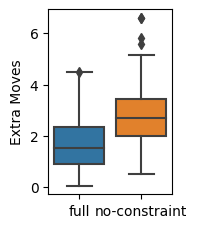

-1.1564184354011136


In [3]:
# overall sol length
from matplotlib.pyplot import figure
px = 1/plt.rcParams['figure.dpi']
figure(figsize=(160*px, 240*px))
ax = boxplot([average_performance['full'],average_performance['default']])
ax.set_xticklabels(['full','no-constraint'])
ax.set_ylabel('Extra Moves')
print(stats.ttest_ind(average_performance['full'], average_performance['default']))
plt.show()
print(statistics.mean(average_performance['full']) - statistics.mean(average_performance['default']))

In [4]:
# from sklearn.linear_model import LinearRegression
import numpy as np

average_initial_time = {}
best_model = {'full':{},'default':{}}
model_scores = {'full':{},'default':{}}
# initial planning time
for condition in ['full', 'default']:
    average_initial_time[condition] = []
#     best_vals = []
    for p in participants_data[condition]:
    #     print(p)
        initial_time = []

        for instance in participants_data[condition][p]:

            if not participants_data[condition][p][instance]['outlier']:
                initial_time.append(int(participants_data[condition][p][instance]['responses'][0][0])/1000)


        average_initial_time[condition].append(statistics.mean(initial_time))



16.547939389822297
5.317499140805343
Ttest_indResult(statistic=15.06660632278565, pvalue=1.6320295861176213e-36)


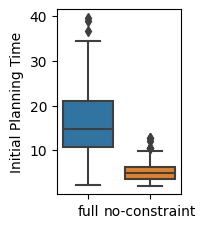

In [5]:
# overall initial time
from matplotlib.pyplot import figure

px = 1/plt.rcParams['figure.dpi']
figure(figsize=(160*px, 240*px))

ax = boxplot([average_initial_time['full'],average_initial_time['default']])
print(statistics.mean(average_initial_time['full']))
print(statistics.mean(average_initial_time['default']))
ax.set_xticklabels(['full','no-constraint'])
ax.set_ylabel('Initial Planning Time')
print(stats.ttest_ind(average_initial_time['full'], average_initial_time['default']))
plt.show()

In [6]:
import re
import math
def state2action(initial_state, state):
    frees = re.findall(r"free-\w+", state)
    nums = [3,2,1]
    for i in frees:
        nums[2 - int(i.split('_')[1])] -= 1
    
    change = [len(peg) - peg.count(0) - n for peg, n in zip(initial_state, nums)]
    start_text = None
    end_text = None
    for i in range(1,4):
        text = "tol_peg_" + str(i) 
        if change[i-1] == 1:
            start_text = text
        elif change[i-1] == -1:
            end_text = text
            
    return (start_text, end_text)
    
def list2counter(initial_state, reslist):
    counter = {}
    for item in reslist:
        counter[state2action(initial_state, item[0])] = item[1]
        
    return counter

def dic2counter(initial_state, resdic):
    counter = {}
    for item in resdic:
        counter[state2action(initial_state, item)] = resdic[item]
        
    return counter

def str2action(initial_state, state_str):
    nums = [int(state_str[0]), int(state_str[1]), int(state_str[2])]
    change = [len(peg) - peg.count(0) - n for peg, n in zip(initial_state, nums)]
    start_text = None
    end_text = None
    for i in range(1,4):
        text = "tol_peg_" + str(i) 
        if change[i-1] == 1:
            start_text = text
        elif change[i-1] == -1:
            end_text = text
            
    return (start_text, end_text)

def model2counter(initial_state, resdic):
    counter = {}
    for item in resdic:
        counter[str2action(initial_state, item)] = resdic[item]
    return counter

def dis_2probs(prob1, prob2):
    res = 0
    for a,b in zip(prob1, prob2):
        res += abs(a-b)
        
    return res

def cross_entropy_2probs(model_prob, human_prob, alpha = 0.05):
    # normalize model prob with some noisy parameter
    normal_prob = [p*(1-alpha) + alpha/len(model_prob) for p in model_prob]
    
    res = 0
    for a,b in zip(normal_prob, human_prob):
        res += -b*math.log(a)
    
    return res
    
def dic_dis_2probs(dic1, dic2):
    res = 0
    sum1 = 0
    sum2 = 0
    for a in dic1:
        sum1 += dic1[a]
    for b in dic2:
        sum2 += dic2[b]
    
    for a in dic1:
        if a in dic2:
            res += abs(dic1[a]/sum1 - dic2[a]/sum2)/2
        else:
            res += abs(dic1[a]/sum1)
            
    for b in dic2:
        if b in dic1:
            res += abs(dic1[b]/sum1 - dic2[b]/sum2)/2
        else:
            res += abs(dic2[b]/sum2)
            
    return res

TOL_112
[[2, 3, 0], [0, 0], [1]]
[[3, 1, 2], [0, 0], [0]]


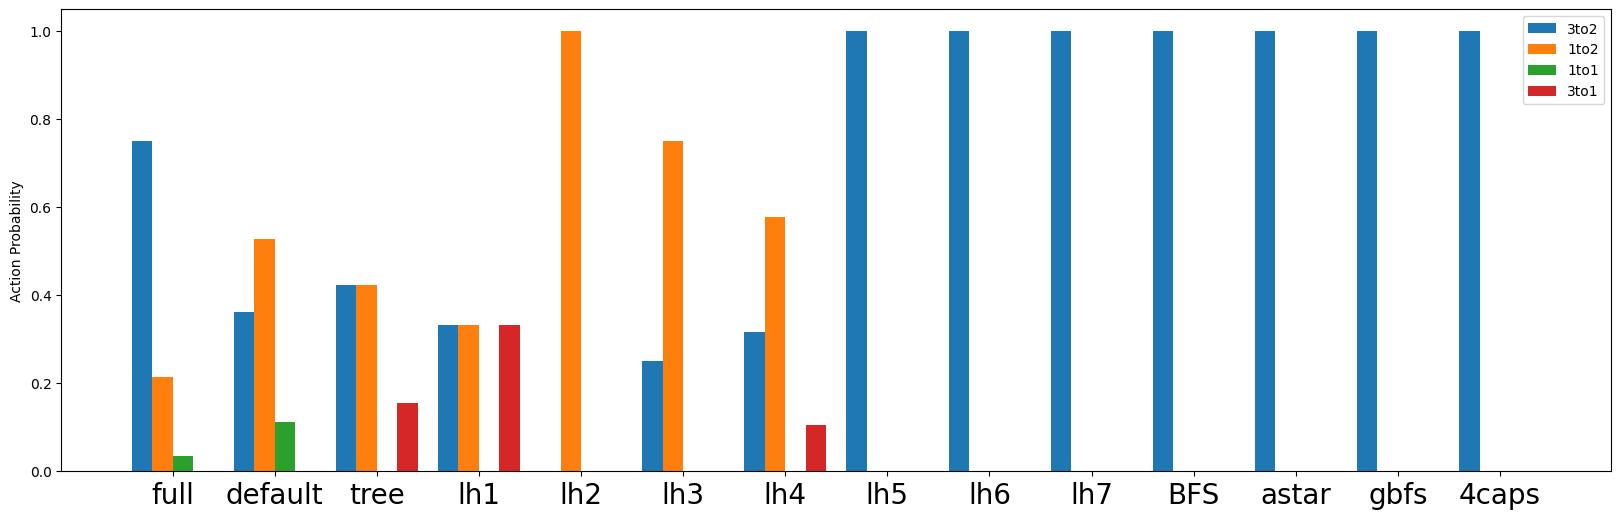

TOL_5
[[1, 2, 3], [0, 0], [0]]
[[3, 2, 1], [0, 0], [0]]


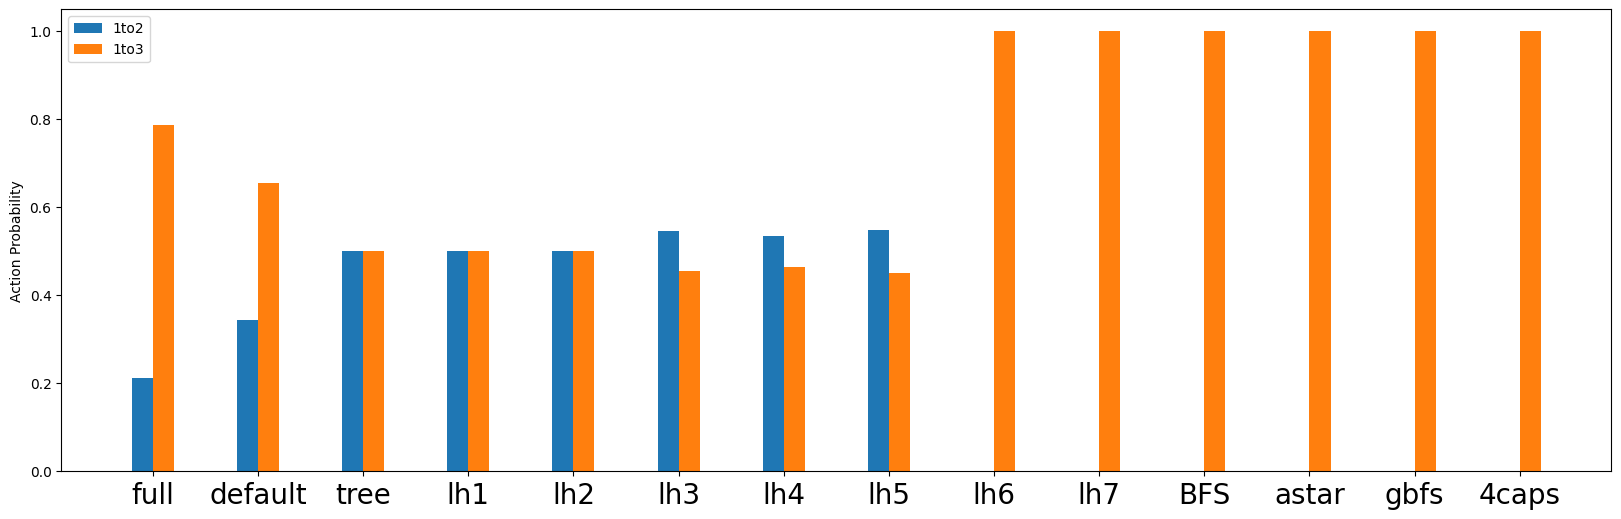

TOL_23
[[1, 2, 3], [0, 0], [0]]
[[2, 1, 0], [0, 0], [3]]


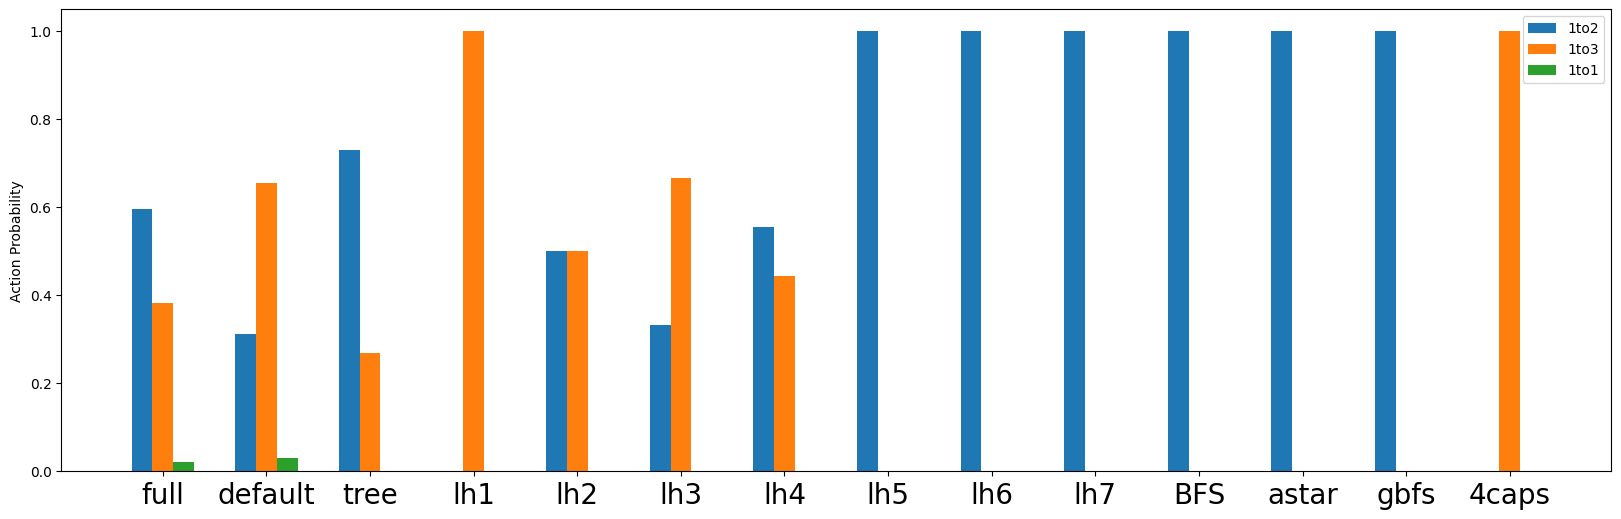

TOL_26
[[1, 2, 3], [0, 0], [0]]
[[3, 0, 0], [1, 0], [2]]


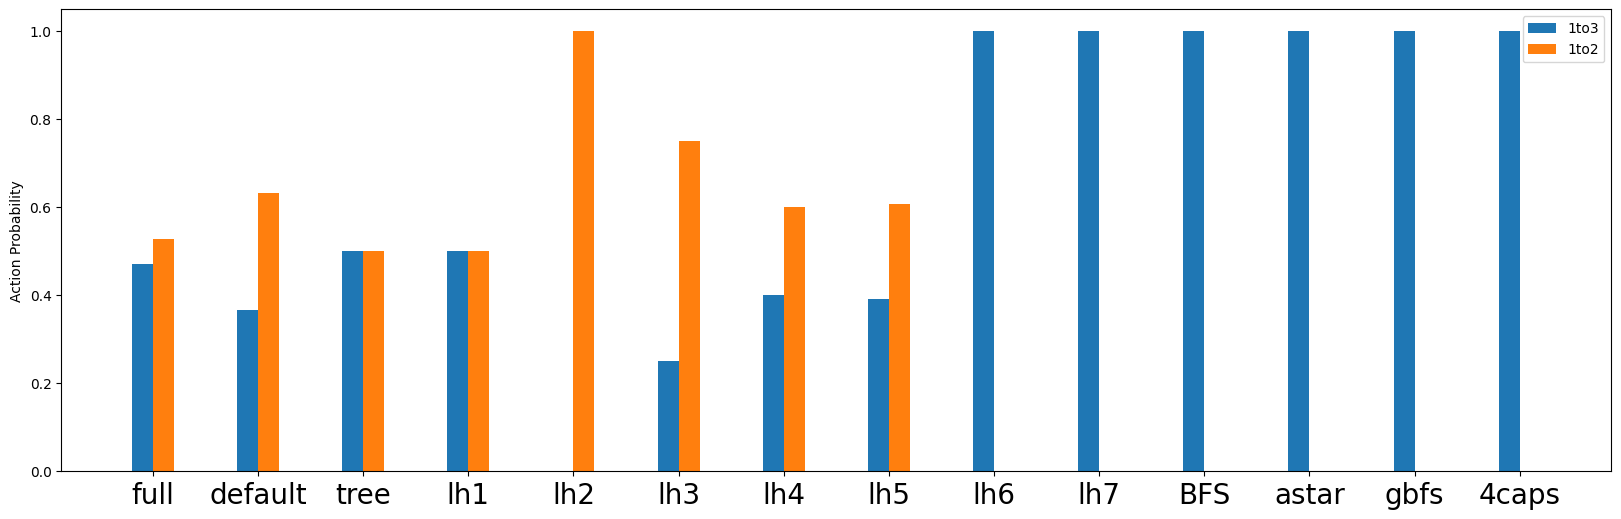

TOL_58
[[2, 3, 0], [1, 0], [0]]
[[1, 2, 0], [0, 0], [3]]


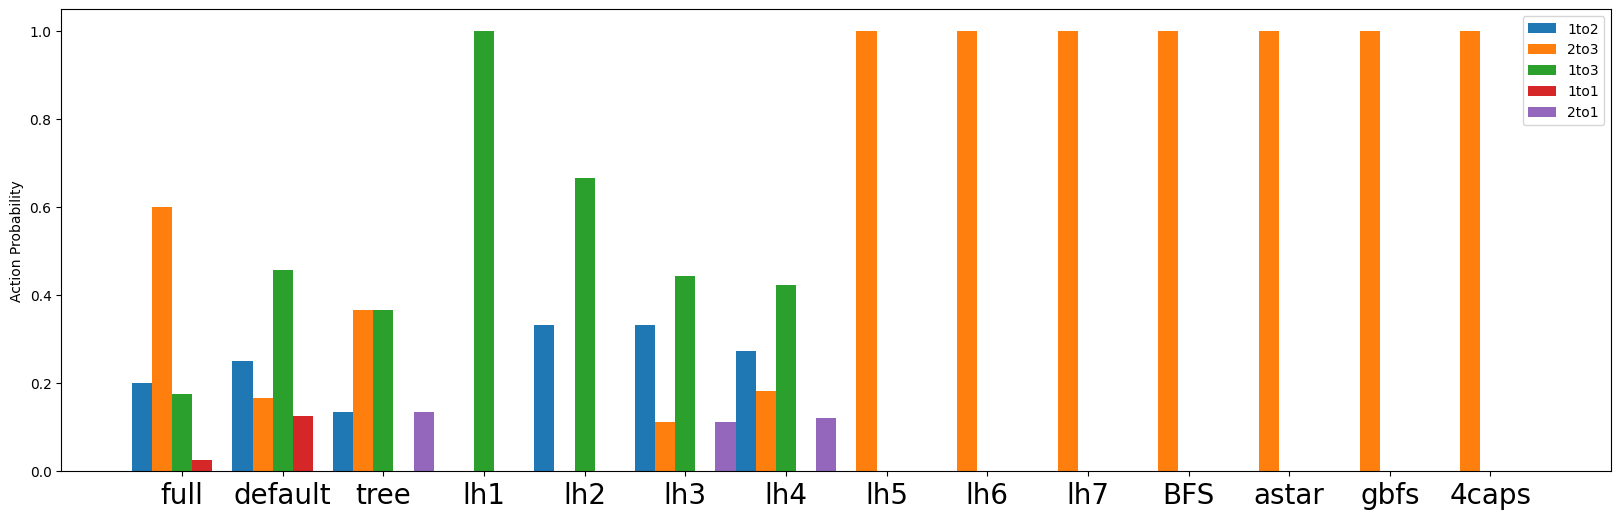

TOL_9
[[1, 2, 3], [0, 0], [0]]
[[3, 1, 0], [2, 0], [0]]


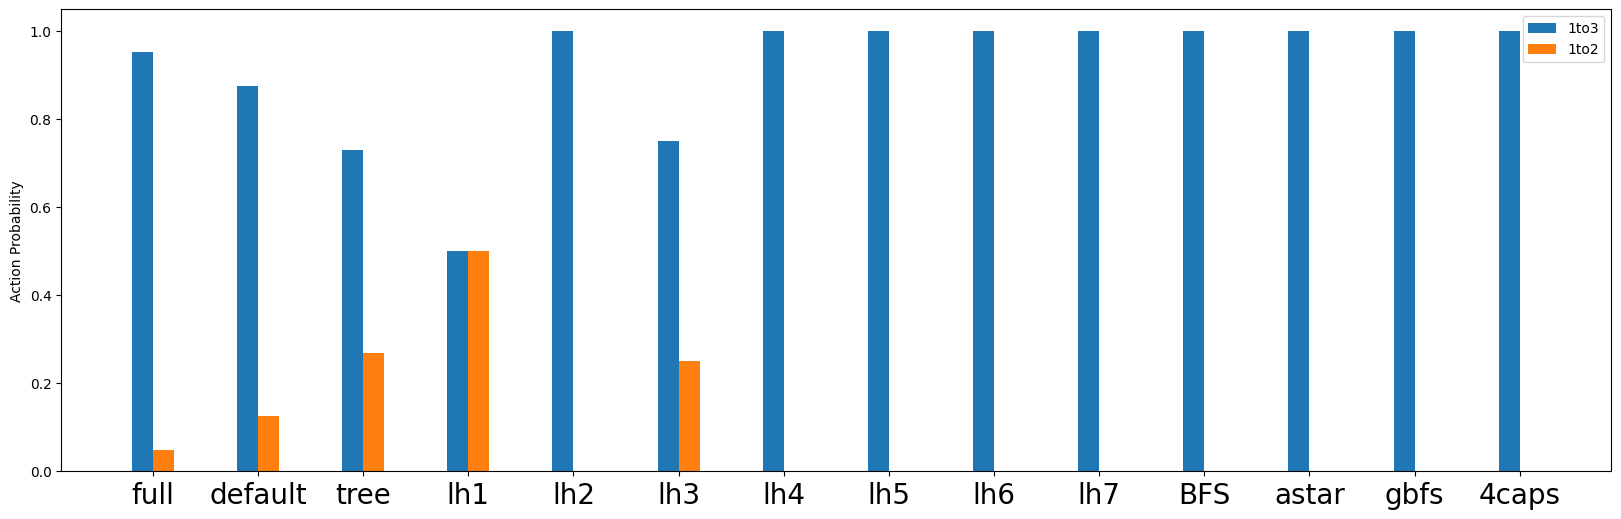

TOL_94
[[3, 0, 0], [1, 2], [0]]
[[1, 2, 0], [0, 0], [3]]


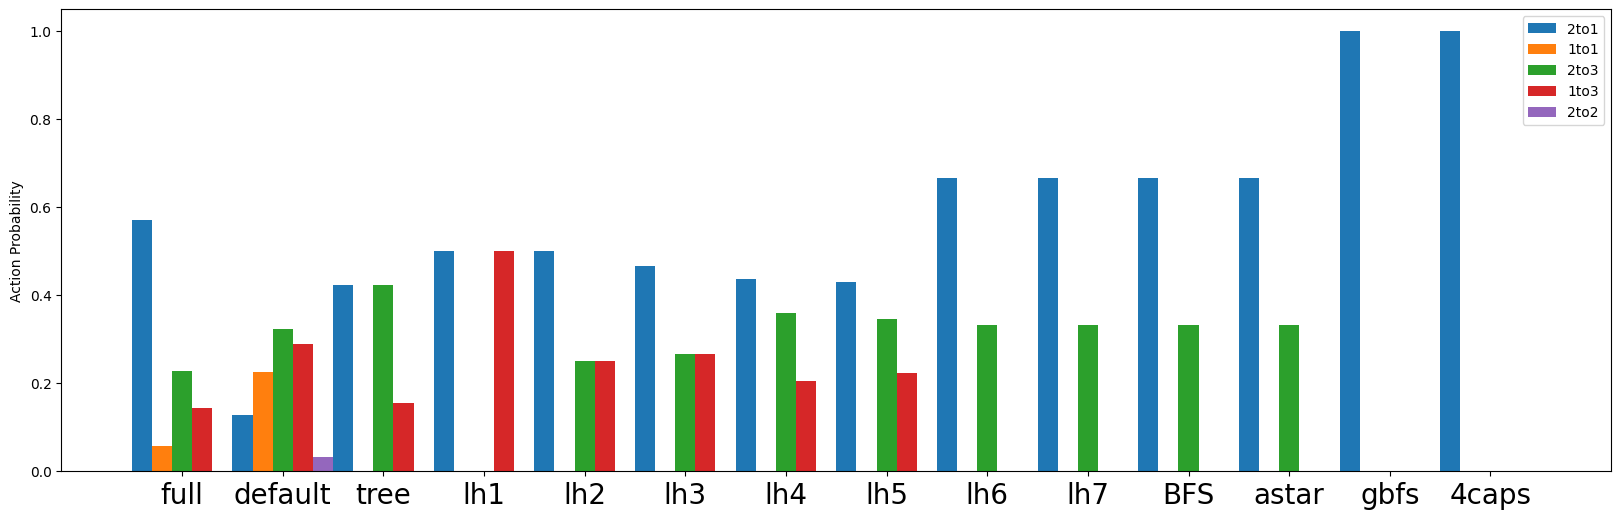

TOL_167
[[3, 0, 0], [2, 0], [1]]
[[2, 1, 0], [0, 0], [3]]


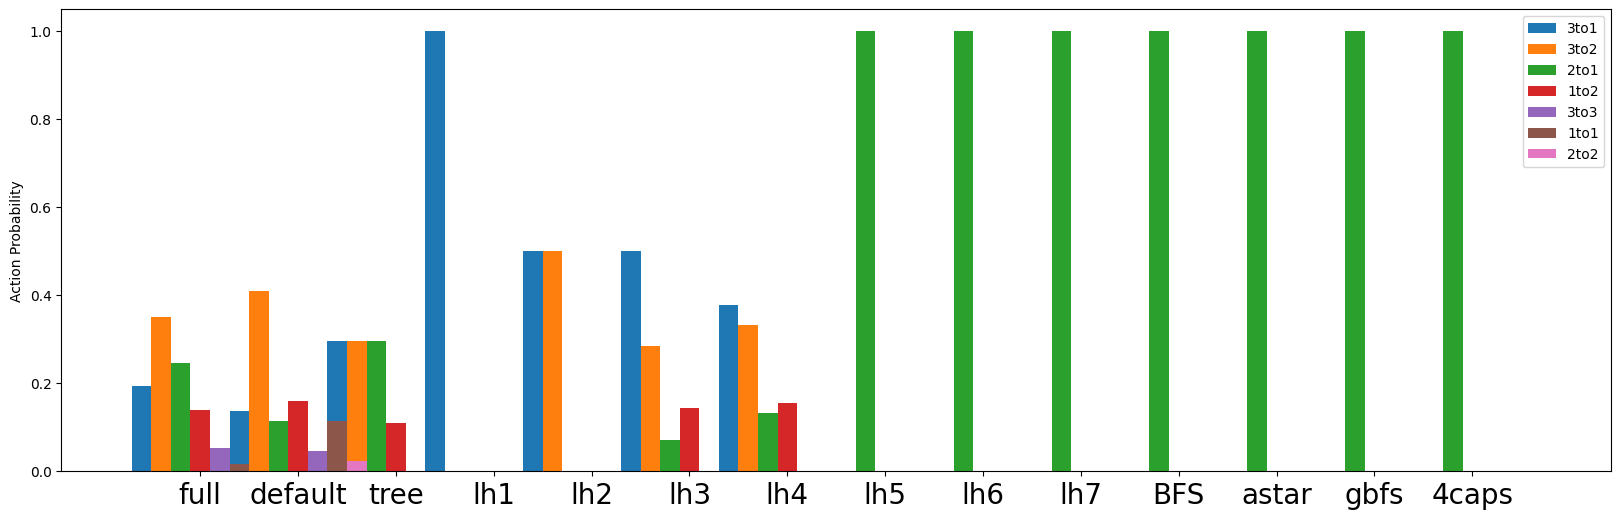

TOL_4
[[1, 2, 3], [0, 0], [0]]
[[3, 1, 2], [0, 0], [0]]


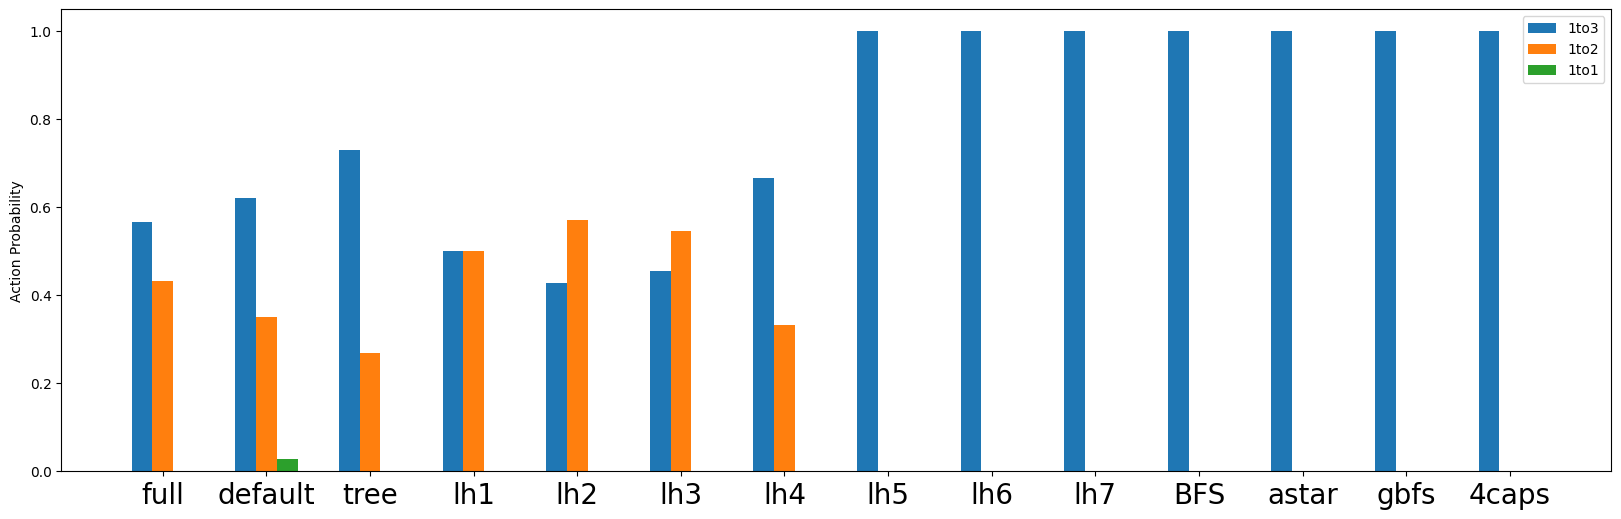

TOL_176
[[3, 0, 0], [2, 0], [1]]
[[0, 0, 0], [1, 3], [2]]


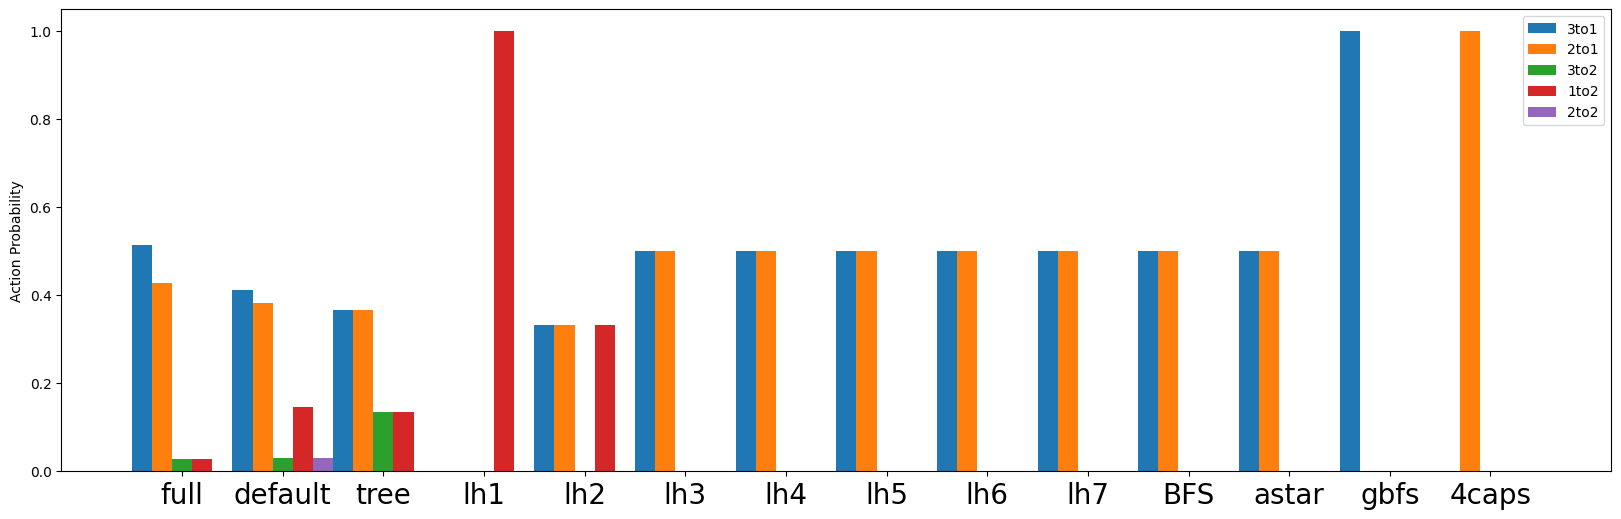

TOL_205
[[0, 0, 0], [2, 3], [1]]
[[2, 0, 0], [3, 0], [1]]


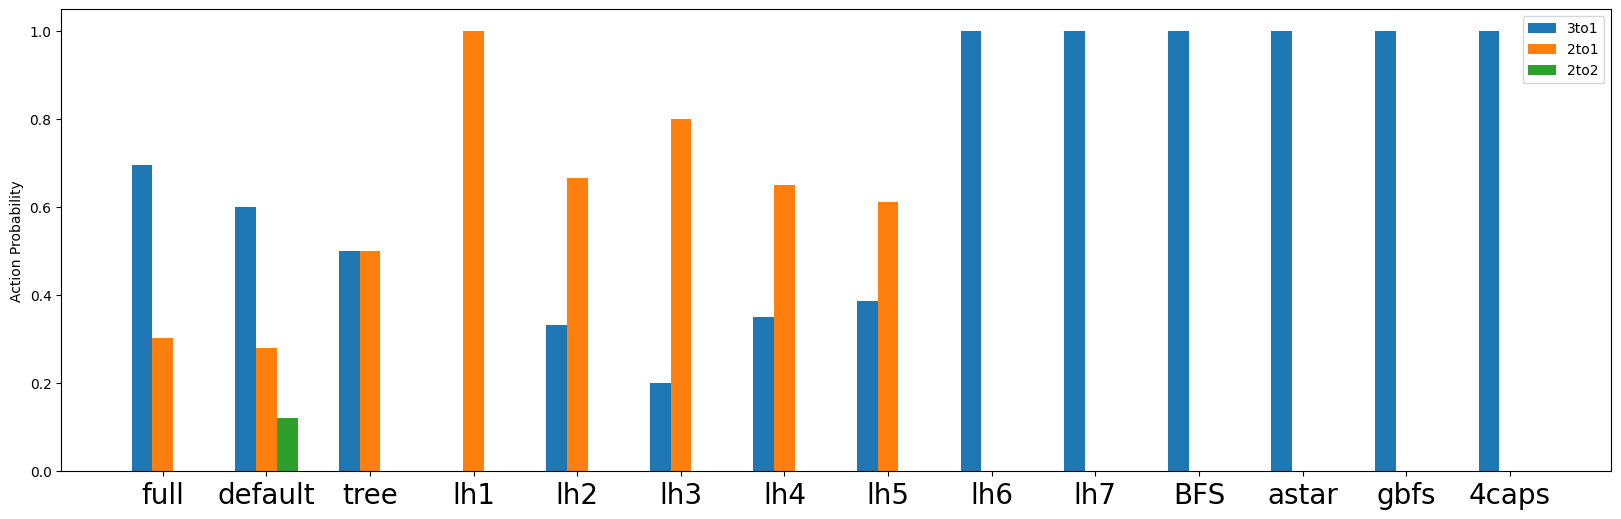

TOL_55
[[2, 3, 0], [1, 0], [0]]
[[3, 2, 0], [0, 0], [1]]


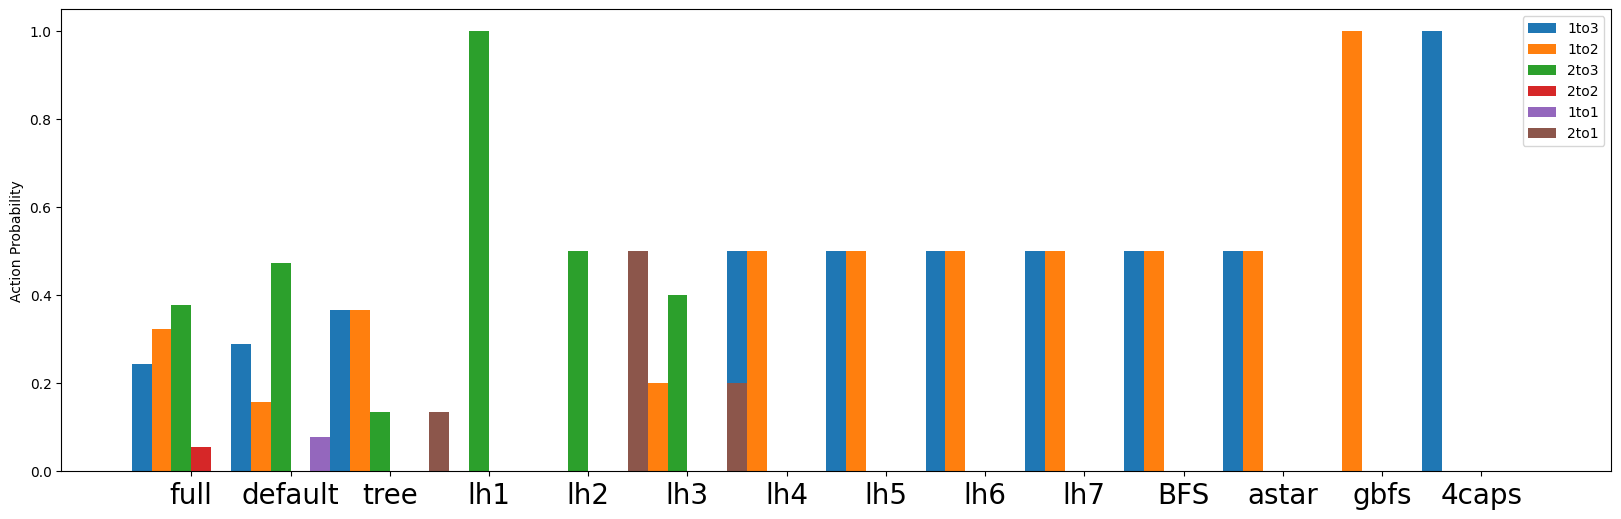

TOL_123
[[2, 3, 0], [0, 0], [1]]
[[1, 0, 0], [2, 3], [0]]


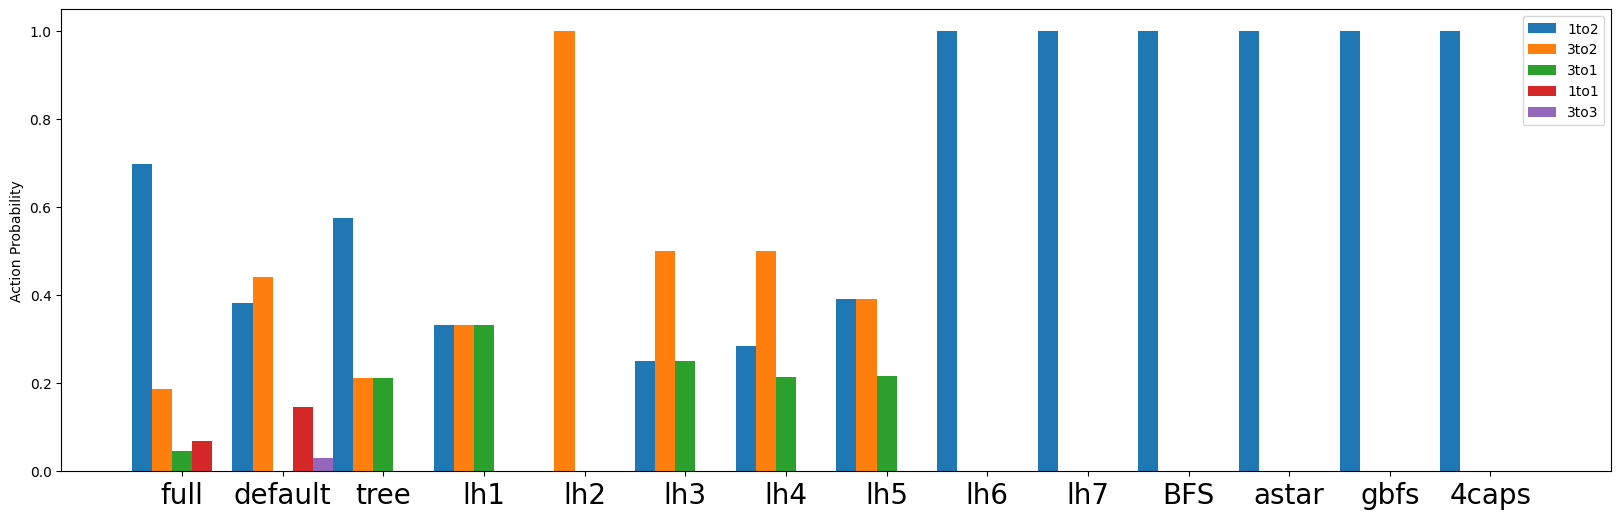

TOL_122
[[2, 3, 0], [0, 0], [1]]
[[3, 0, 0], [2, 1], [0]]


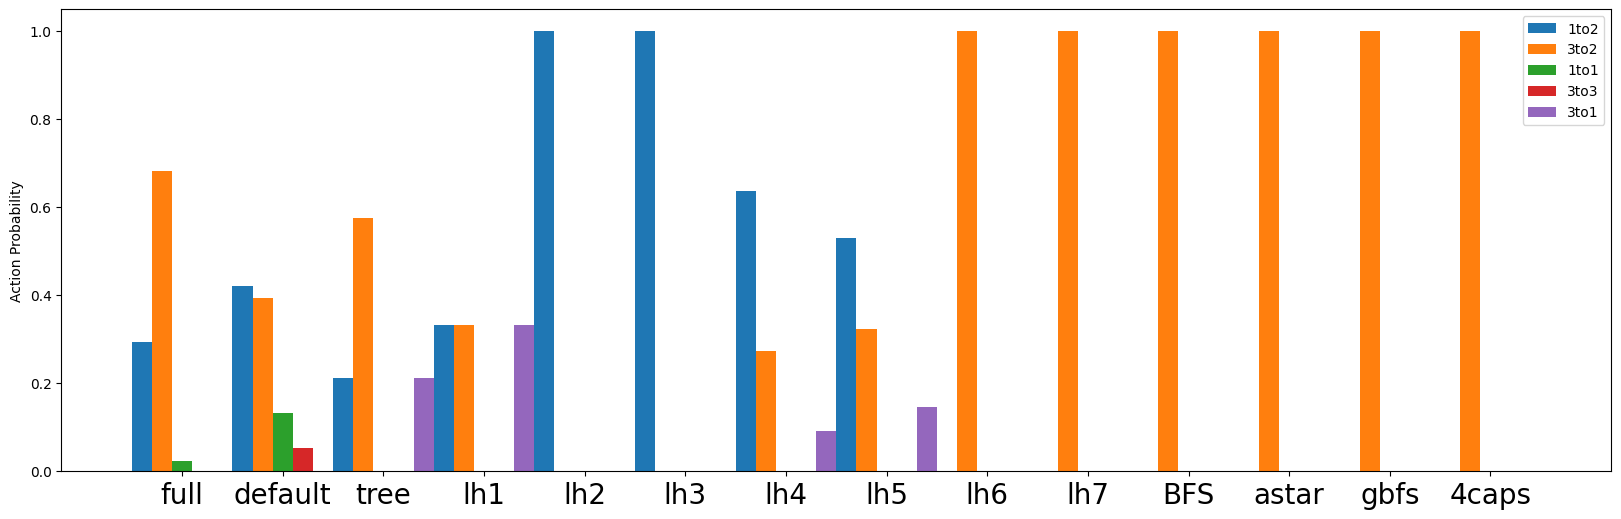

TOL_13
[[1, 2, 3], [0, 0], [0]]
[[2, 0, 0], [1, 3], [0]]


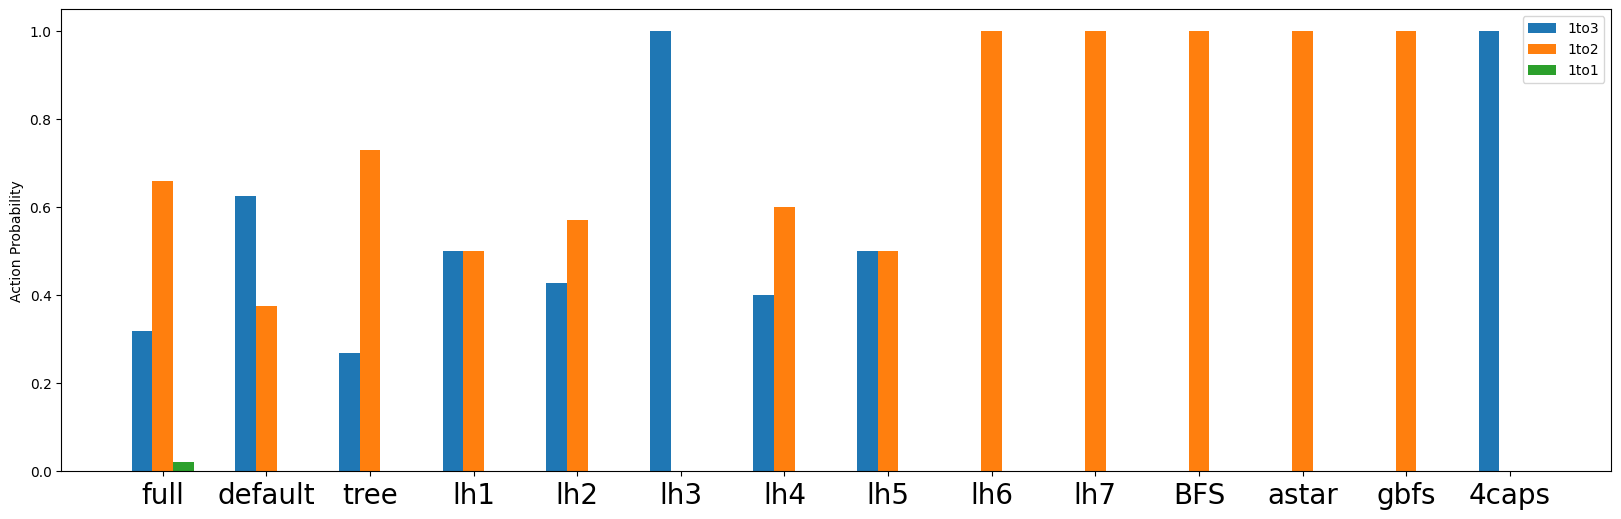

TOL_147
[[3, 0, 0], [2, 0], [1]]
[[2, 3, 1], [0, 0], [0]]


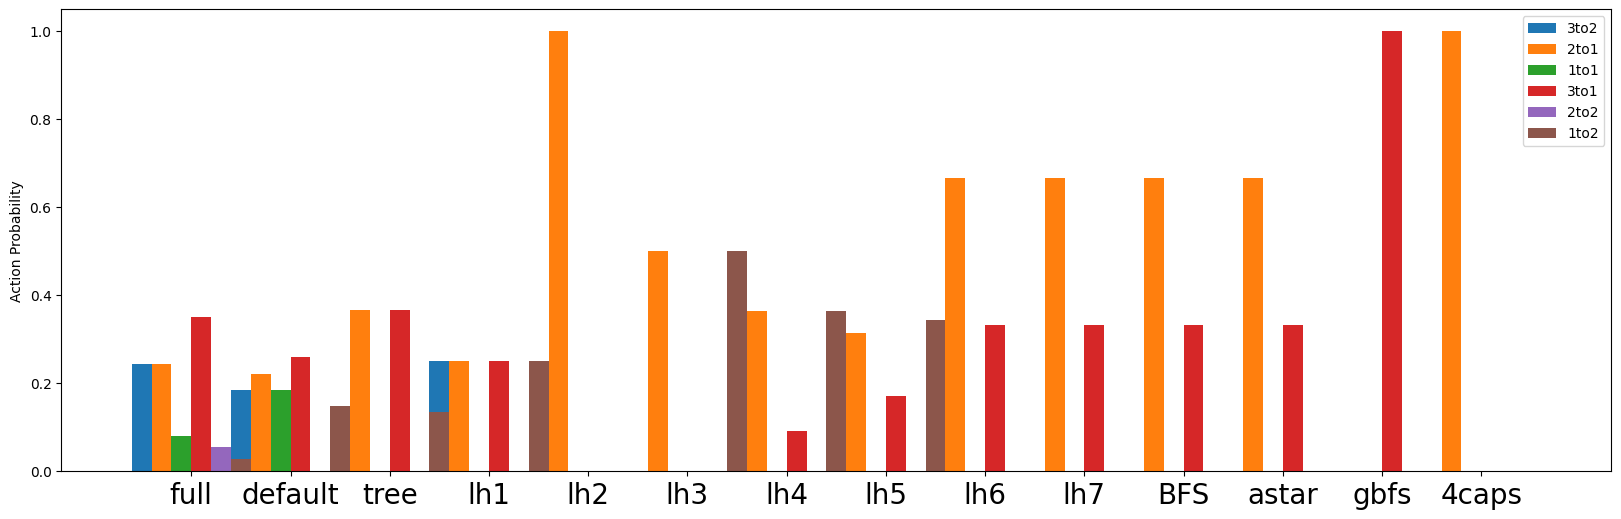

TOL_14
[[1, 2, 3], [0, 0], [0]]
[[3, 0, 0], [2, 1], [0]]


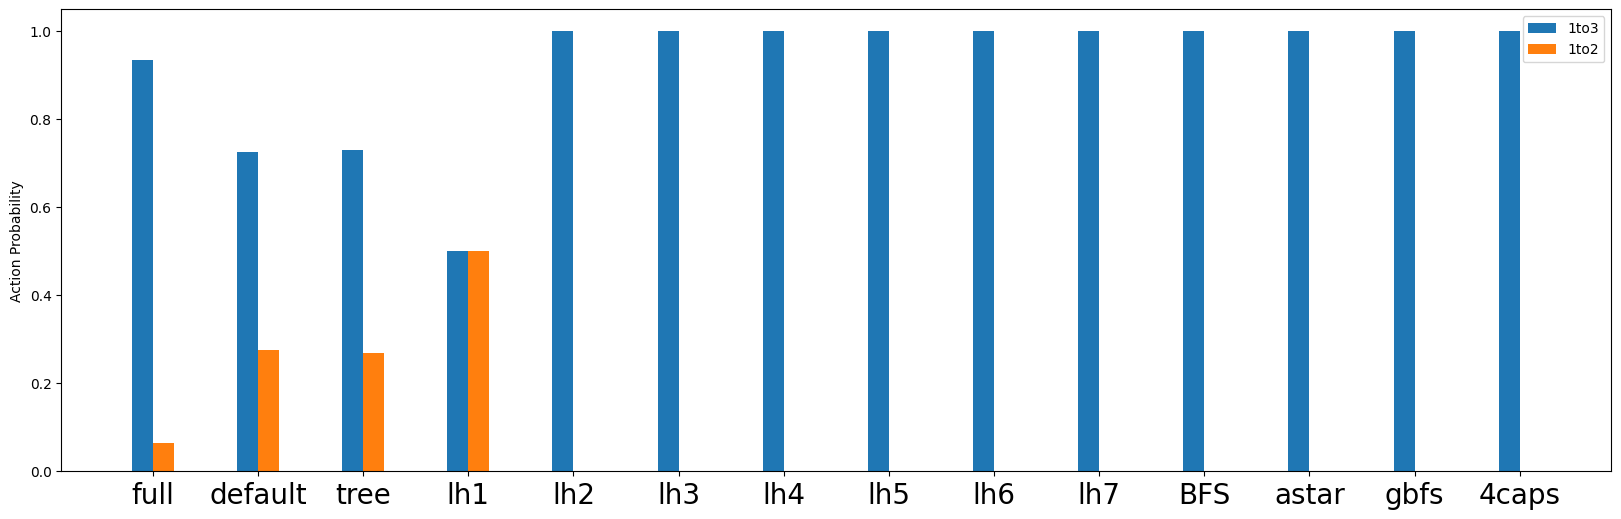

TOL_116
[[2, 3, 0], [0, 0], [1]]
[[1, 3, 0], [2, 0], [0]]


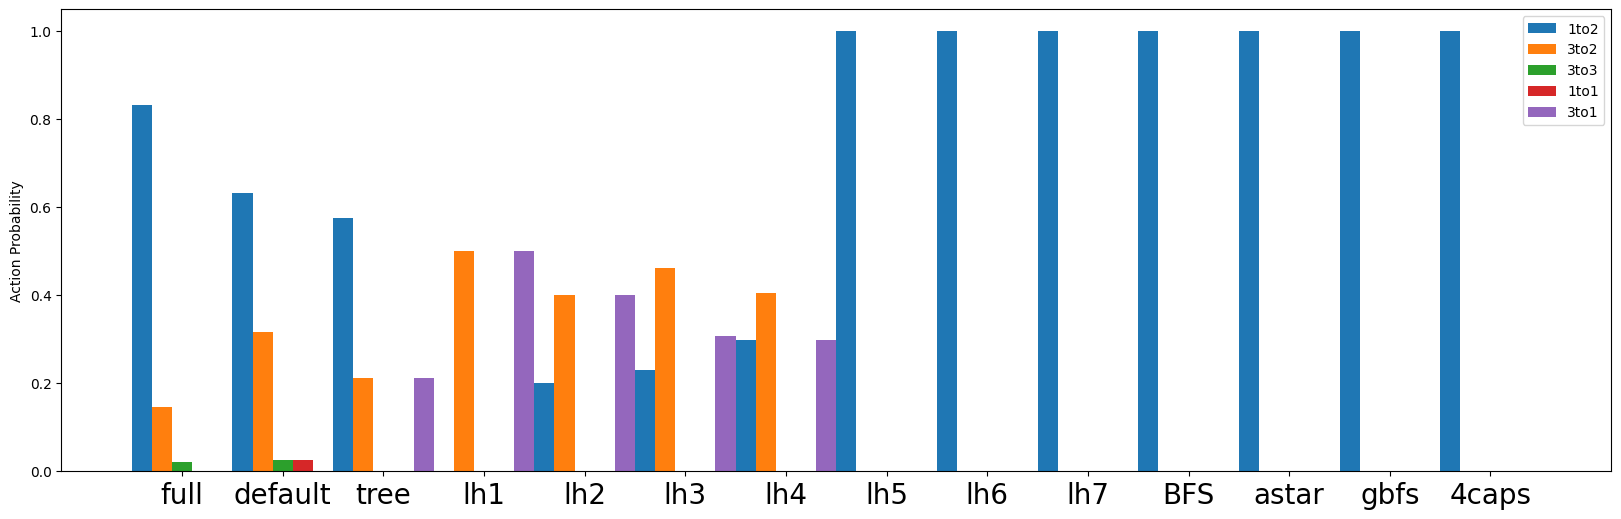

TOL_108
[[2, 3, 0], [0, 0], [1]]
[[1, 2, 3], [0, 0], [0]]


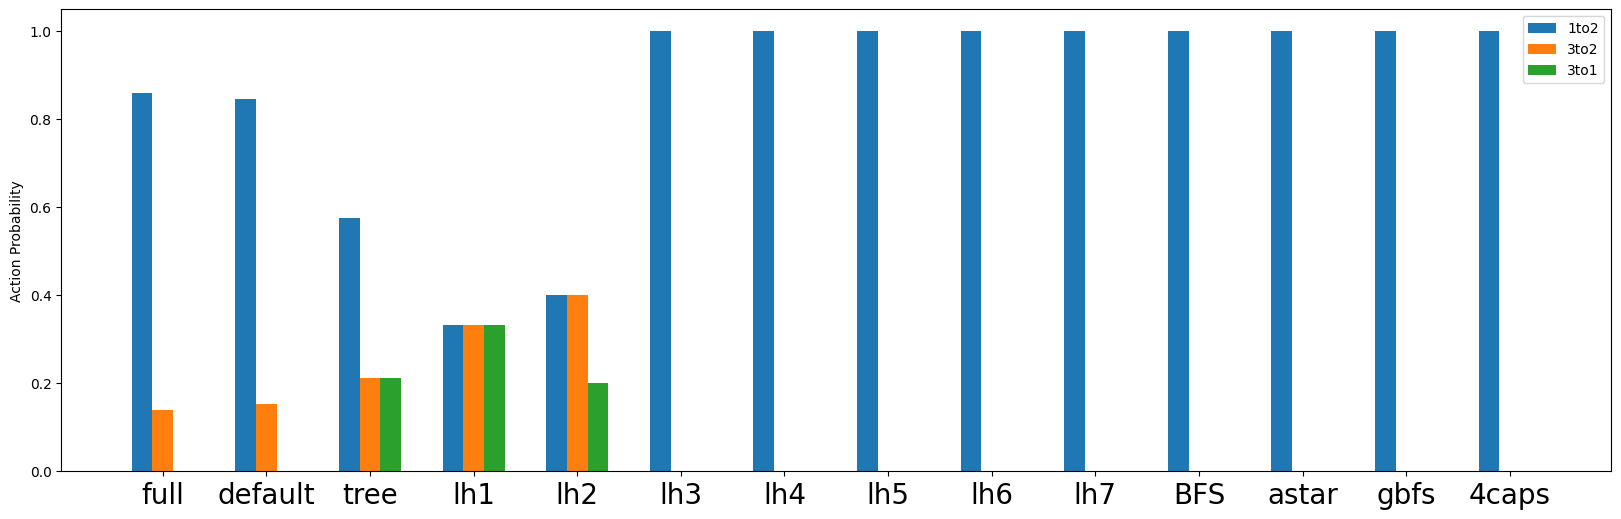

TOL_211
[[0, 0, 0], [2, 3], [1]]
[[0, 0, 0], [3, 2], [1]]


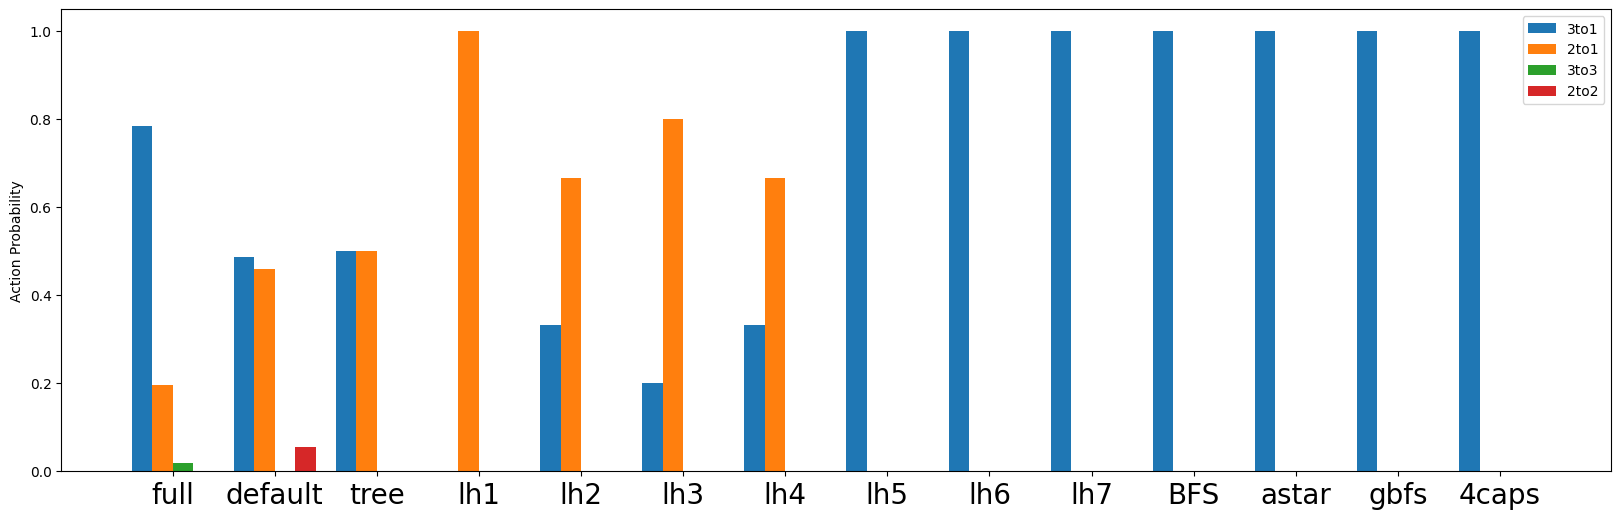

TOL_24
[[1, 2, 3], [0, 0], [0]]
[[3, 0, 0], [2, 0], [1]]


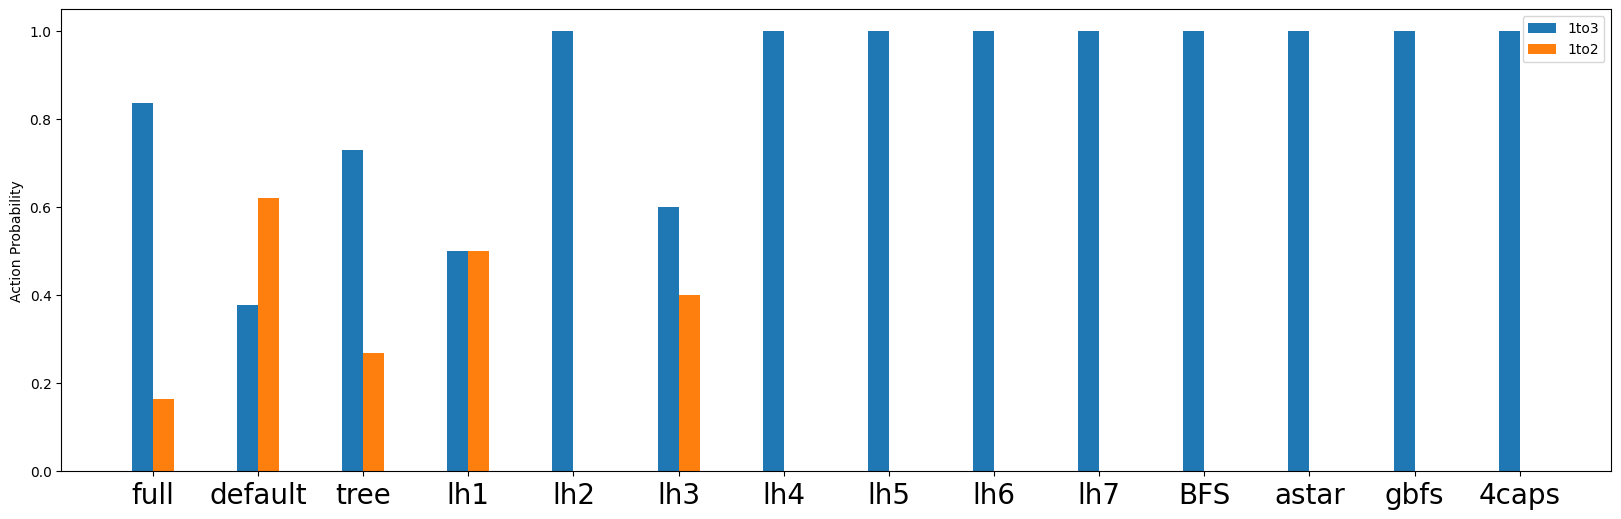

TOL_186
[[0, 0, 0], [2, 3], [1]]
[[2, 3, 0], [1, 0], [0]]


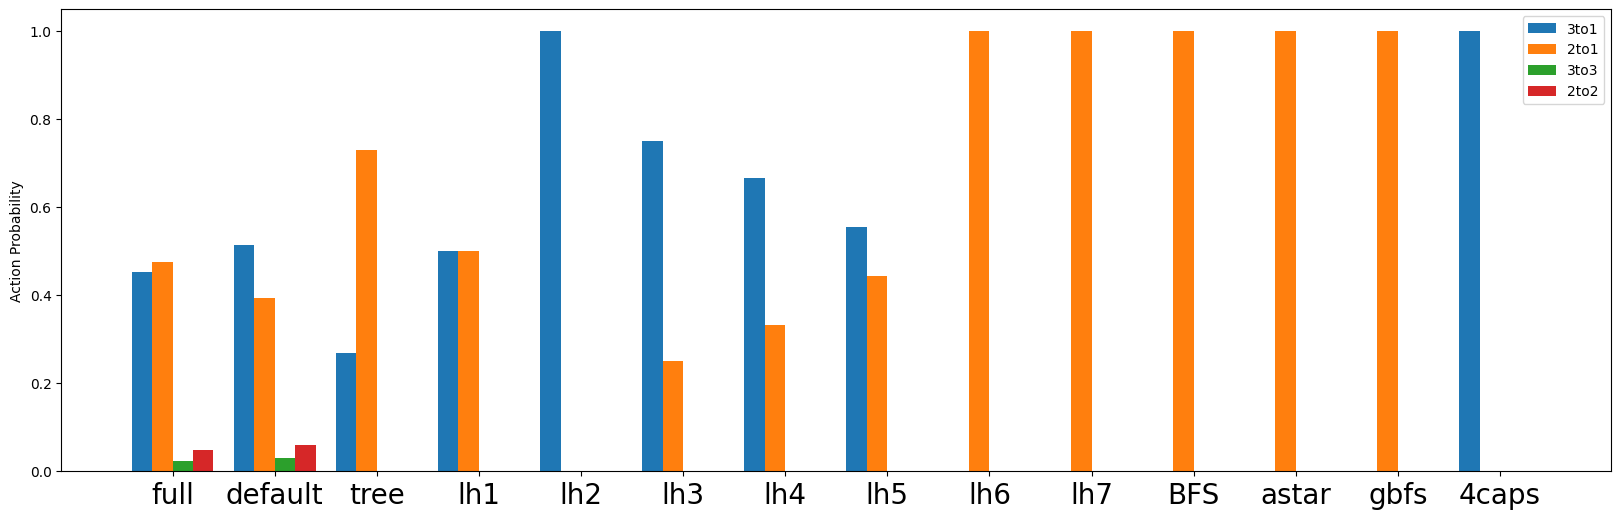

TOL_160
[[3, 0, 0], [2, 0], [1]]
[[2, 0, 0], [3, 1], [0]]


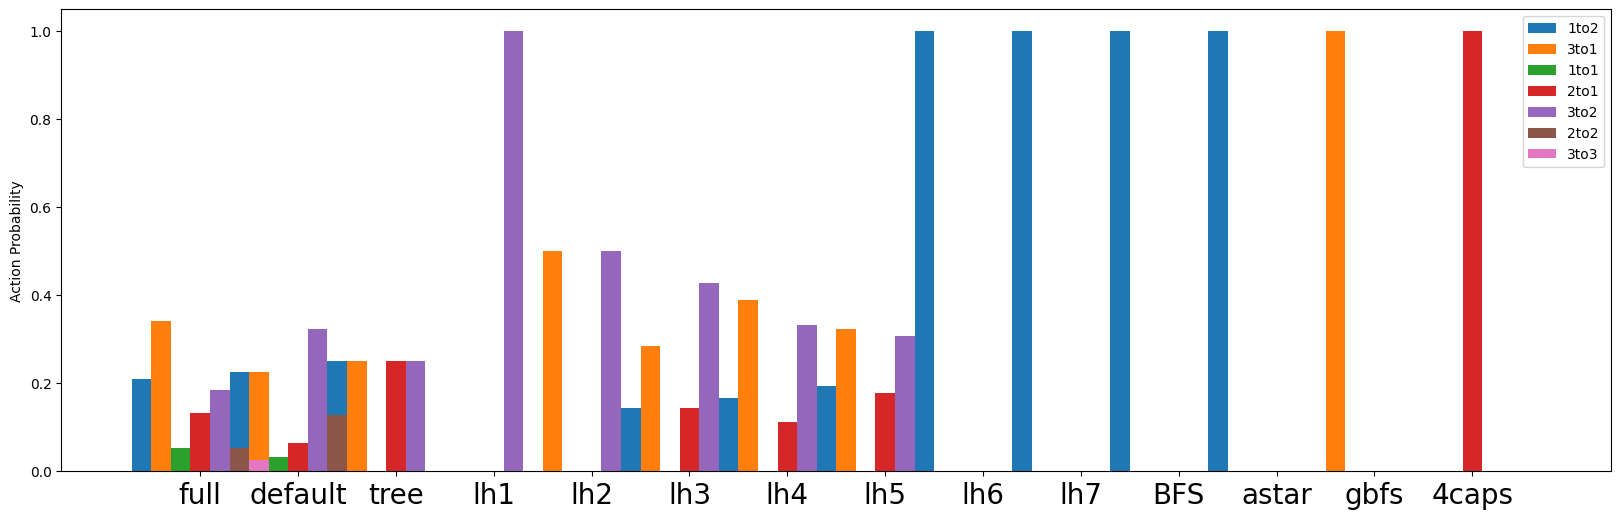

TOL_80
[[3, 0, 0], [1, 2], [0]]
[[1, 3, 0], [2, 0], [0]]


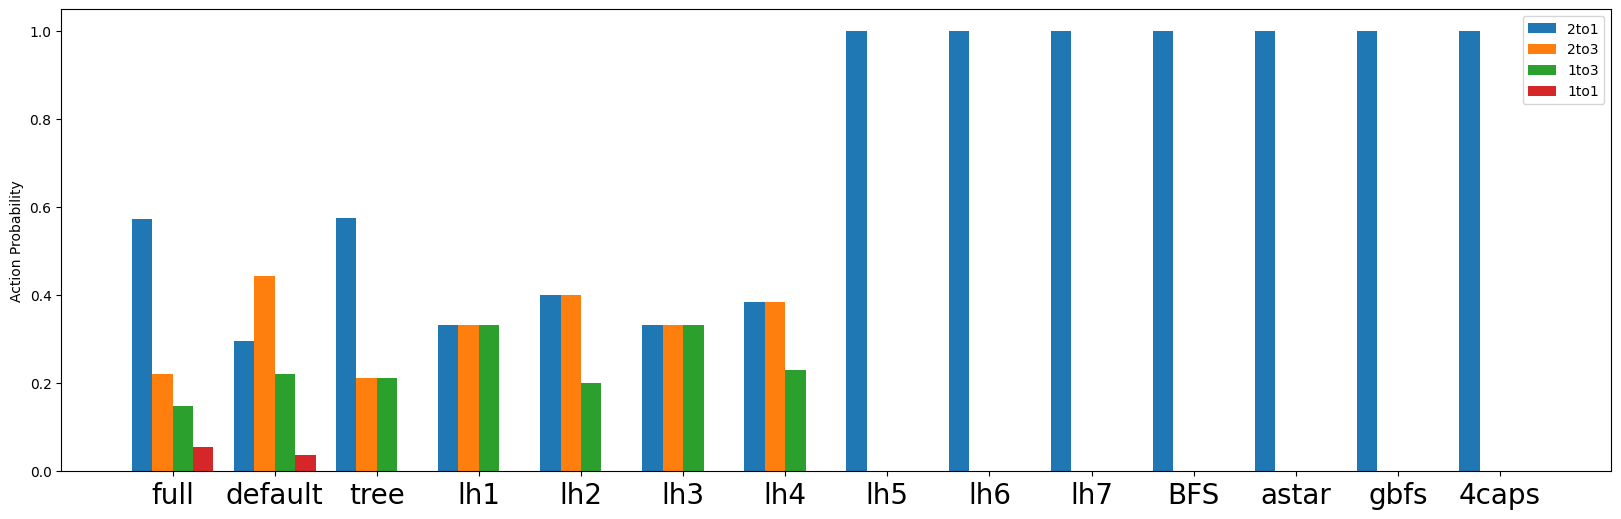

TOL_135
[[2, 3, 0], [0, 0], [1]]
[[1, 0, 0], [3, 0], [2]]


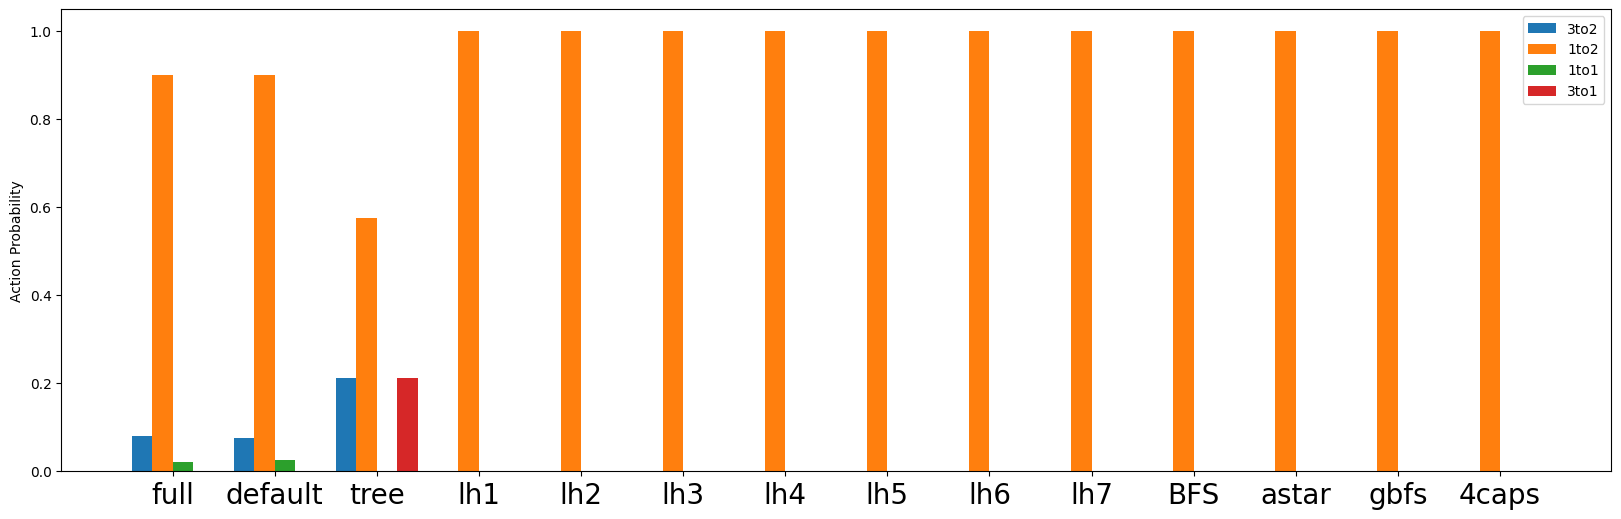

TOL_213
[[0, 0, 0], [2, 3], [1]]
[[0, 0, 0], [3, 1], [2]]


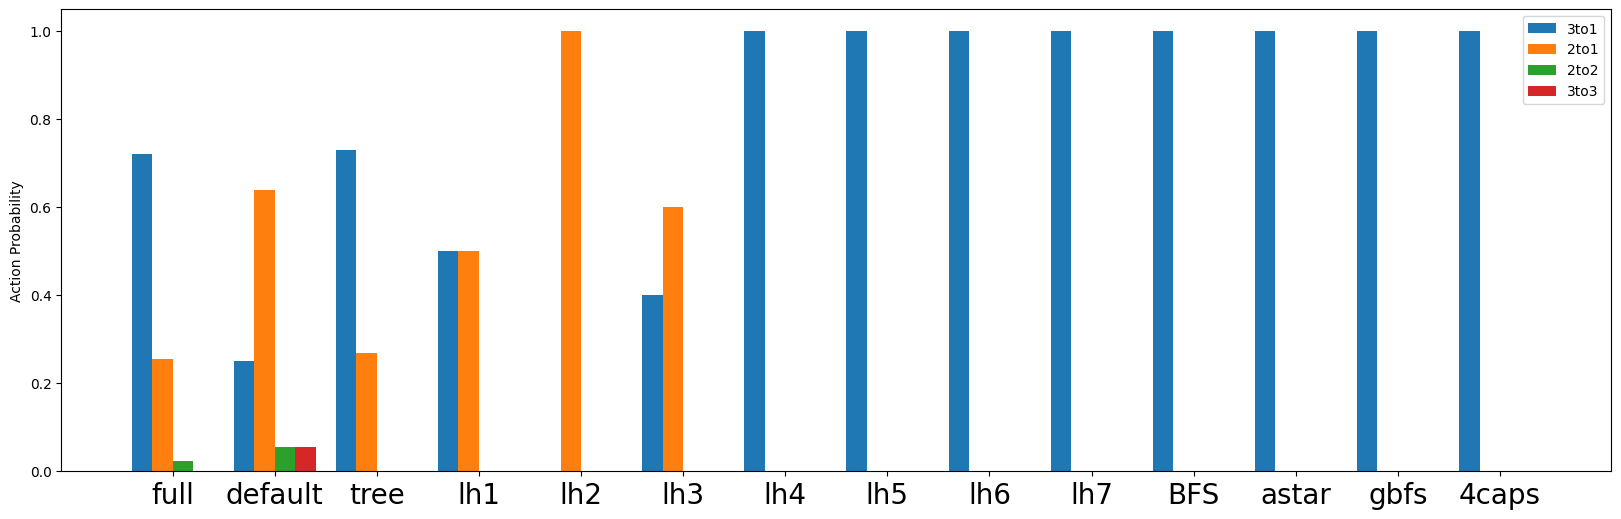

TOL_127
[[2, 3, 0], [0, 0], [1]]
[[3, 2, 0], [0, 0], [1]]


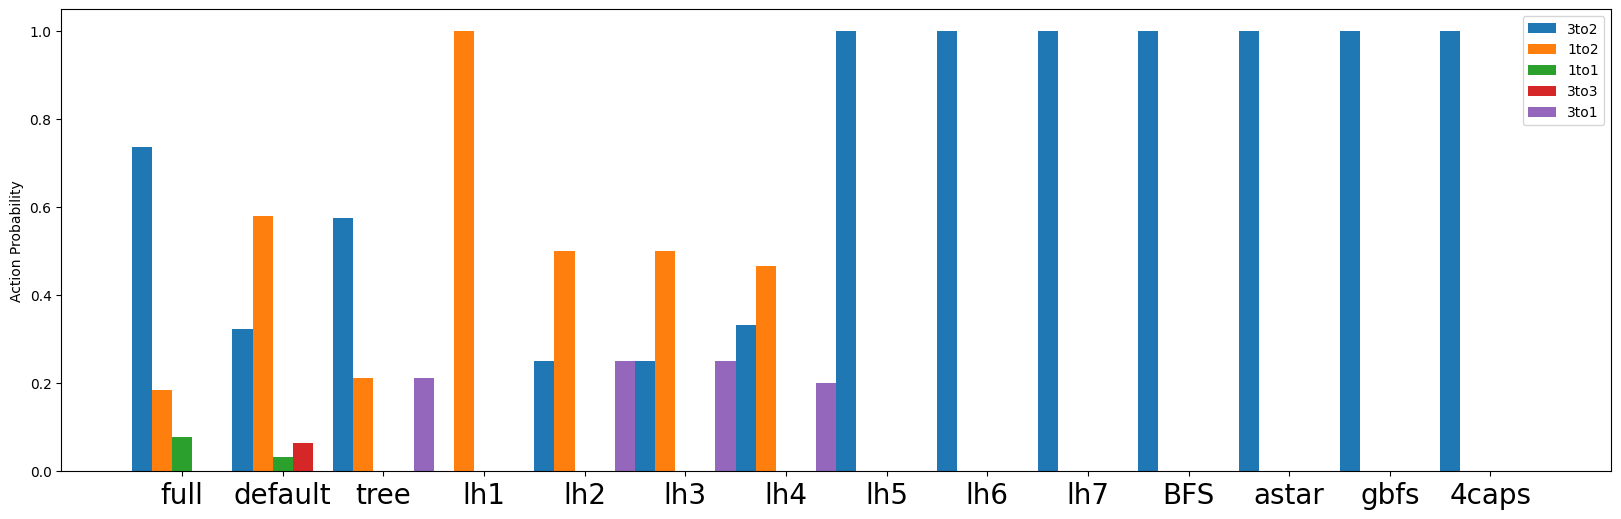

TOL_1
[[1, 2, 3], [0, 0], [0]]
[[1, 3, 2], [0, 0], [0]]


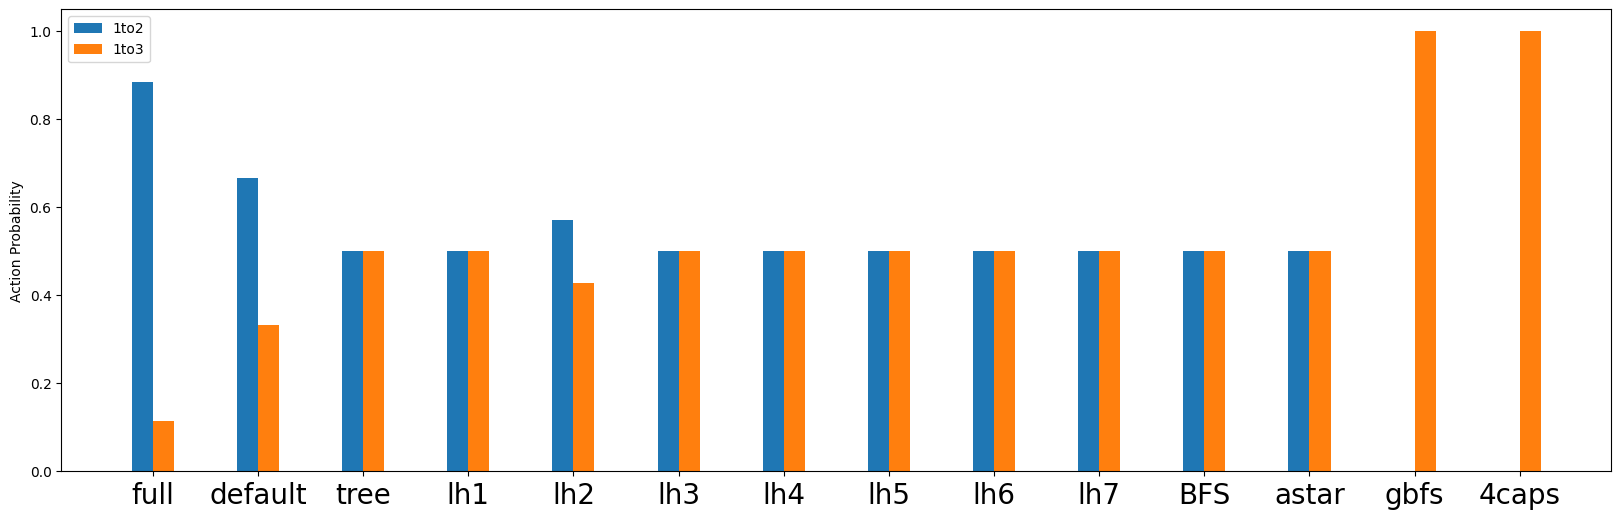

TOL_28
[[1, 2, 3], [0, 0], [0]]
[[2, 0, 0], [1, 0], [3]]


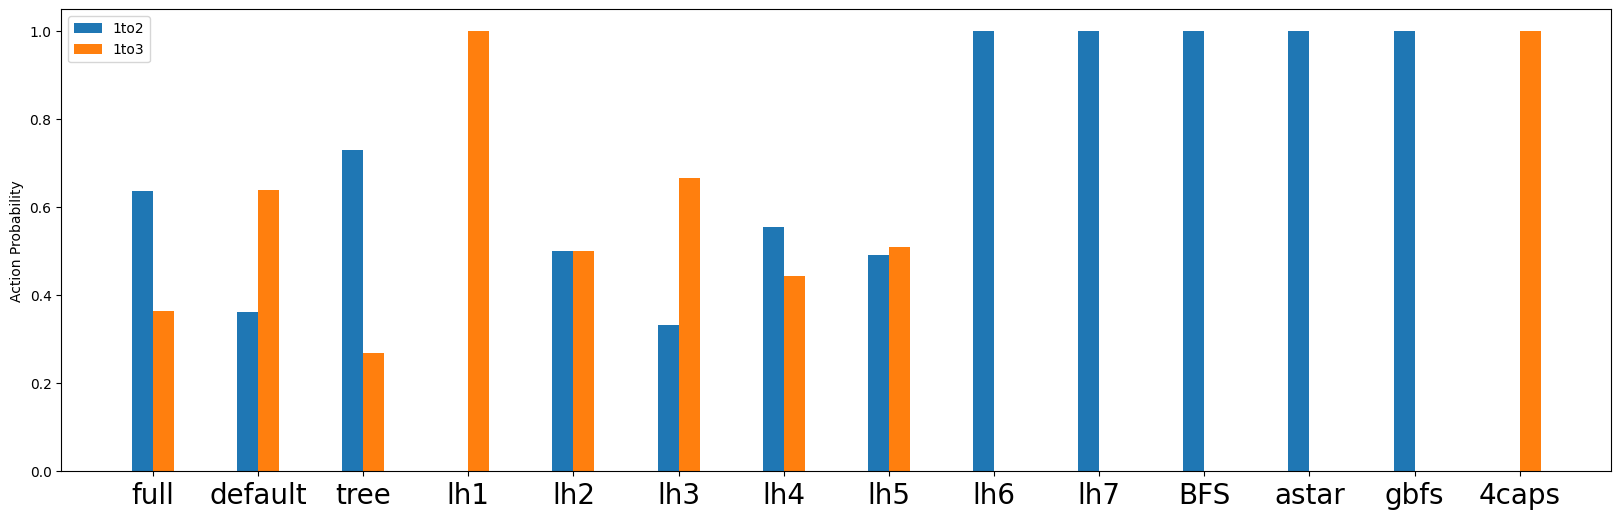

TOL_63
[[2, 3, 0], [1, 0], [0]]
[[1, 0, 0], [3, 0], [2]]


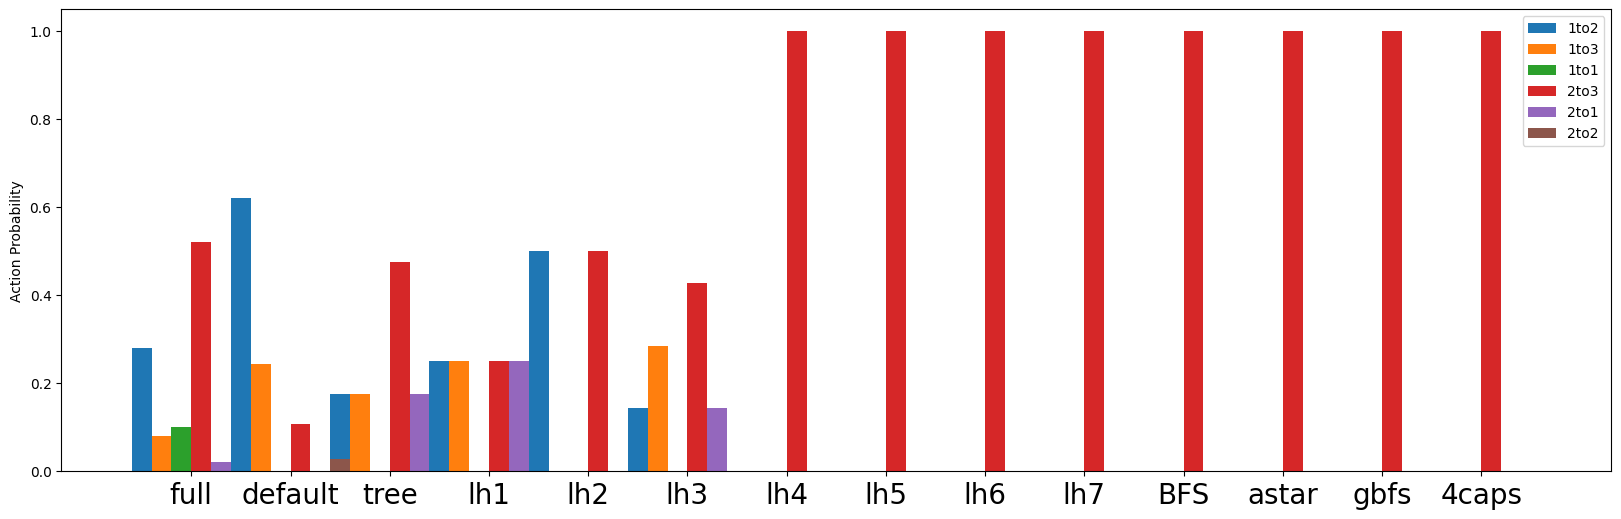

TOL_134
[[2, 3, 0], [0, 0], [1]]
[[3, 0, 0], [1, 0], [2]]


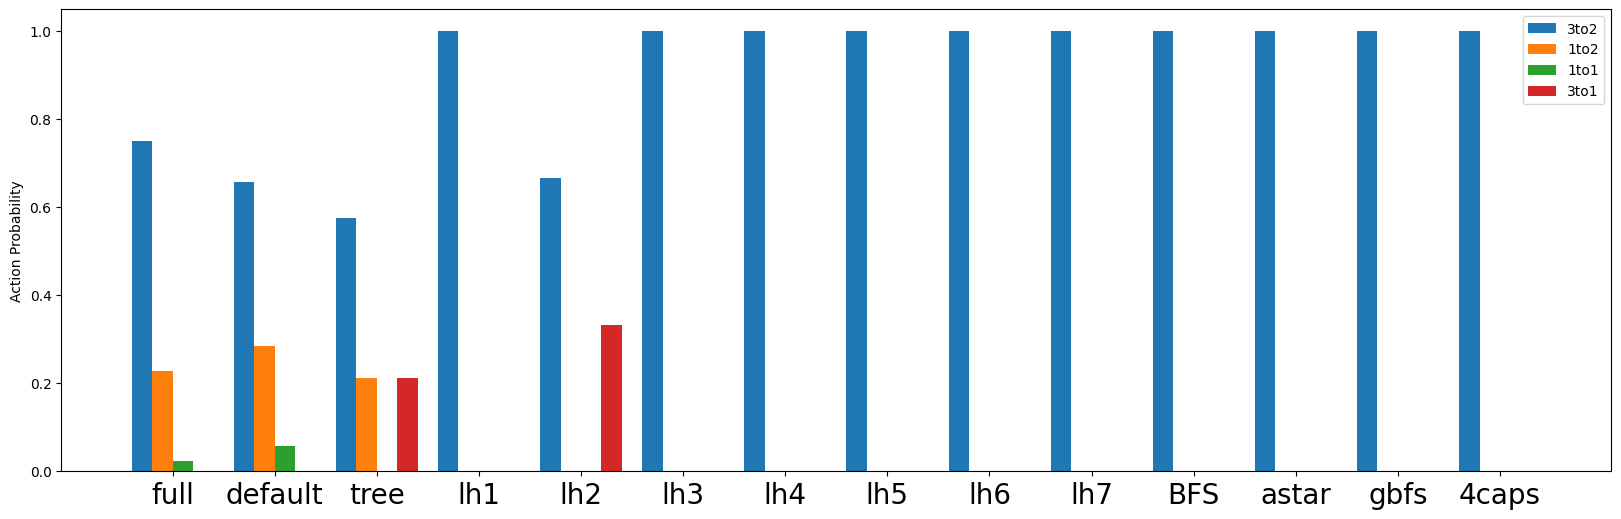

TOL_87
[[3, 0, 0], [1, 2], [0]]
[[1, 0, 0], [2, 3], [0]]


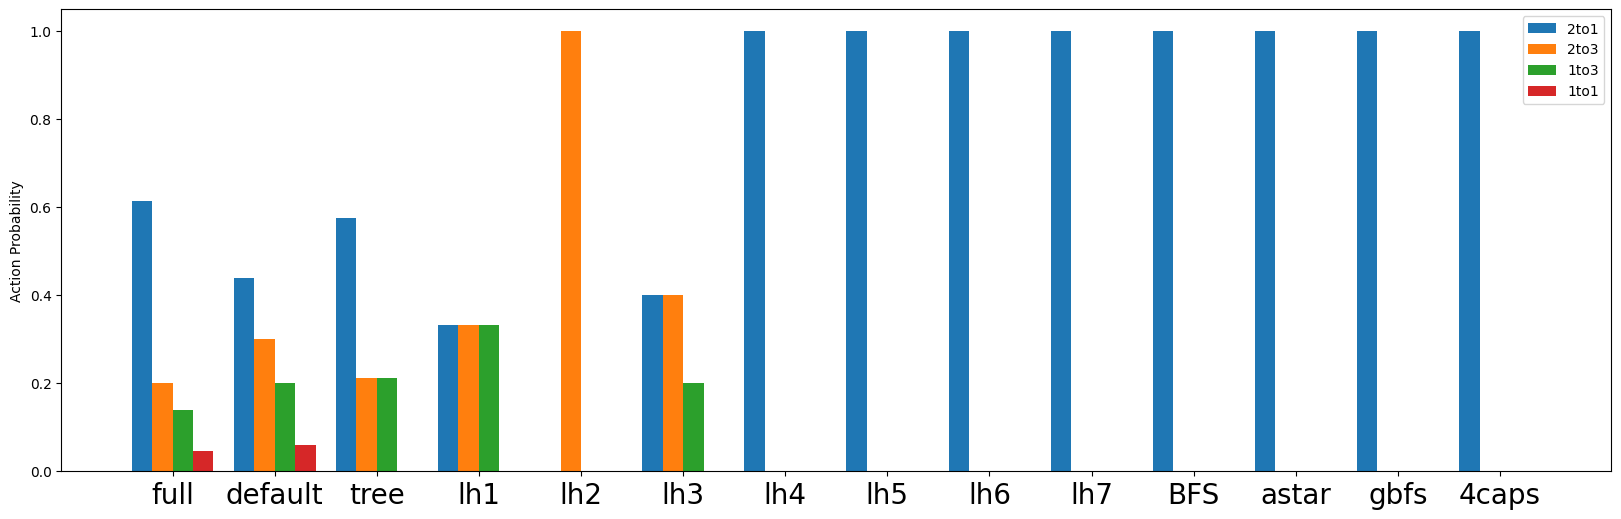

TOL_129
[[2, 3, 0], [0, 0], [1]]
[[3, 1, 0], [0, 0], [2]]


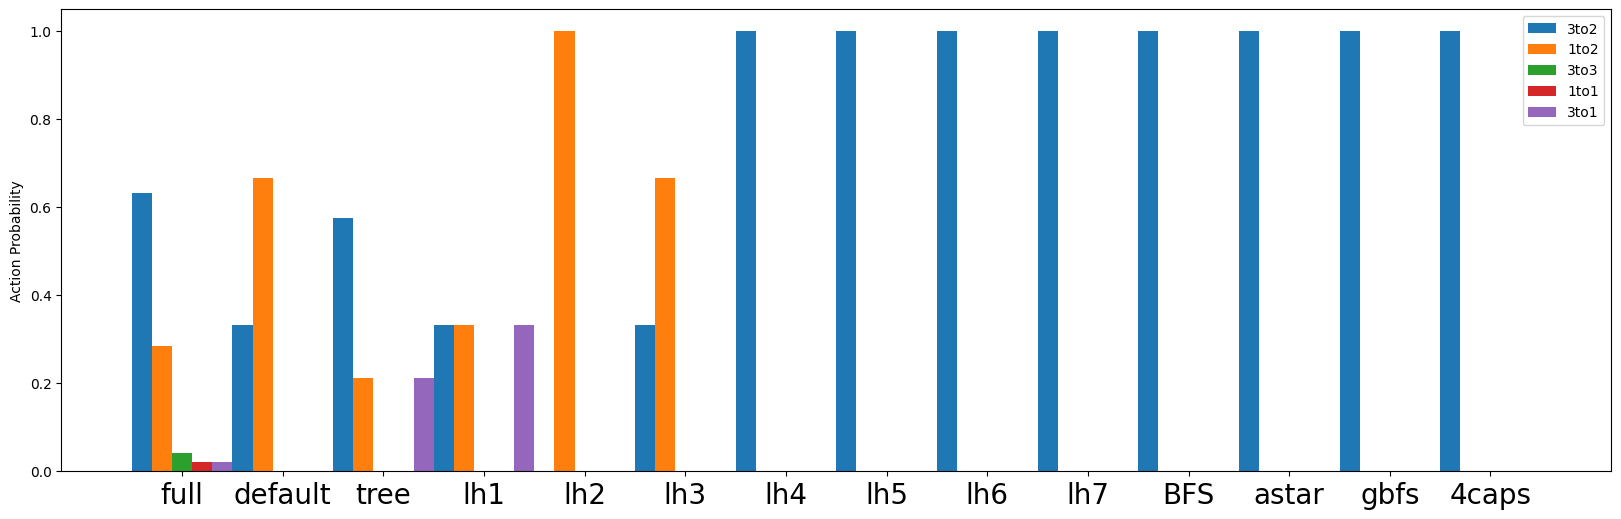

TOL_193
[[0, 0, 0], [2, 3], [1]]
[[2, 0, 0], [1, 3], [0]]


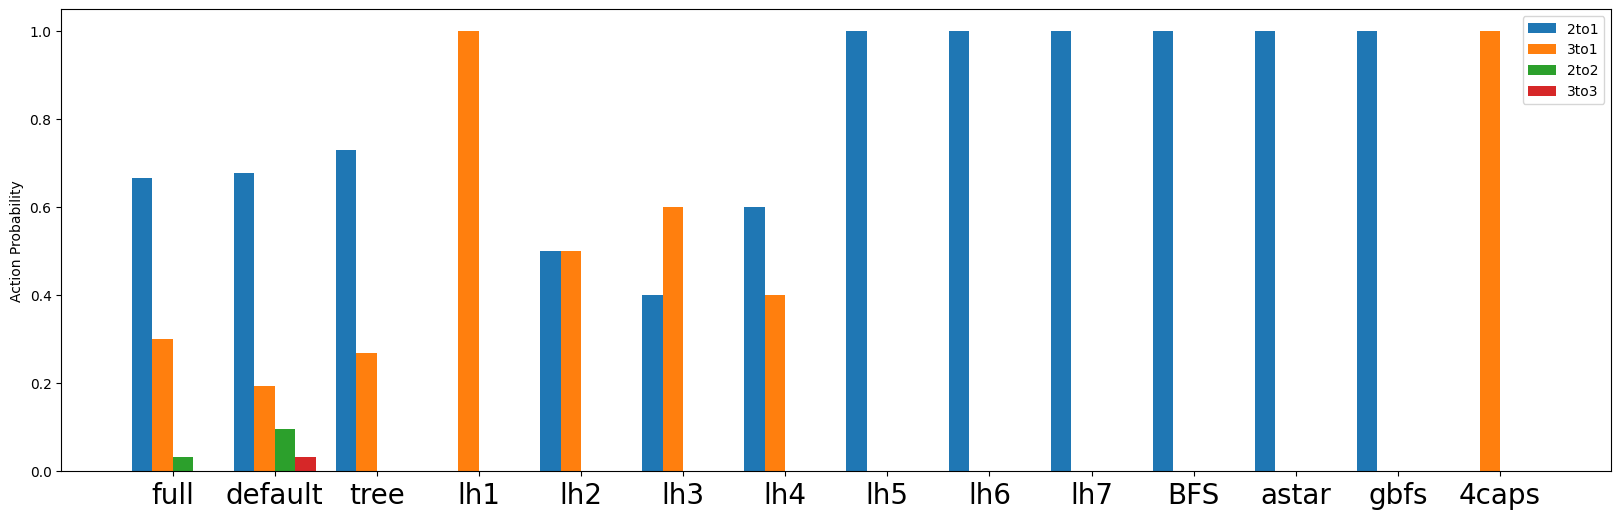

TOL_177
[[3, 0, 0], [2, 0], [1]]
[[0, 0, 0], [3, 1], [2]]


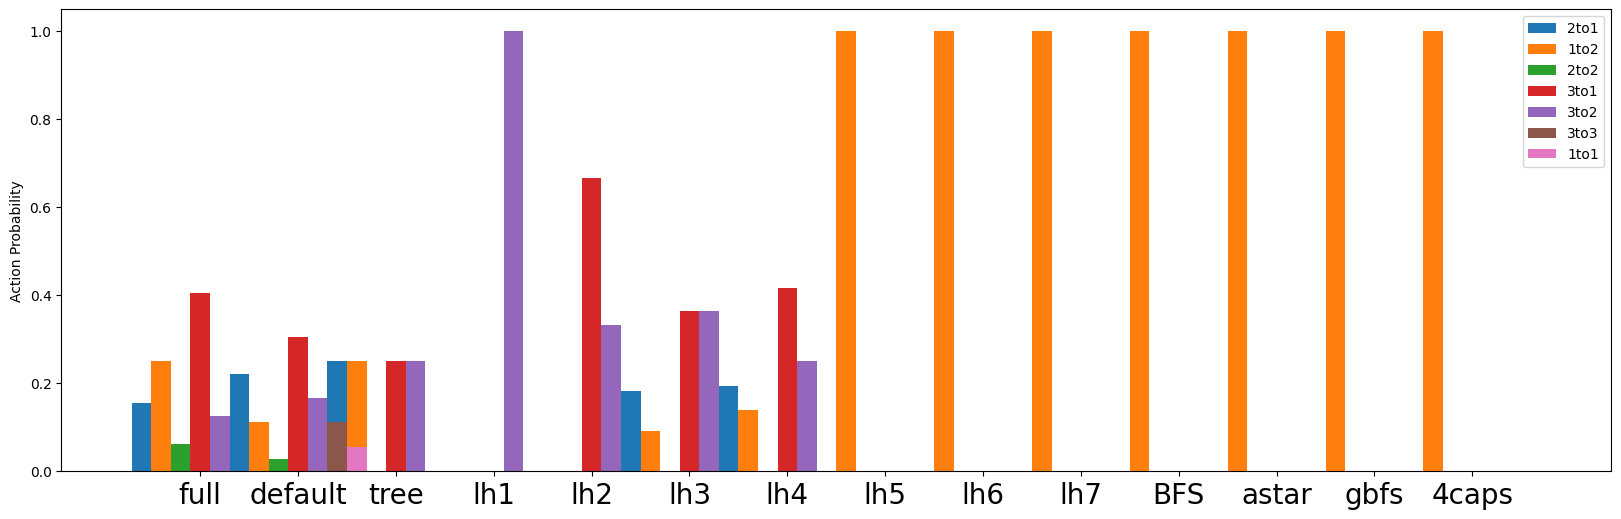

TOL_6
[[1, 2, 3], [0, 0], [0]]
[[2, 3, 0], [1, 0], [0]]


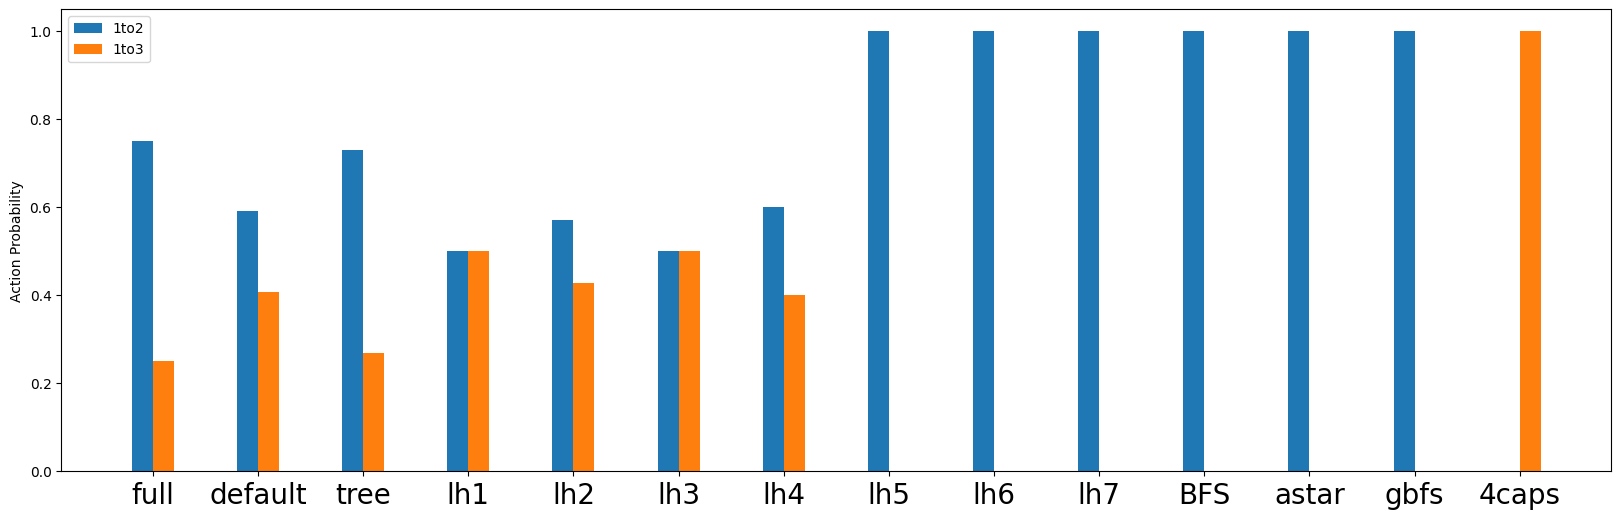

TOL_69
[[2, 3, 0], [1, 0], [0]]
[[0, 0, 0], [3, 1], [2]]


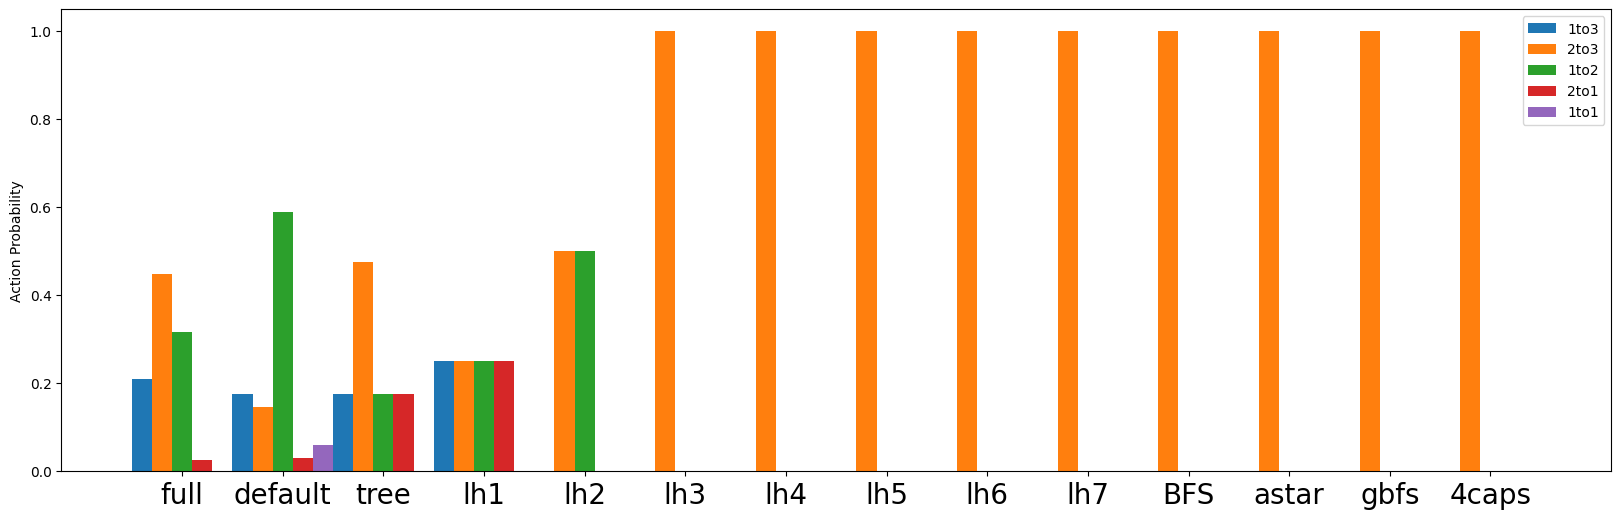

TOL_43
[[2, 3, 0], [1, 0], [0]]
[[3, 2, 0], [1, 0], [0]]


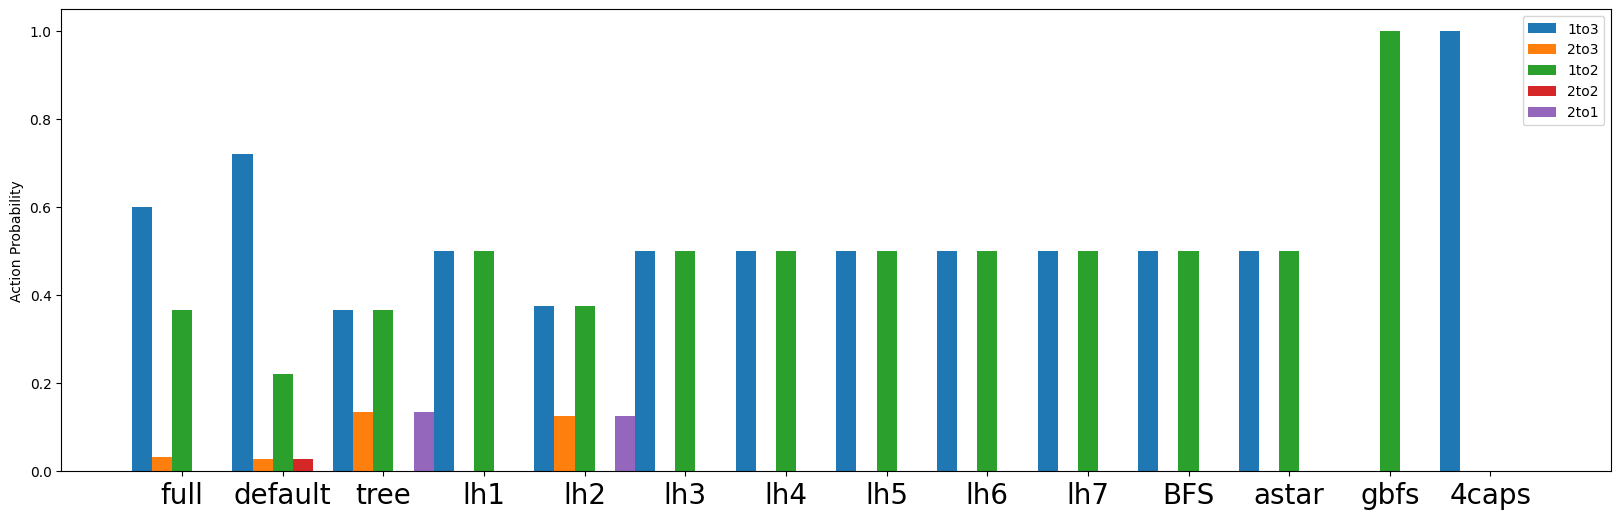

TOL_60
[[2, 3, 0], [1, 0], [0]]
[[3, 0, 0], [2, 0], [1]]


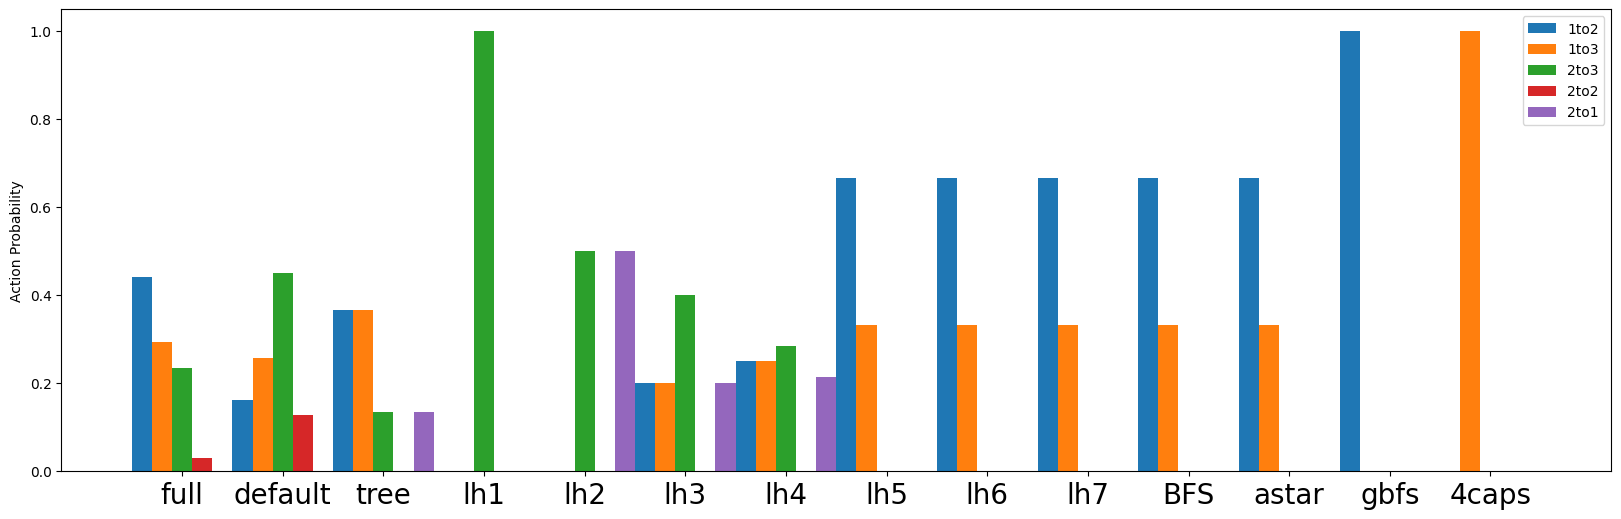

TOL_105
[[3, 0, 0], [1, 2], [0]]
[[0, 0, 0], [3, 1], [2]]


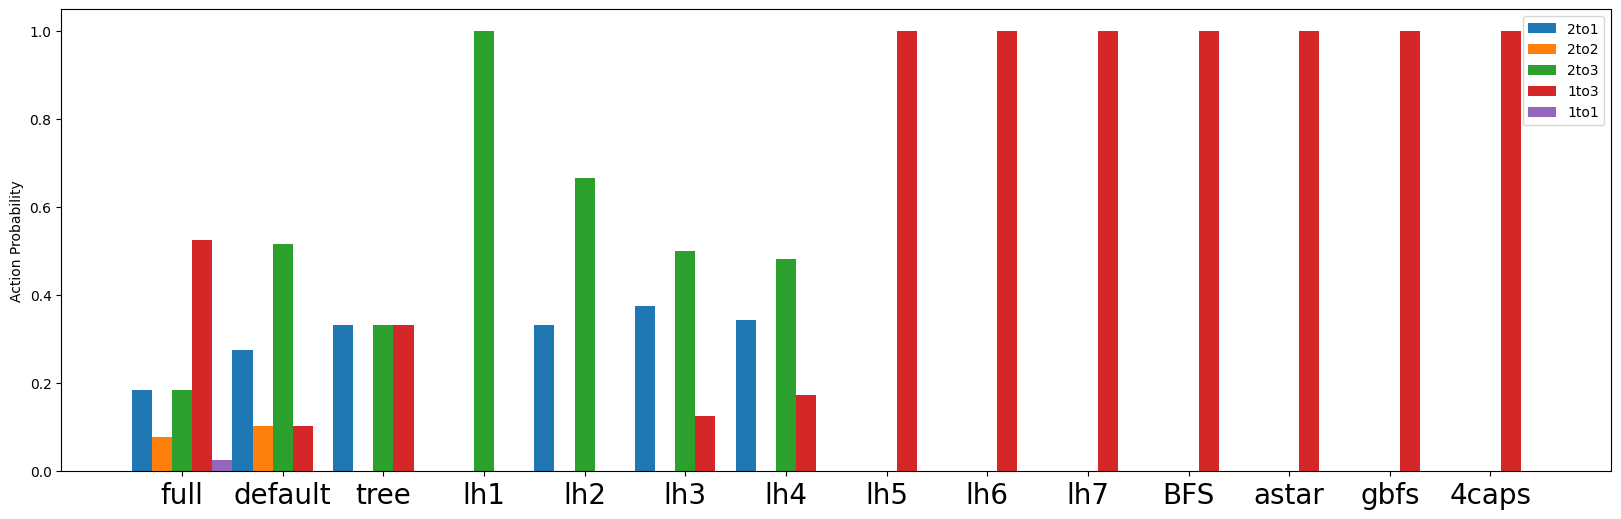

TOL_57
[[2, 3, 0], [1, 0], [0]]
[[3, 1, 0], [0, 0], [2]]


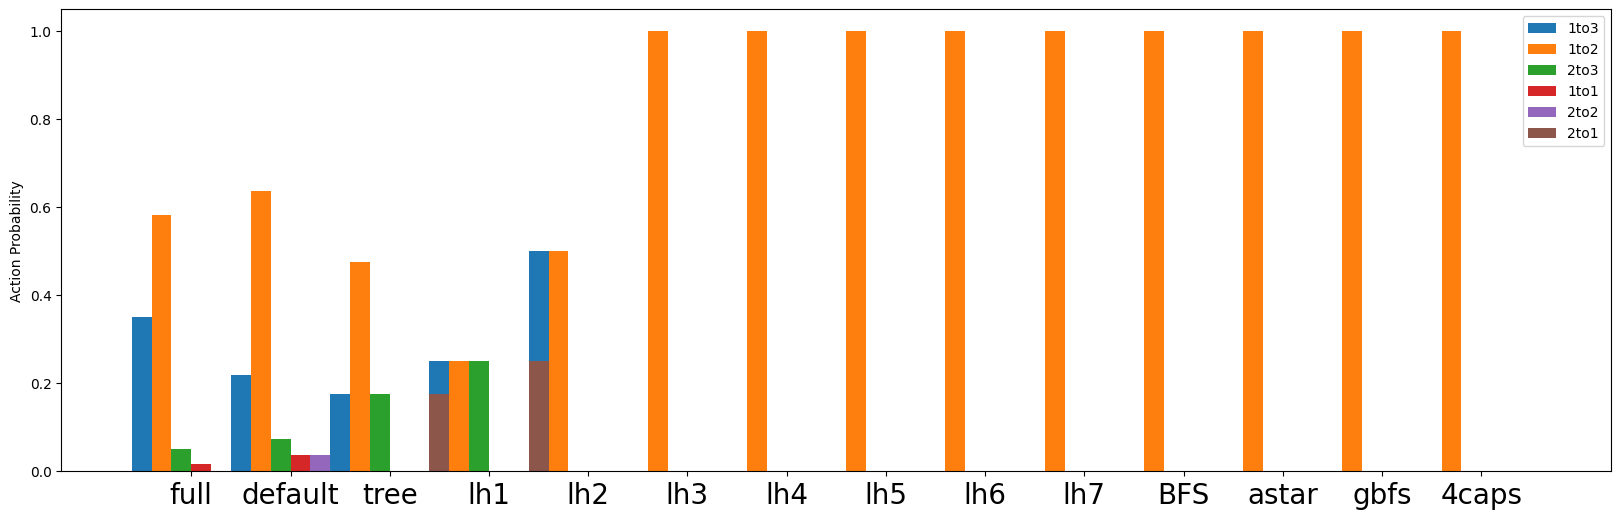

TOL_117
[[2, 3, 0], [0, 0], [1]]
[[3, 1, 0], [2, 0], [0]]


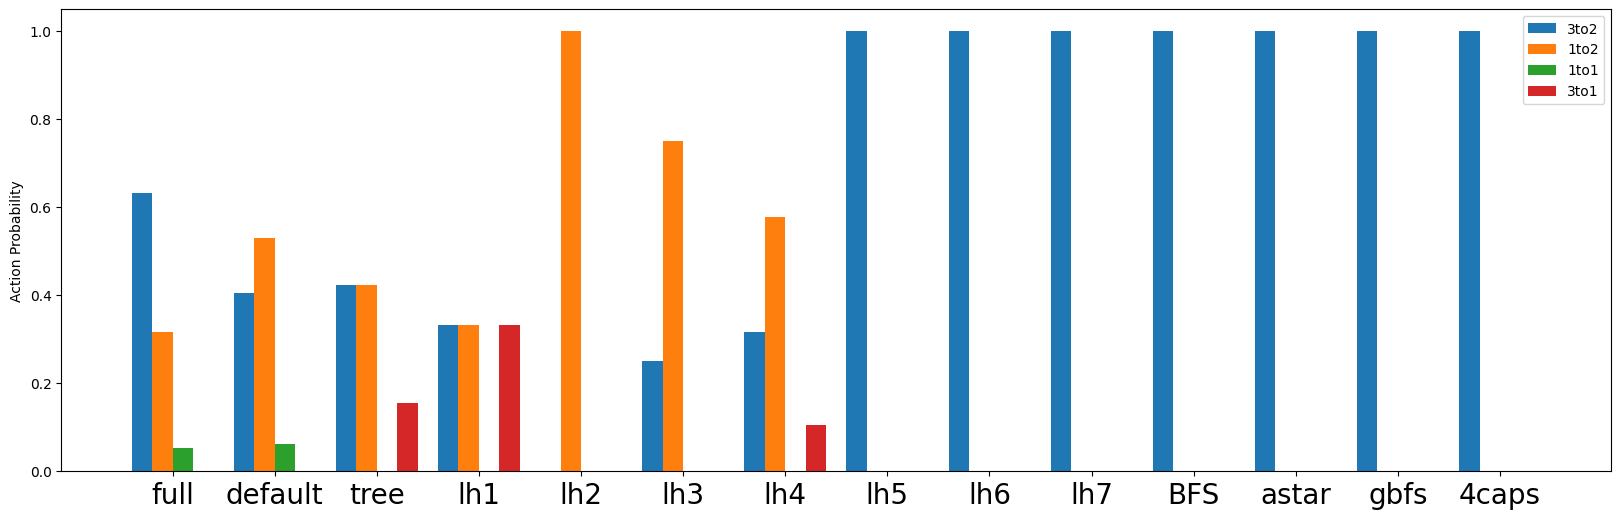

TOL_115
[[2, 3, 0], [0, 0], [1]]
[[3, 2, 0], [1, 0], [0]]


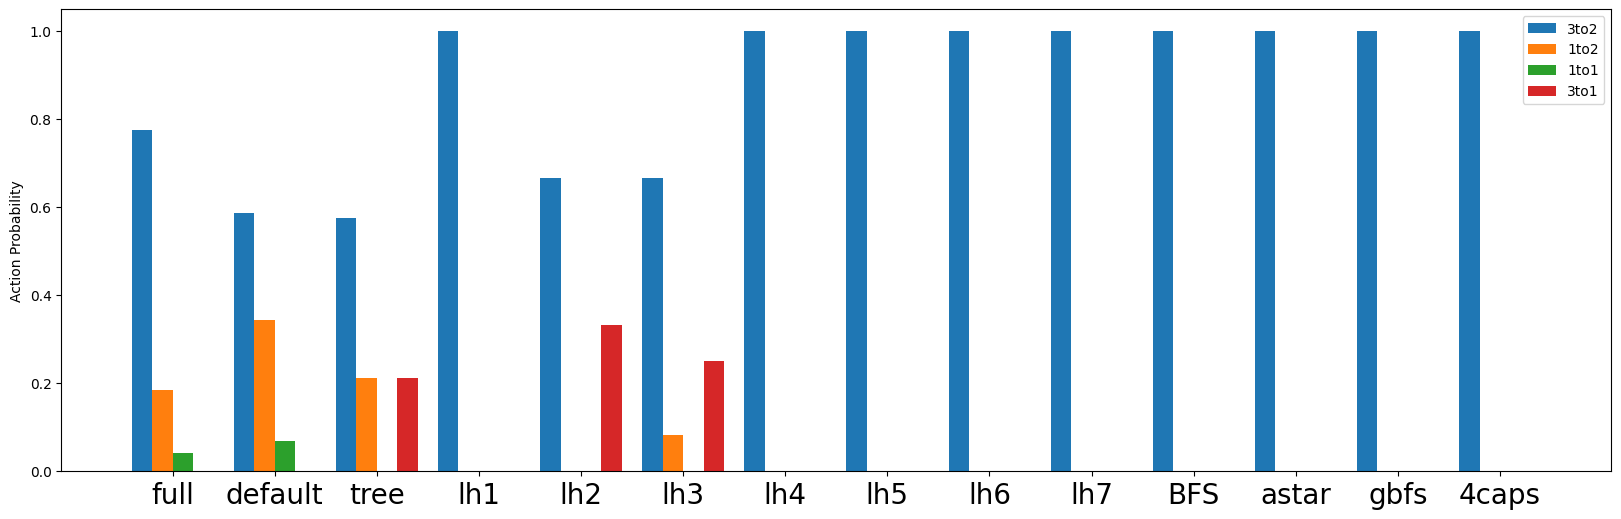

TOL_37
[[2, 3, 0], [1, 0], [0]]
[[1, 3, 2], [0, 0], [0]]


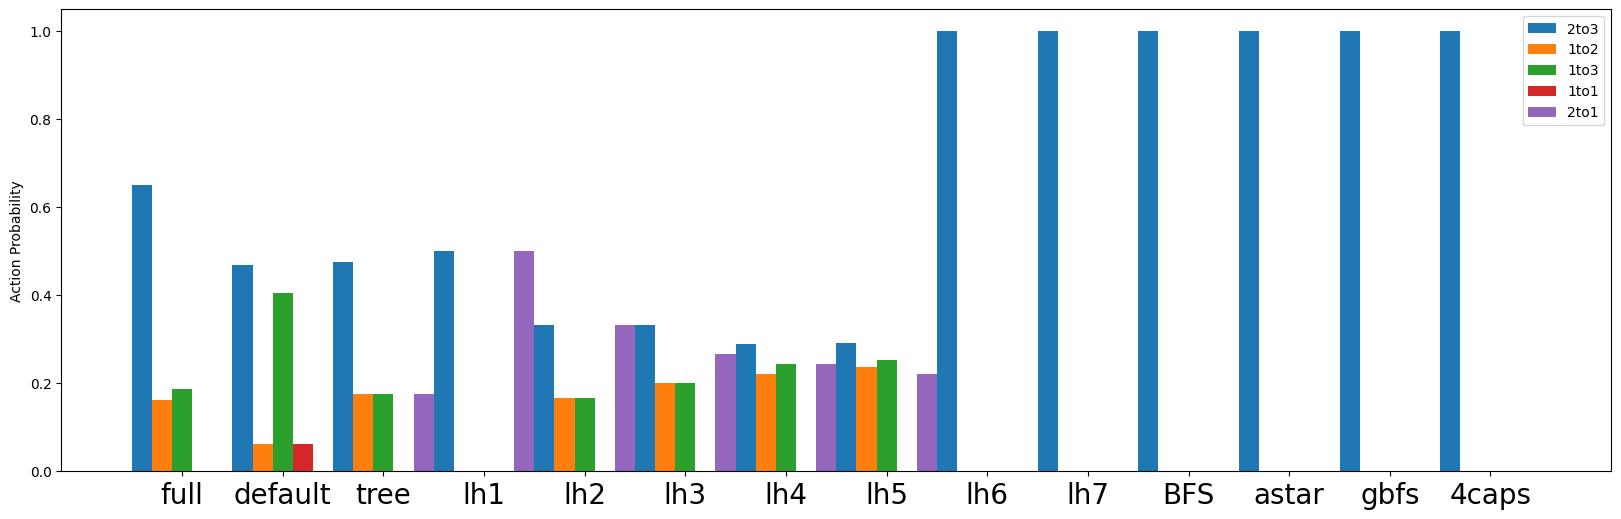

TOL_90
[[3, 0, 0], [1, 2], [0]]
[[2, 3, 0], [0, 0], [1]]


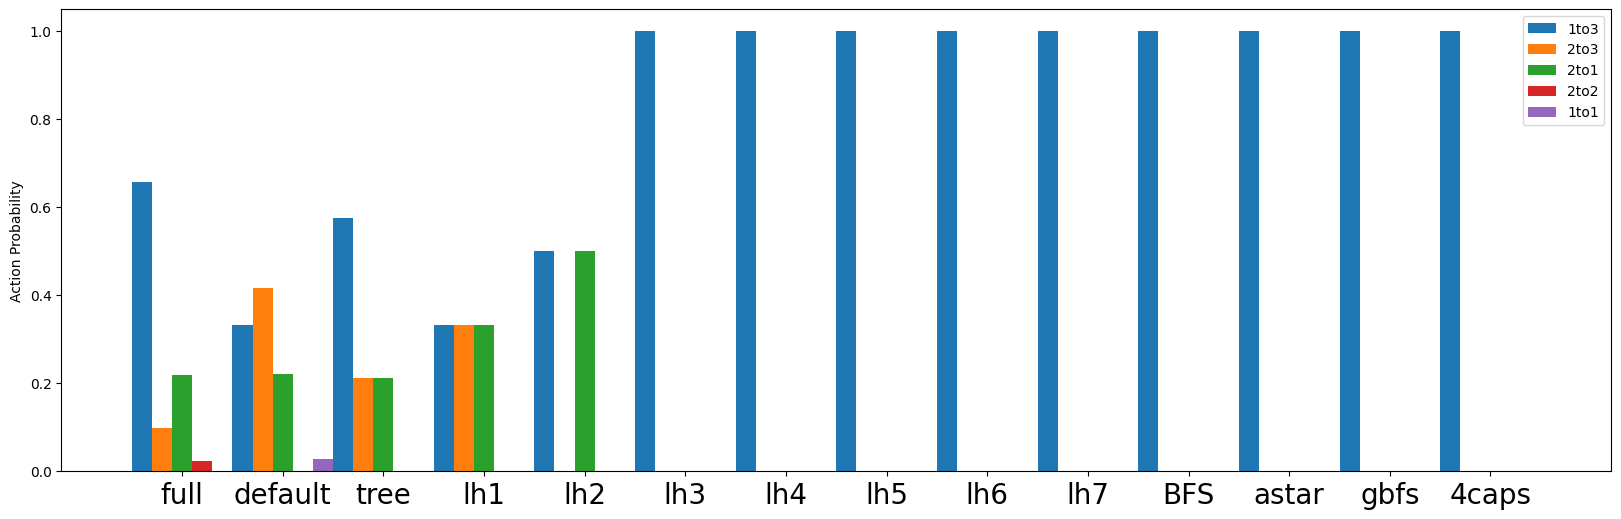

TOL_208
[[0, 0, 0], [2, 3], [1]]
[[2, 0, 0], [1, 0], [3]]


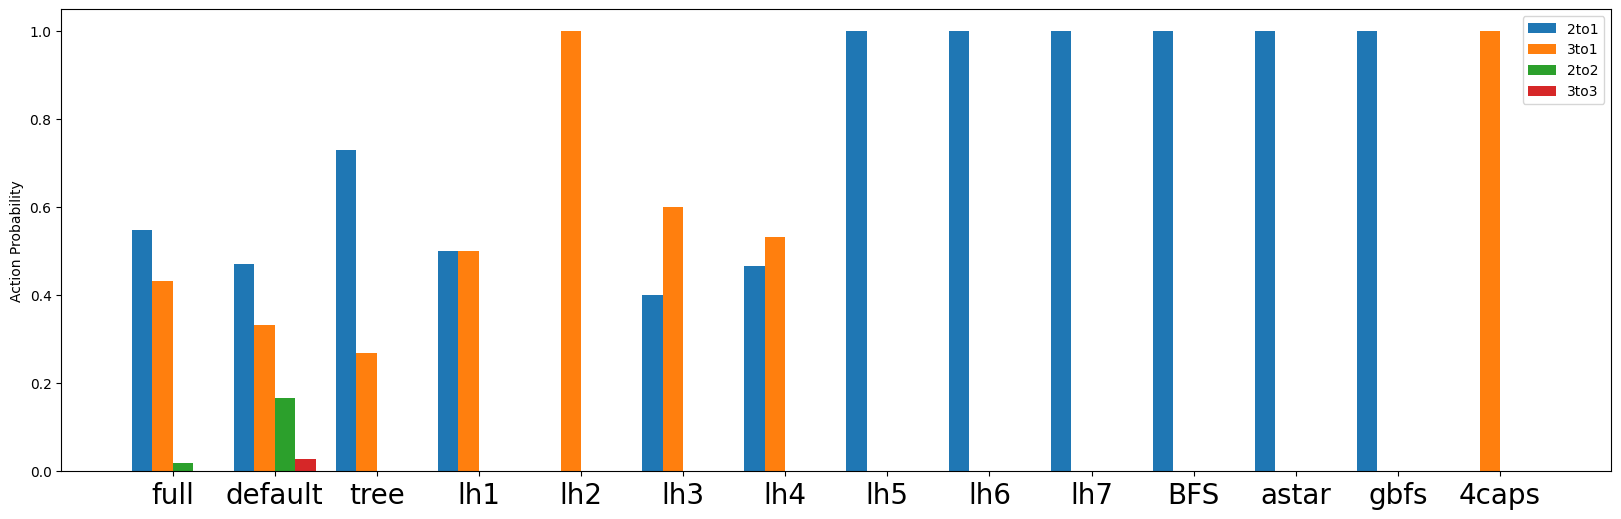

TOL_145
[[3, 0, 0], [2, 0], [1]]
[[1, 3, 2], [0, 0], [0]]


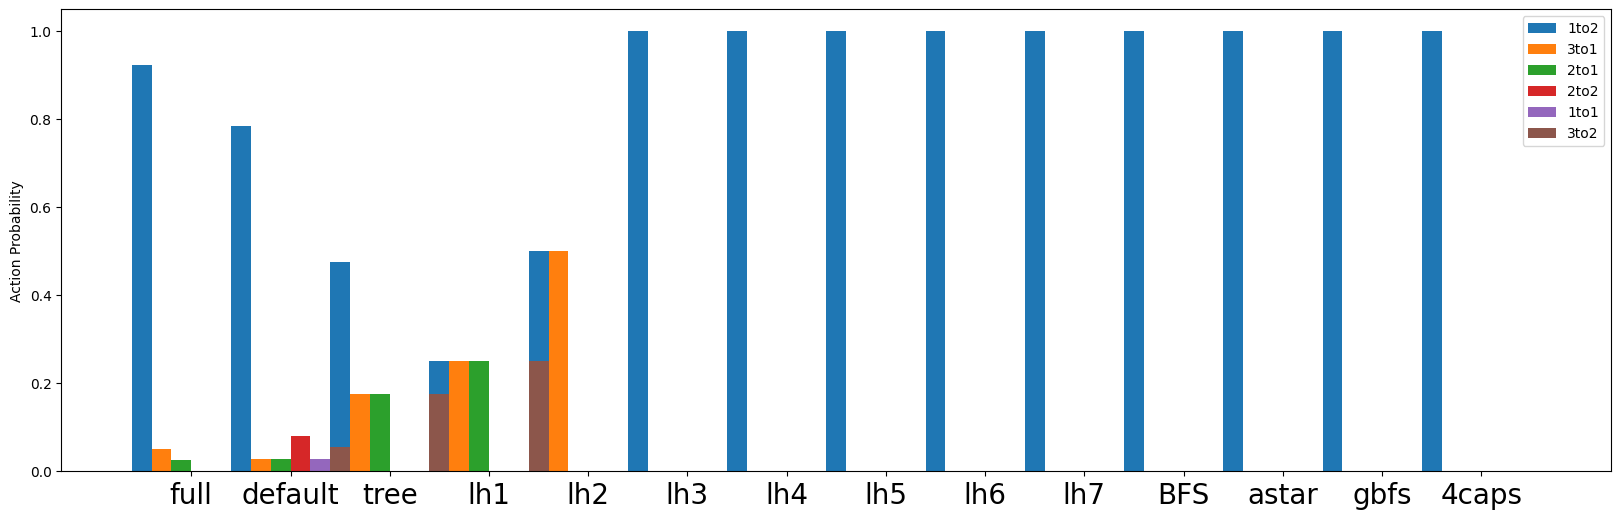

TOL_7
[[1, 2, 3], [0, 0], [0]]
[[3, 2, 0], [1, 0], [0]]


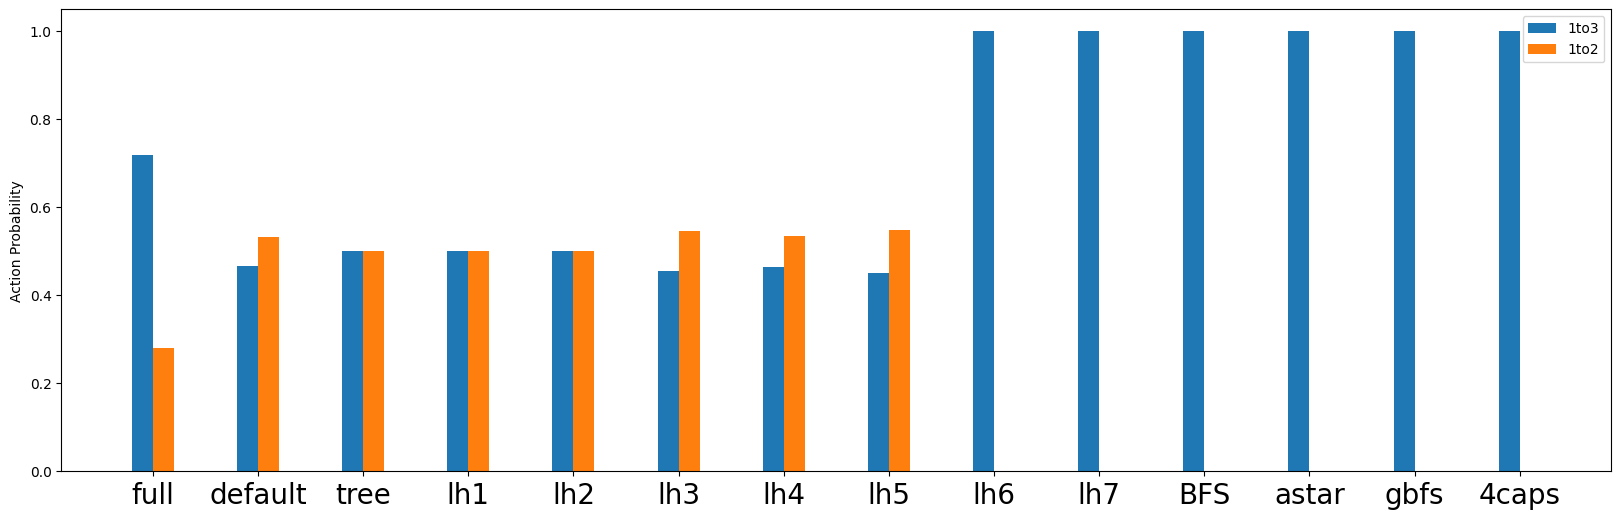

TOL_172
[[3, 0, 0], [2, 0], [1]]
[[2, 0, 0], [1, 0], [3]]


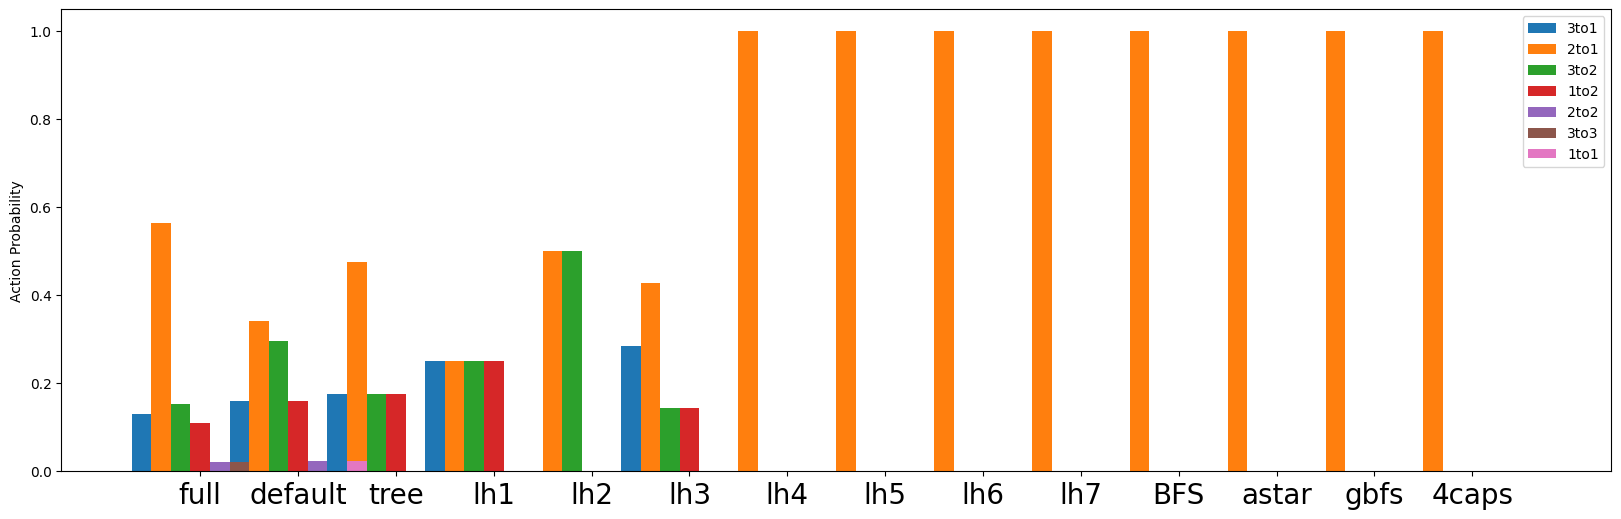

TOL_109
[[2, 3, 0], [0, 0], [1]]
[[1, 3, 2], [0, 0], [0]]


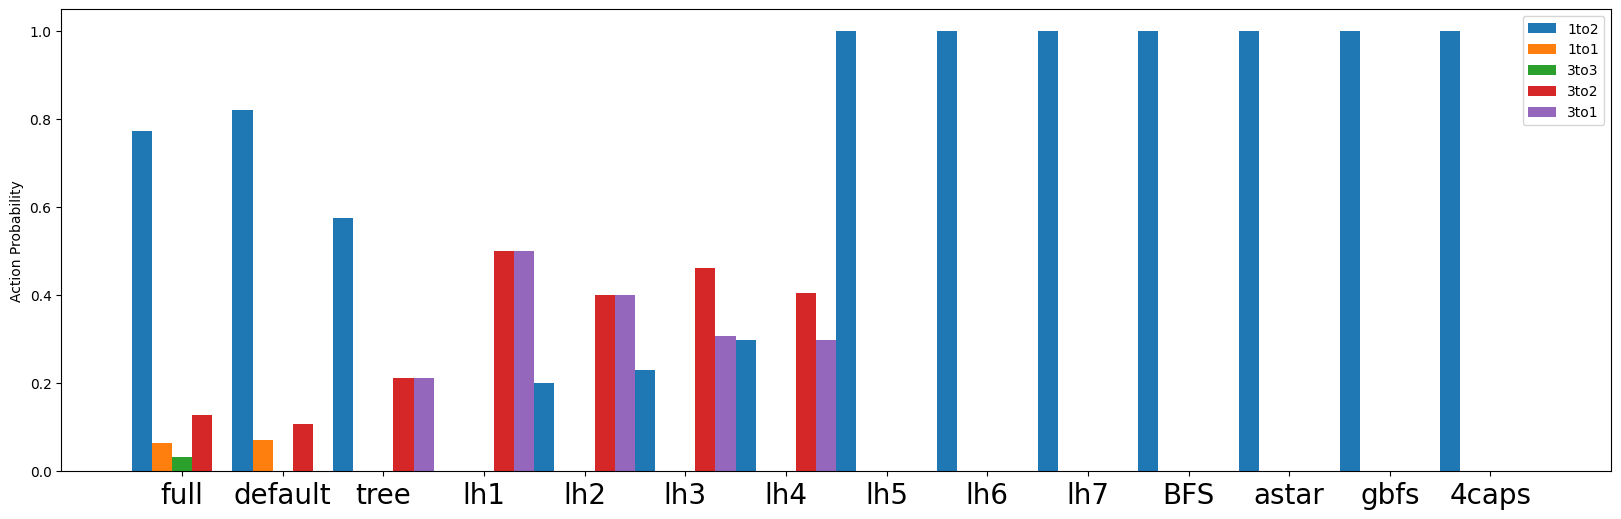

TOL_16
[[1, 2, 3], [0, 0], [0]]
[[2, 0, 0], [3, 1], [0]]


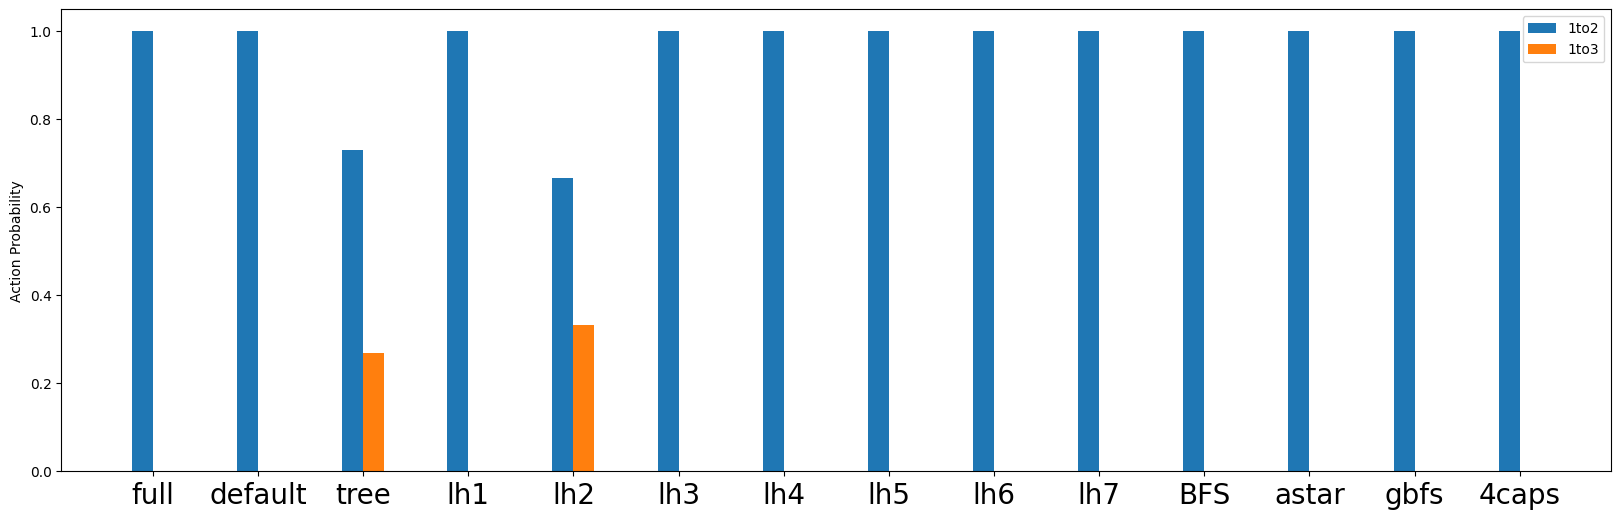

TOL_144
[[3, 0, 0], [2, 0], [1]]
[[1, 2, 3], [0, 0], [0]]


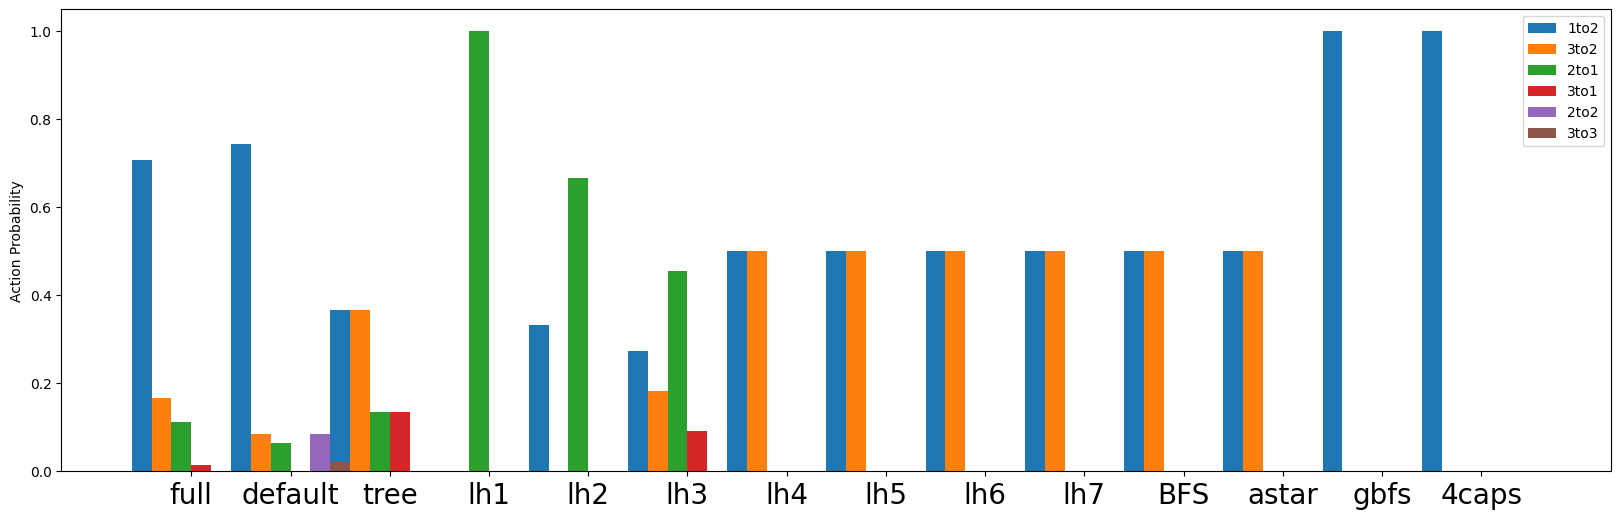

TOL_157
[[3, 0, 0], [2, 0], [1]]
[[2, 0, 0], [1, 3], [0]]


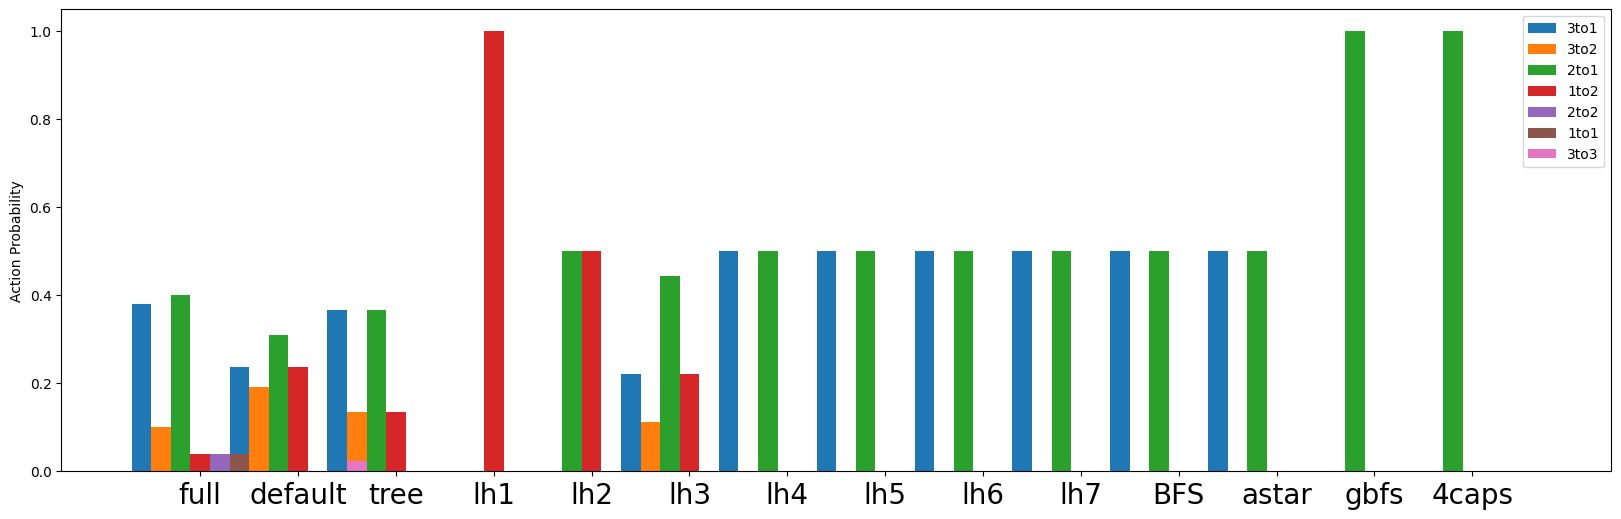

TOL_128
[[2, 3, 0], [0, 0], [1]]
[[1, 3, 0], [0, 0], [2]]


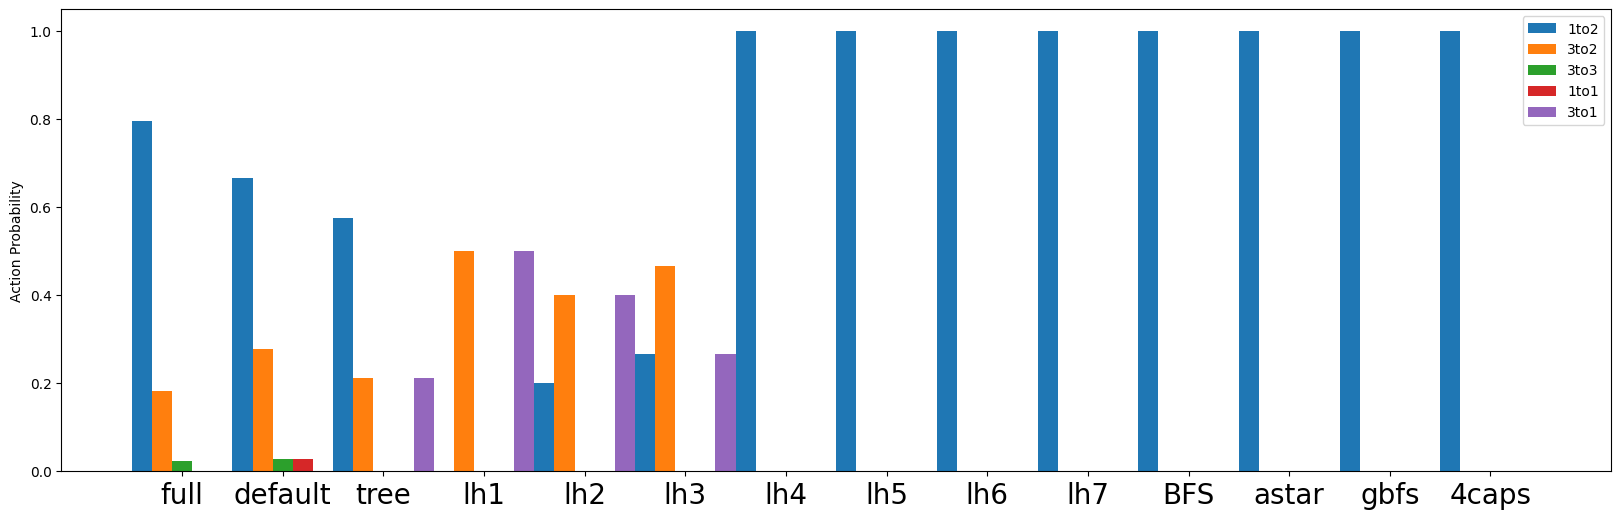

TOL_92
[[3, 0, 0], [1, 2], [0]]
[[1, 3, 0], [0, 0], [2]]


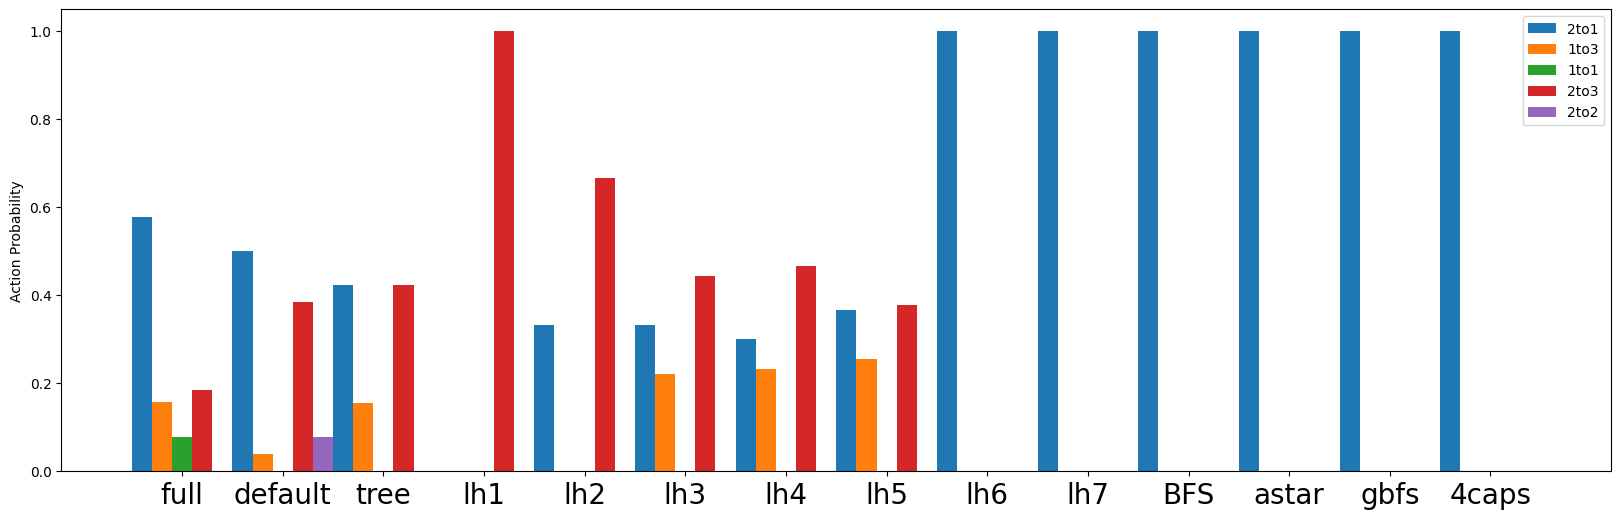

TOL_50
[[2, 3, 0], [1, 0], [0]]
[[3, 0, 0], [2, 1], [0]]


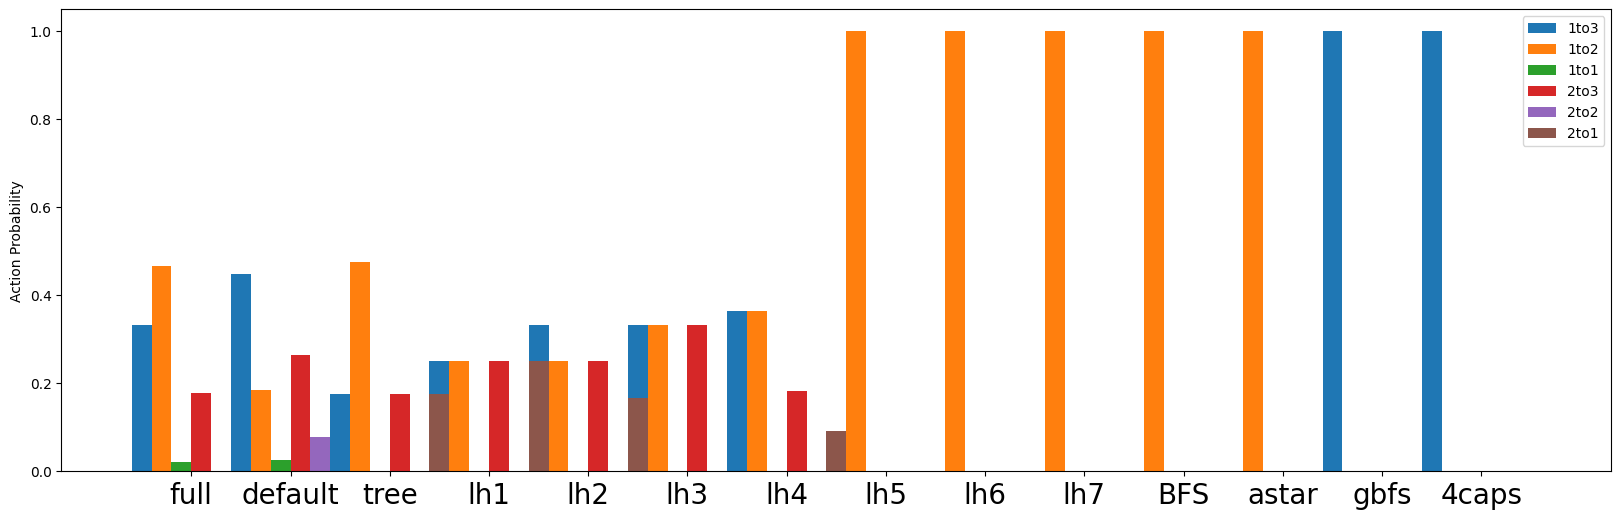

TOL_155
[[3, 0, 0], [2, 0], [1]]
[[2, 1, 0], [3, 0], [0]]


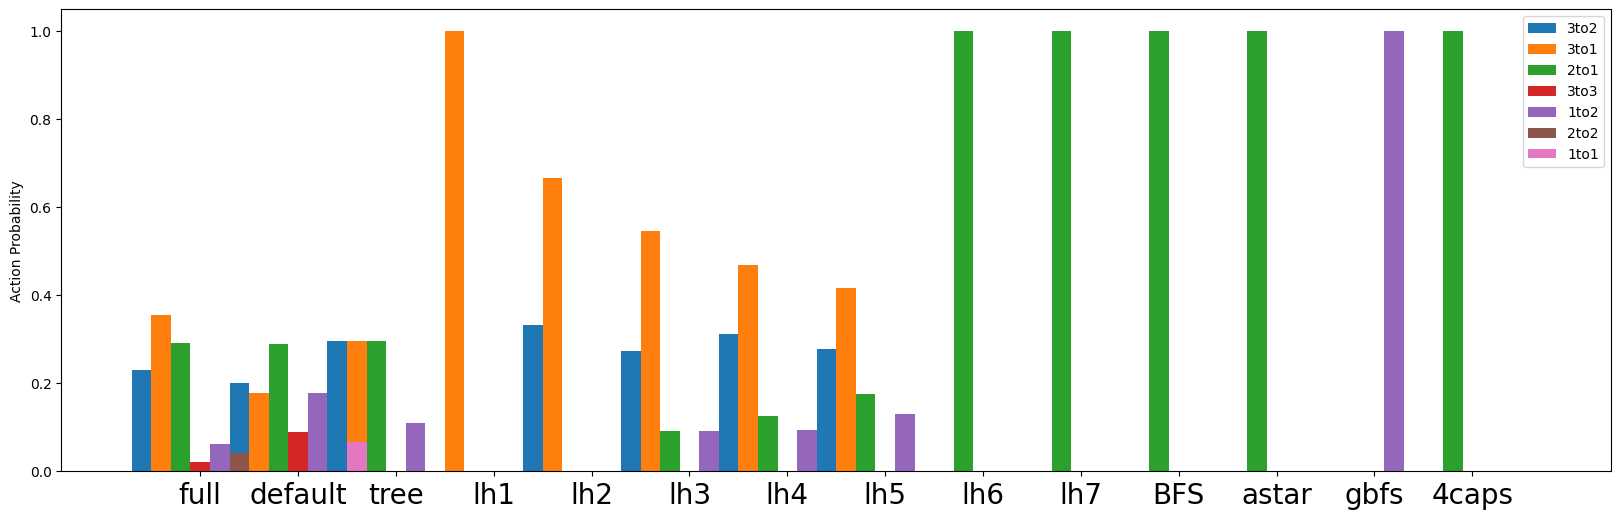

TOL_212
[[0, 0, 0], [2, 3], [1]]
[[0, 0, 0], [1, 3], [2]]


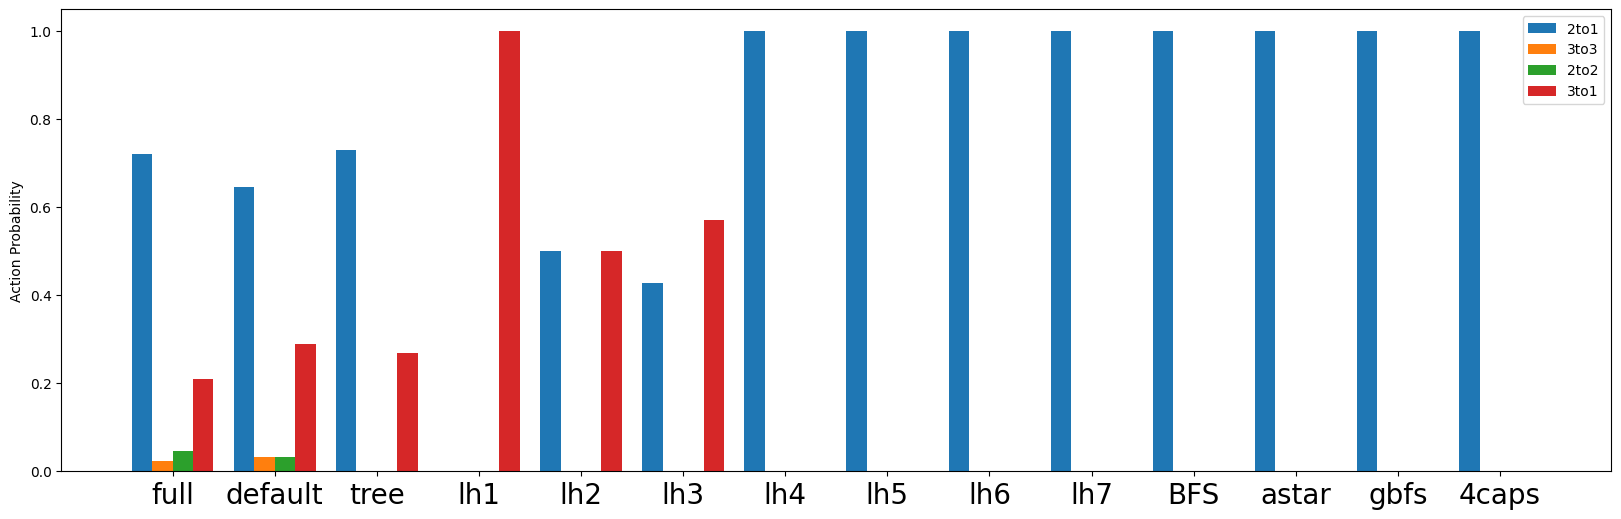

TOL_162
[[3, 0, 0], [2, 0], [1]]
[[2, 3, 0], [0, 0], [1]]


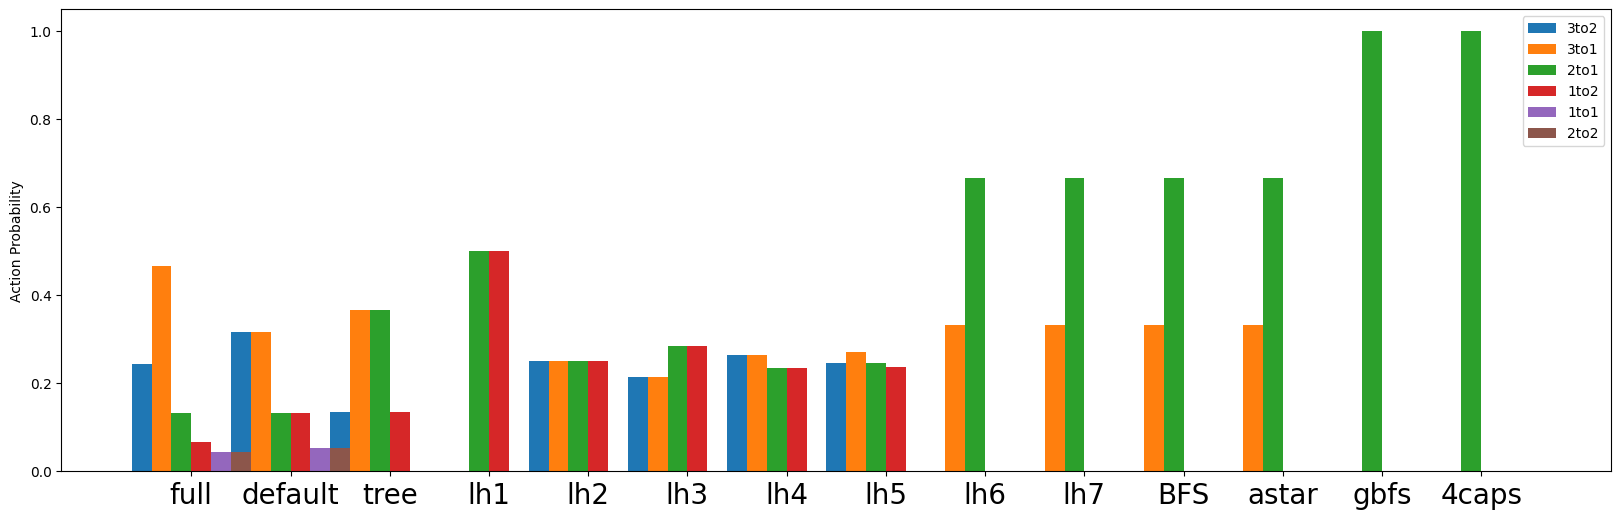

TOL_65
[[2, 3, 0], [1, 0], [0]]
[[1, 0, 0], [2, 0], [3]]


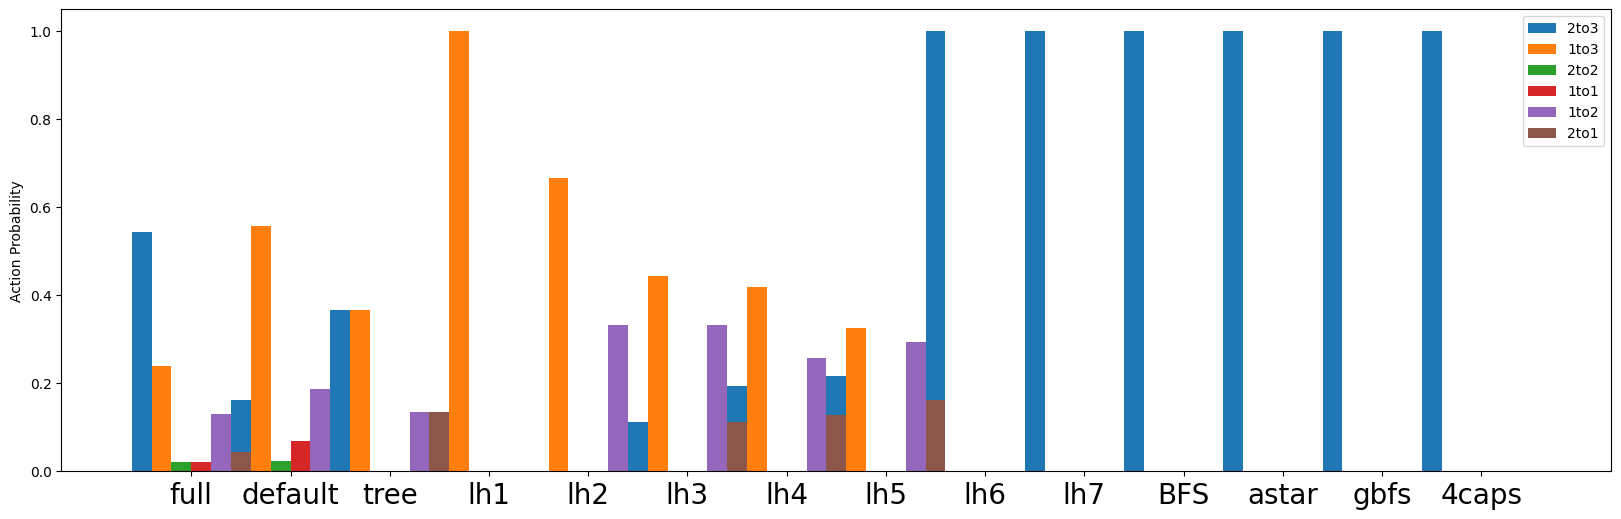

TOL_130
[[2, 3, 0], [0, 0], [1]]
[[1, 2, 0], [0, 0], [3]]


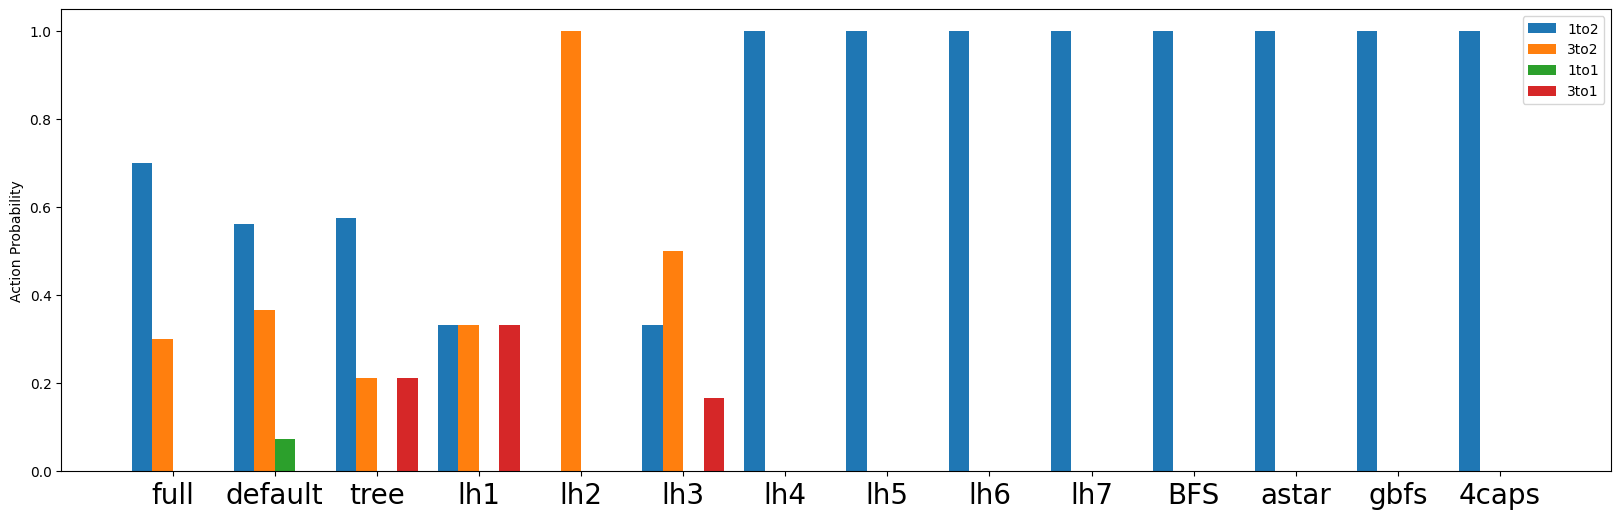

TOL_97
[[3, 0, 0], [1, 2], [0]]
[[2, 0, 0], [3, 0], [1]]


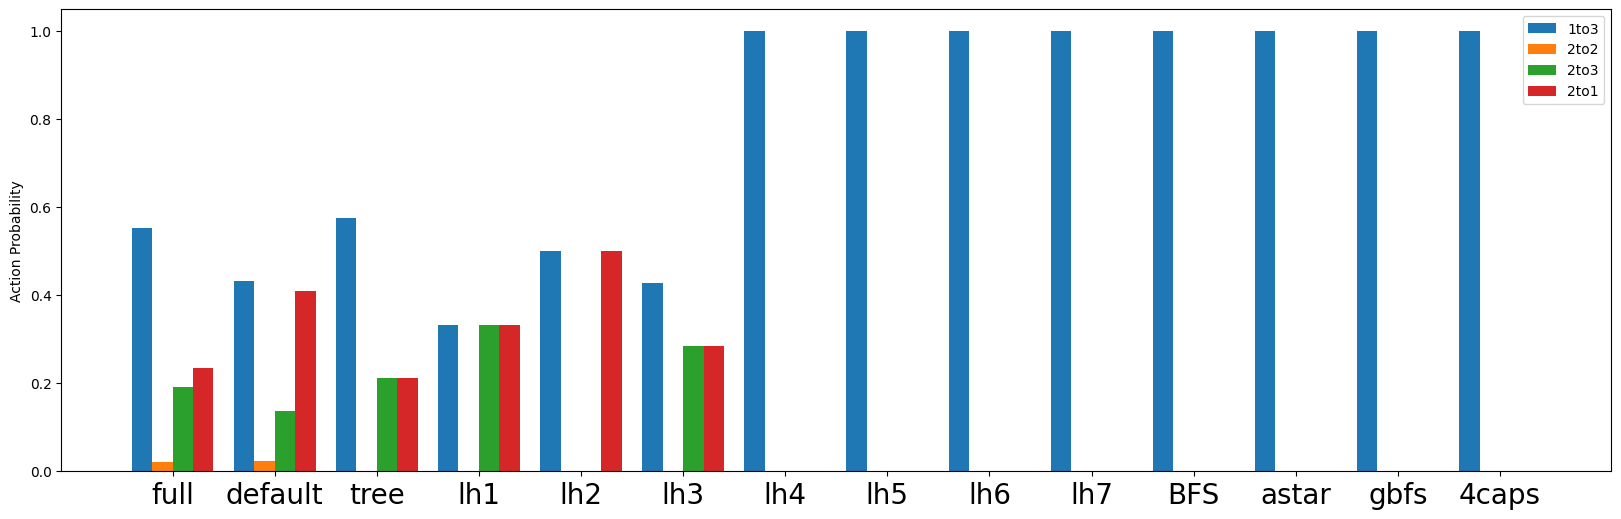

TOL_30
[[1, 2, 3], [0, 0], [0]]
[[0, 0, 0], [2, 3], [1]]


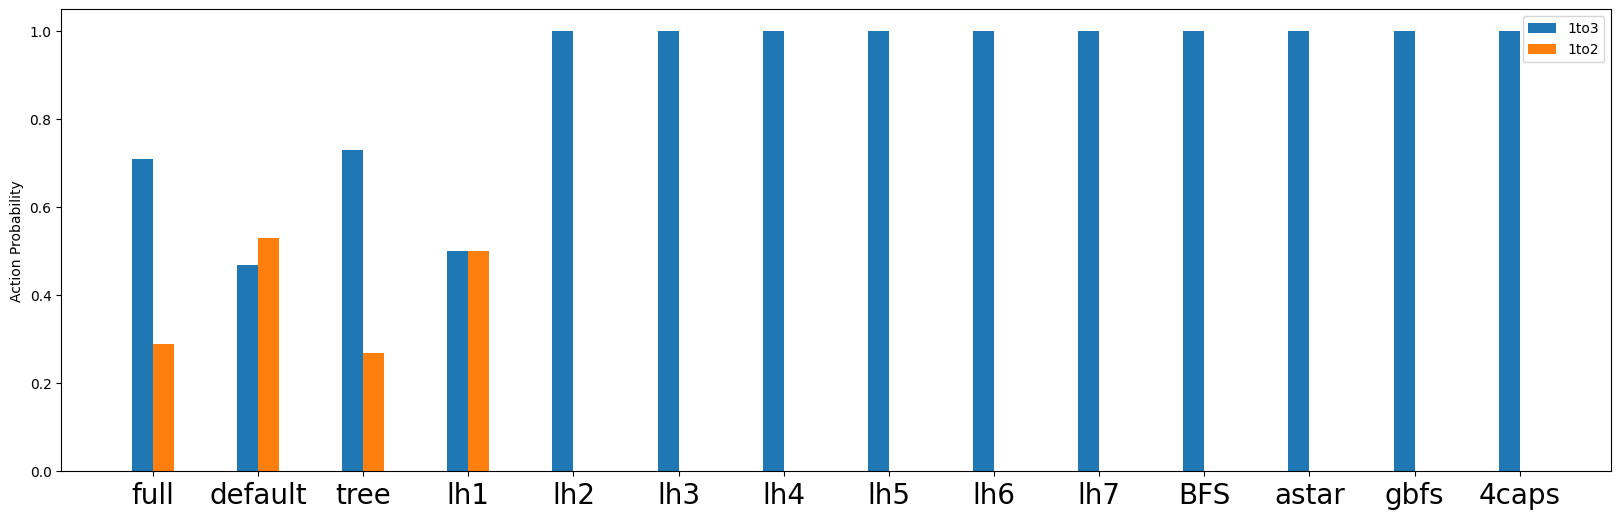

TOL_154
[[3, 0, 0], [2, 0], [1]]
[[1, 2, 0], [3, 0], [0]]


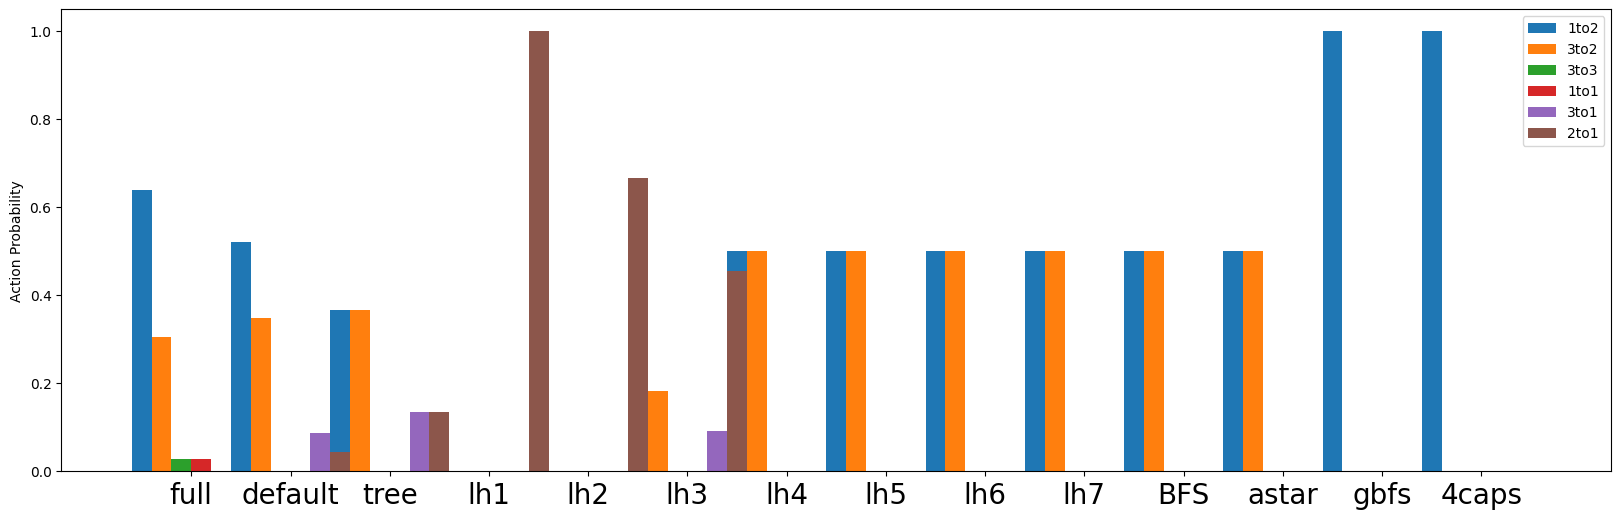

TOL_21
[[1, 2, 3], [0, 0], [0]]
[[3, 1, 0], [0, 0], [2]]


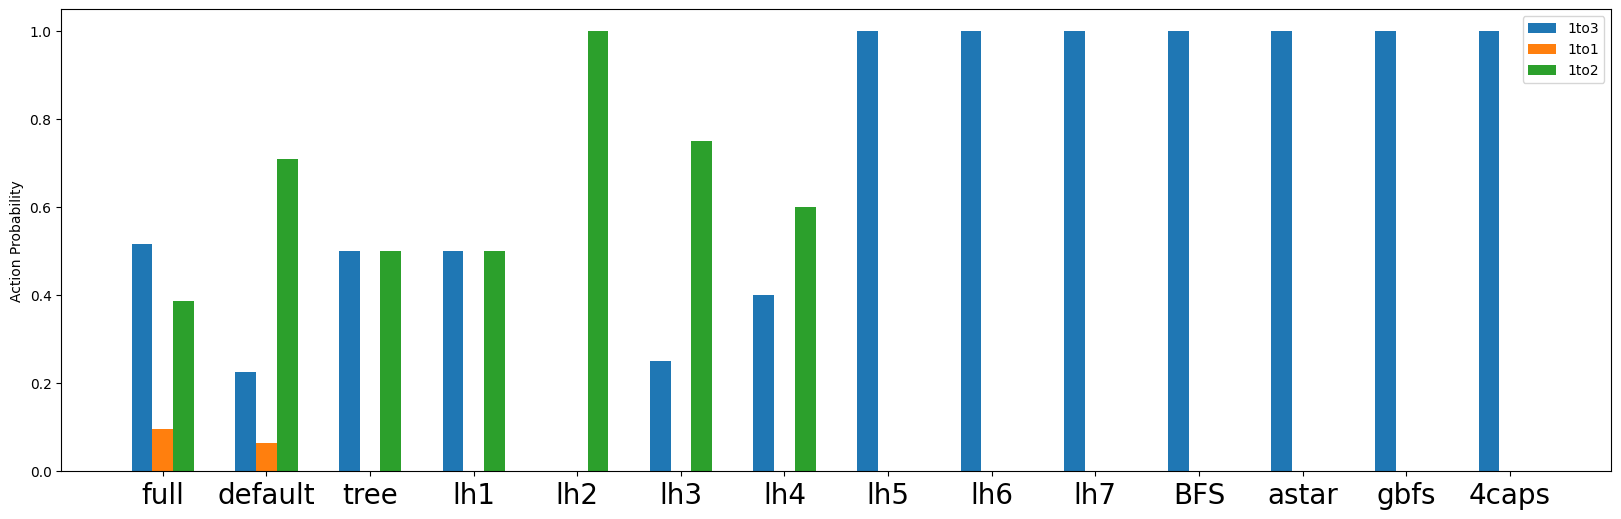

TOL_164
[[3, 0, 0], [2, 0], [1]]
[[1, 3, 0], [0, 0], [2]]


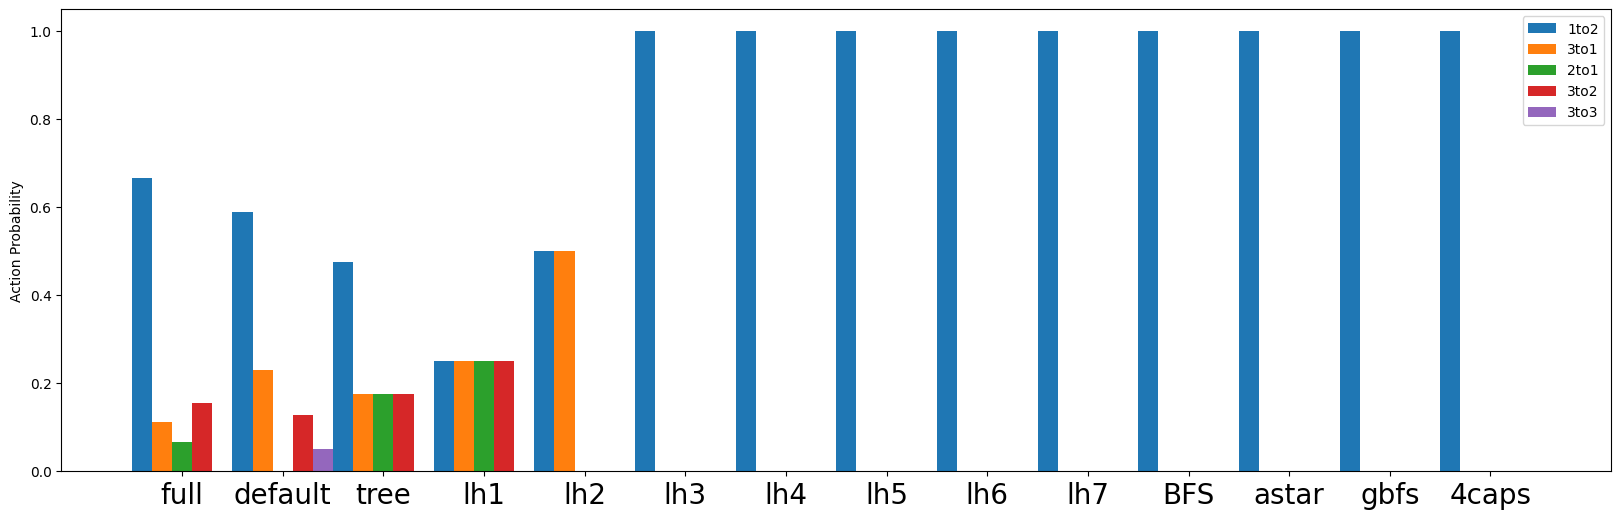

TOL_166
[[3, 0, 0], [2, 0], [1]]
[[1, 2, 0], [0, 0], [3]]


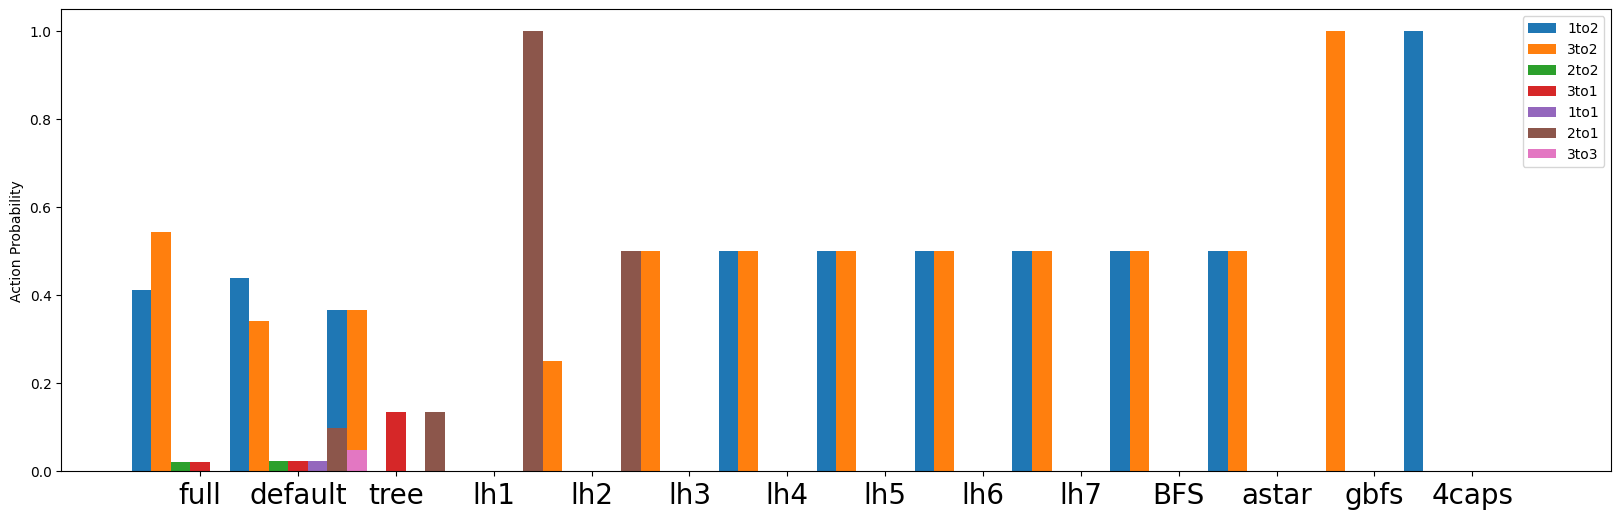

TOL_18
[[1, 2, 3], [0, 0], [0]]
[[2, 3, 0], [0, 0], [1]]


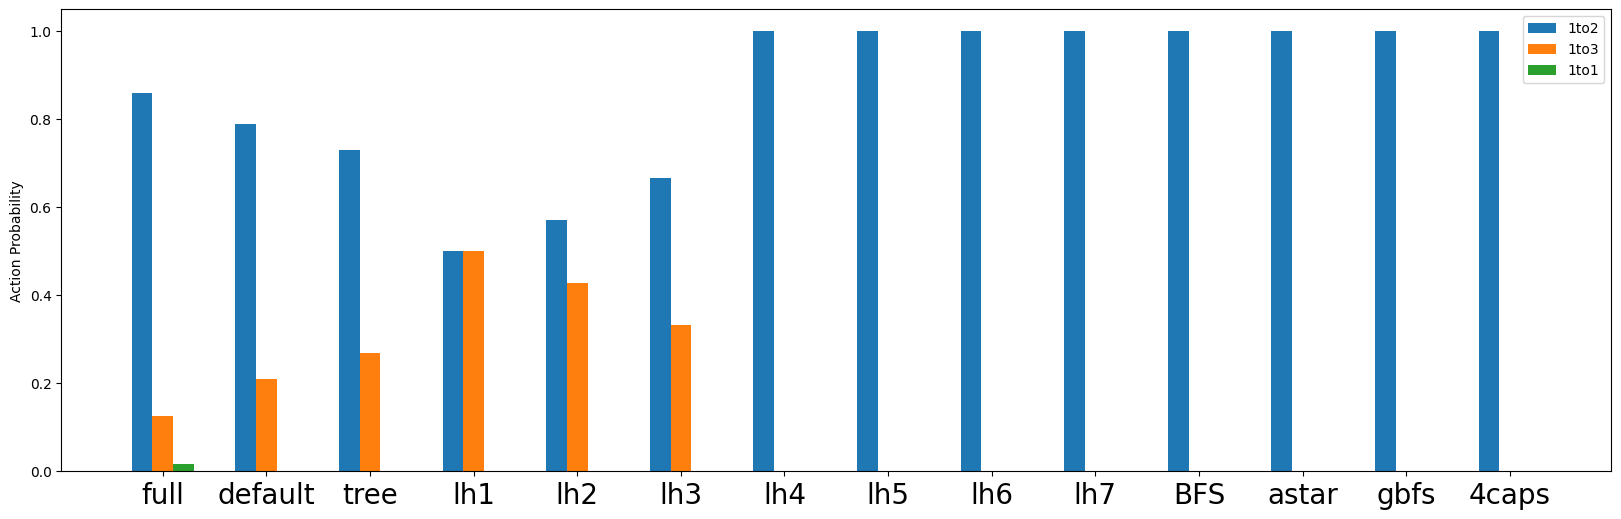

TOL_101
[[3, 0, 0], [1, 2], [0]]
[[1, 0, 0], [2, 0], [3]]


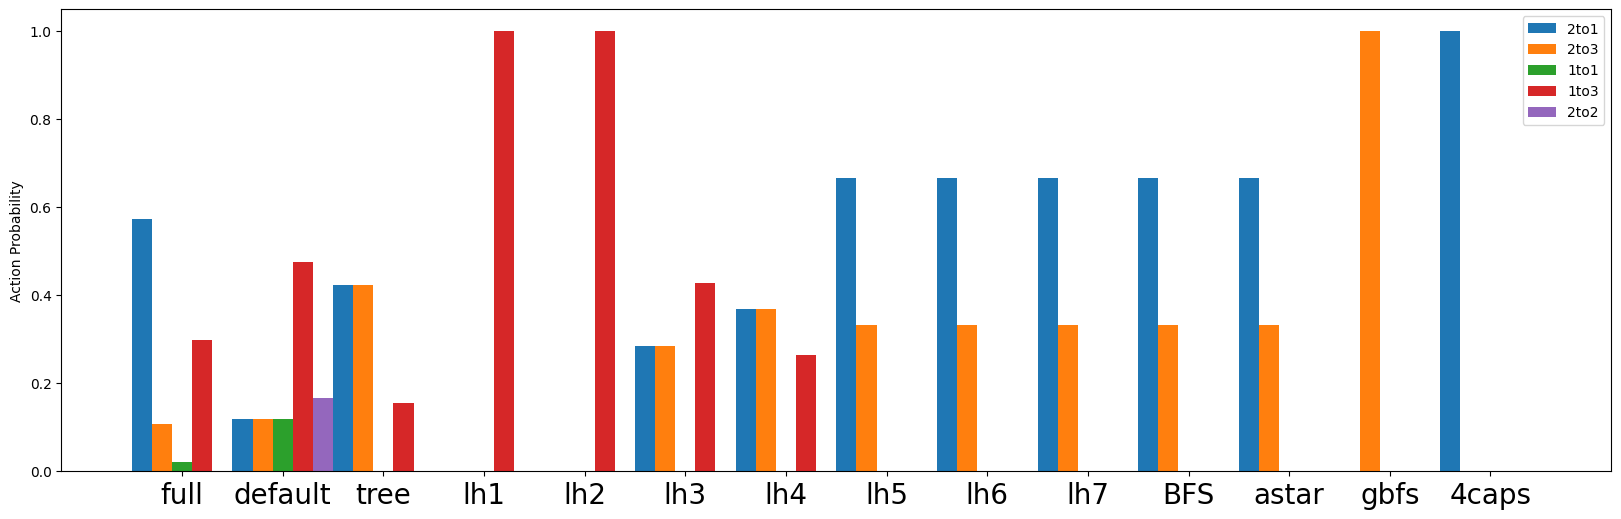

TOL_11
[[1, 2, 3], [0, 0], [0]]
[[2, 1, 0], [3, 0], [0]]


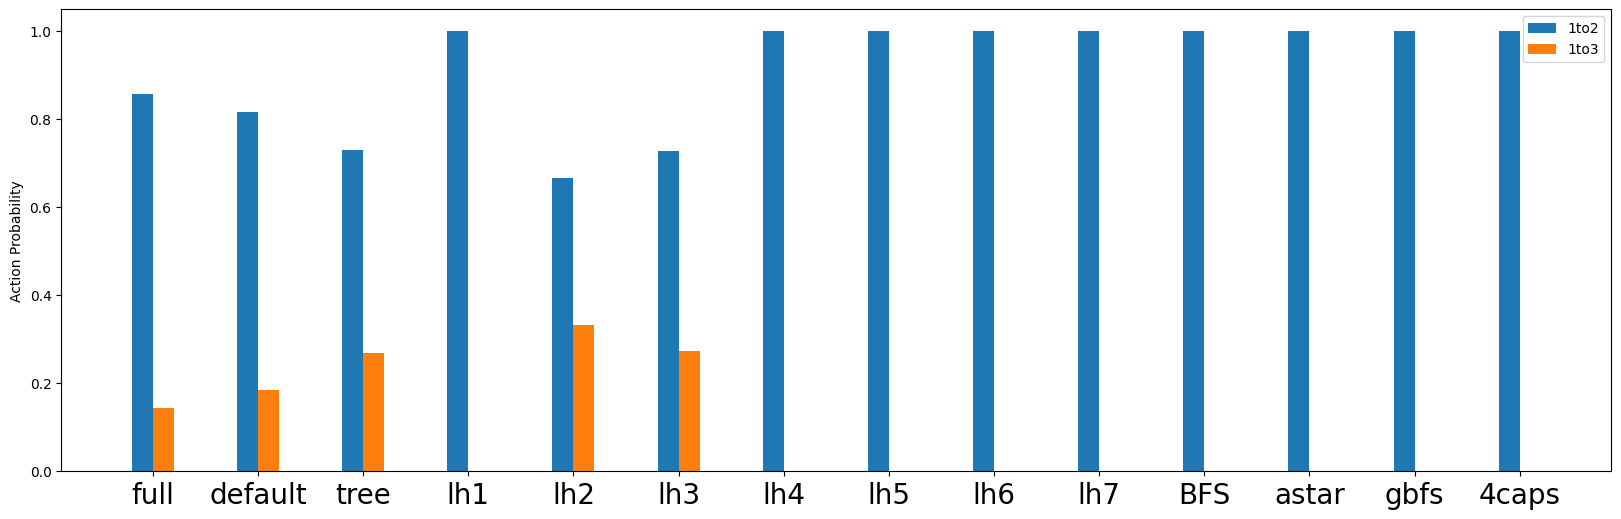

TOL_99
[[3, 0, 0], [1, 2], [0]]
[[1, 0, 0], [3, 0], [2]]


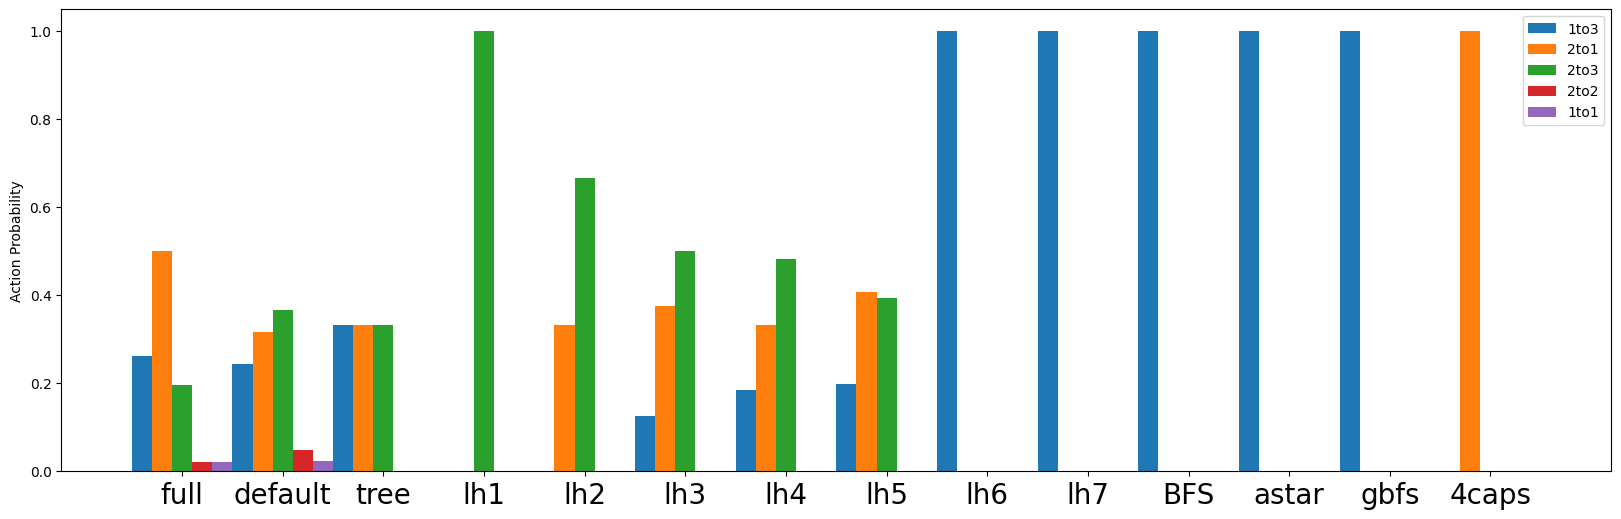

TOL_40
[[2, 3, 0], [1, 0], [0]]
[[3, 1, 2], [0, 0], [0]]


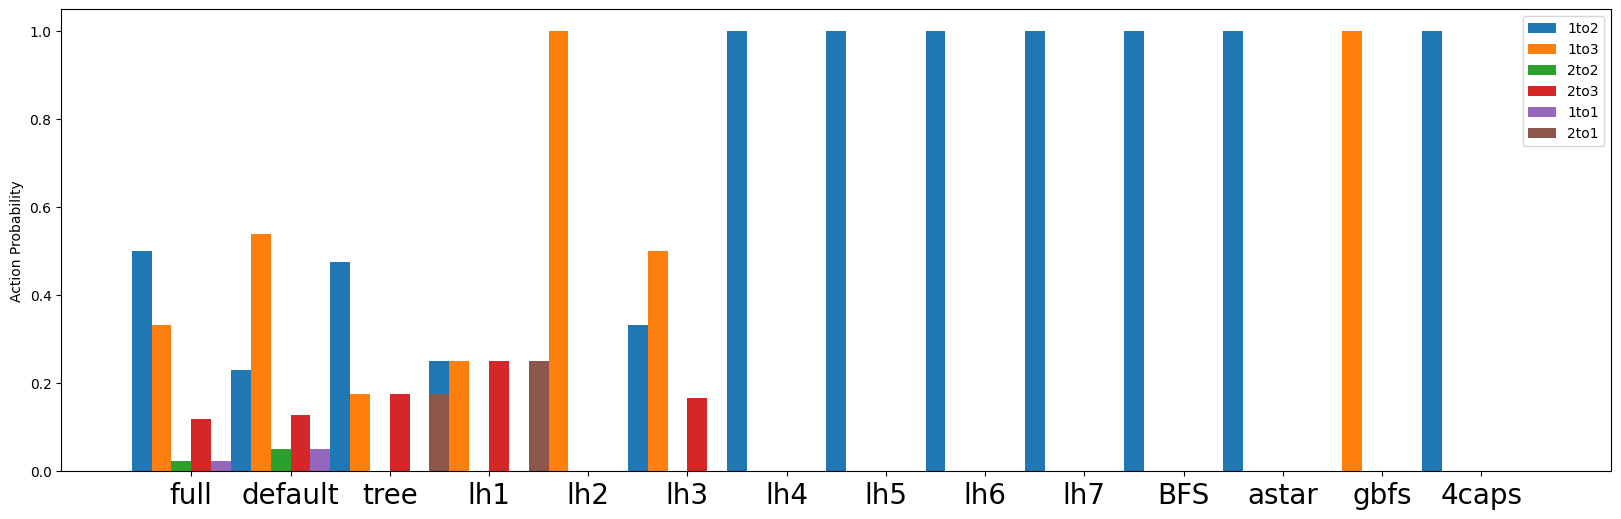

TOL_203
[[0, 0, 0], [2, 3], [1]]
[[2, 1, 0], [0, 0], [3]]


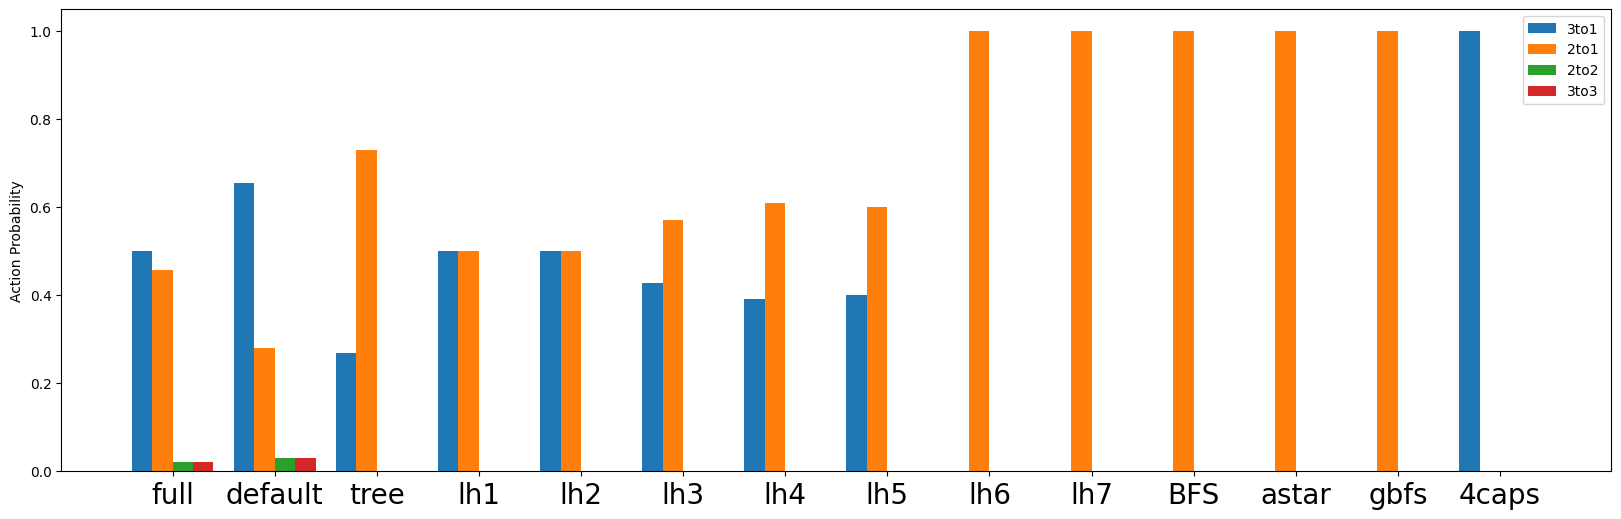

TOL_88
[[3, 0, 0], [1, 2], [0]]
[[2, 0, 0], [3, 1], [0]]


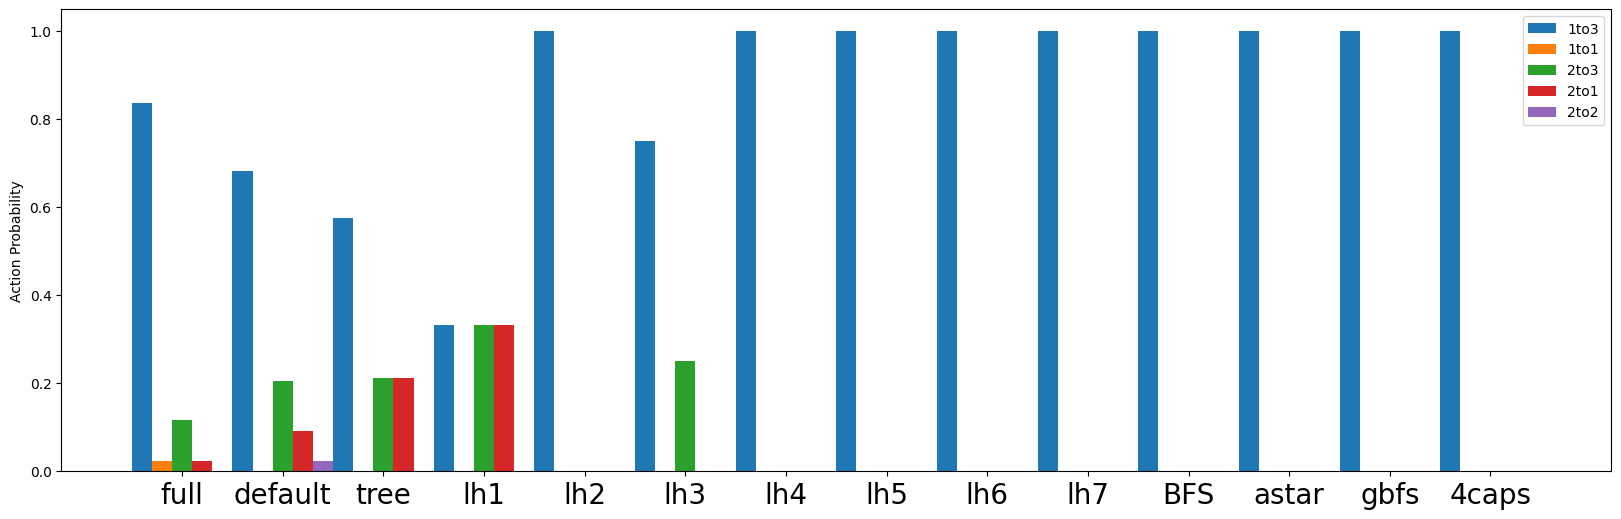

TOL_71
[[2, 3, 0], [1, 0], [0]]
[[0, 0, 0], [2, 1], [3]]


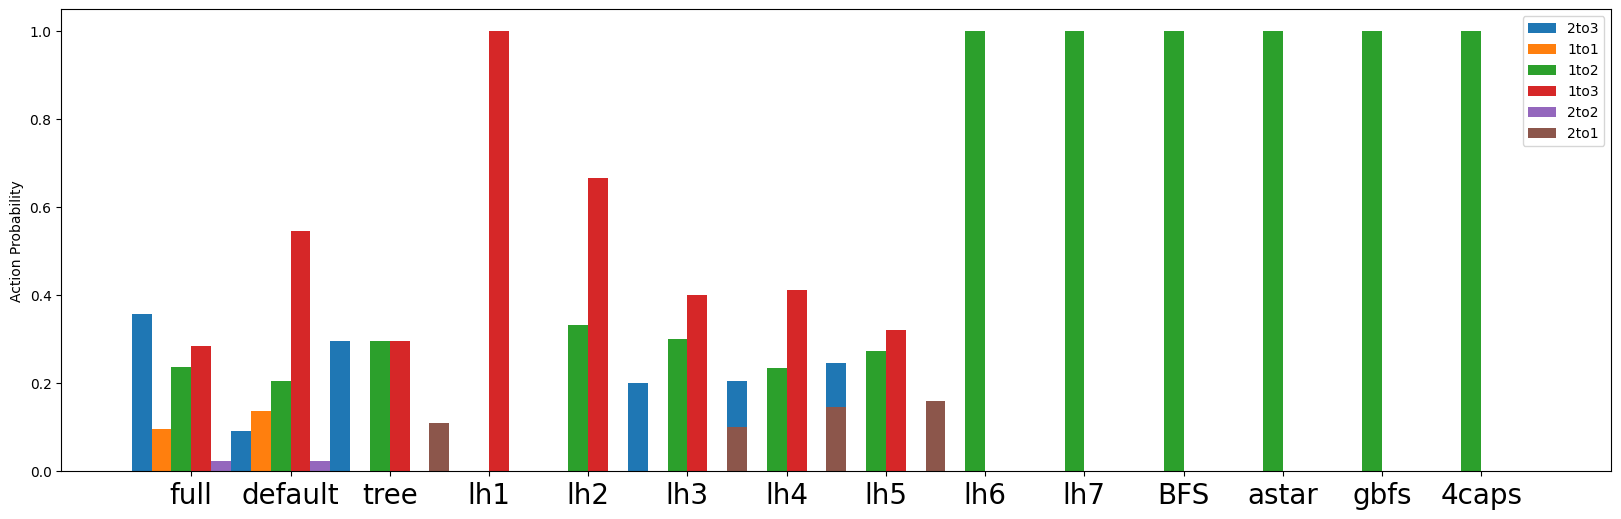

TOL_190
[[0, 0, 0], [2, 3], [1]]
[[1, 2, 0], [3, 0], [0]]


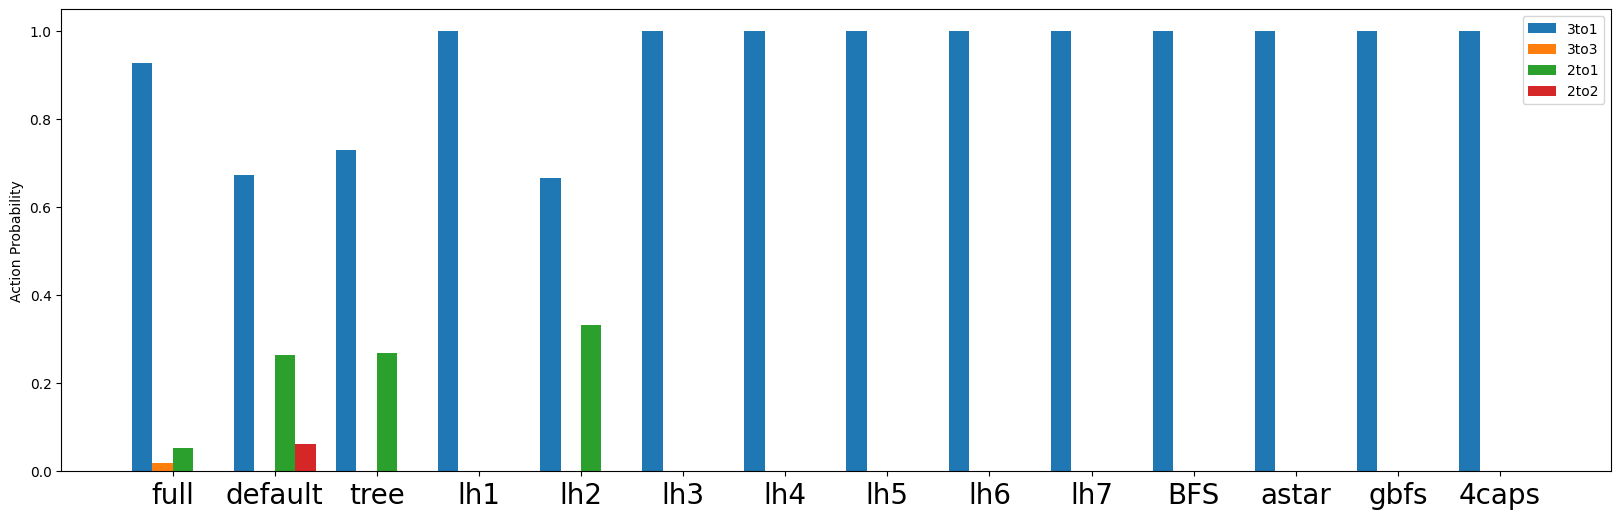

TOL_66
[[2, 3, 0], [1, 0], [0]]
[[0, 0, 0], [2, 3], [1]]


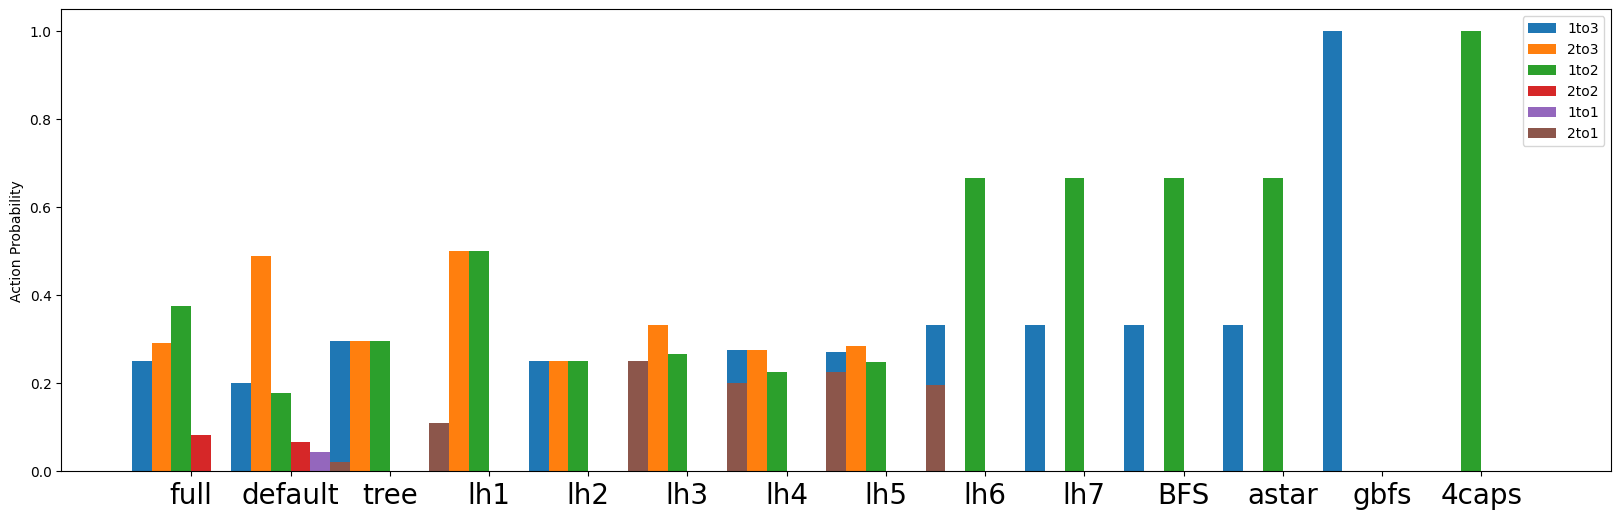

TOL_196
[[0, 0, 0], [2, 3], [1]]
[[2, 0, 0], [3, 1], [0]]


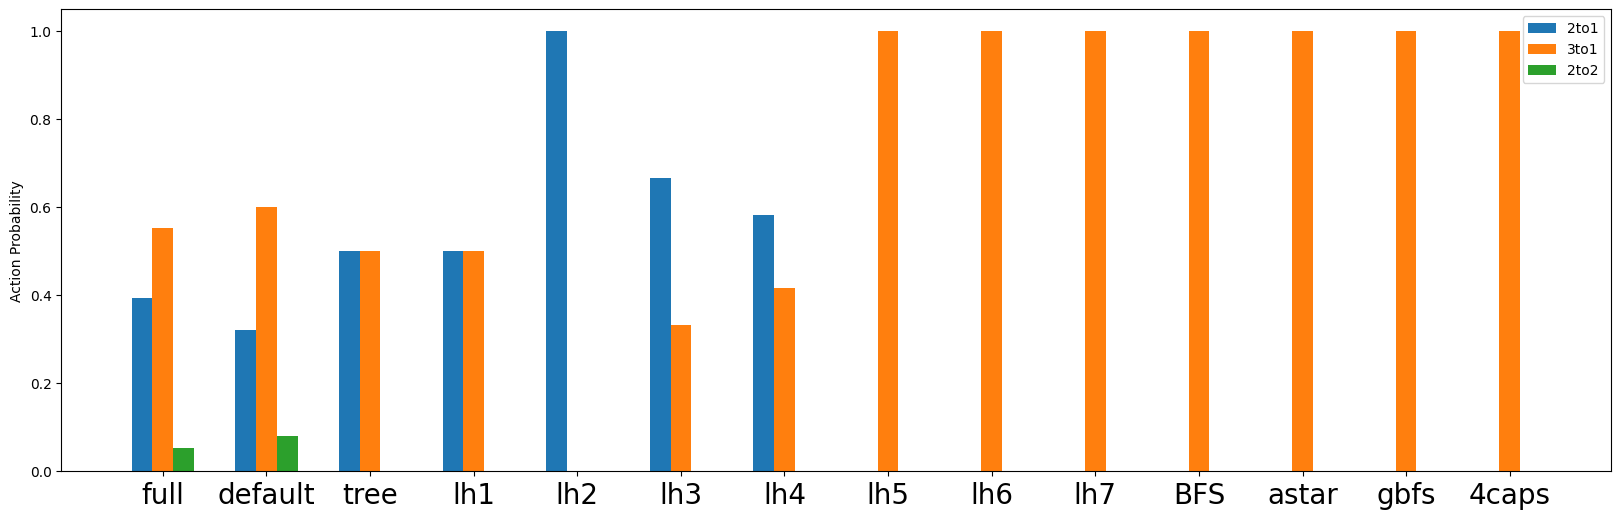

TOL_3
[[1, 2, 3], [0, 0], [0]]
[[2, 3, 1], [0, 0], [0]]


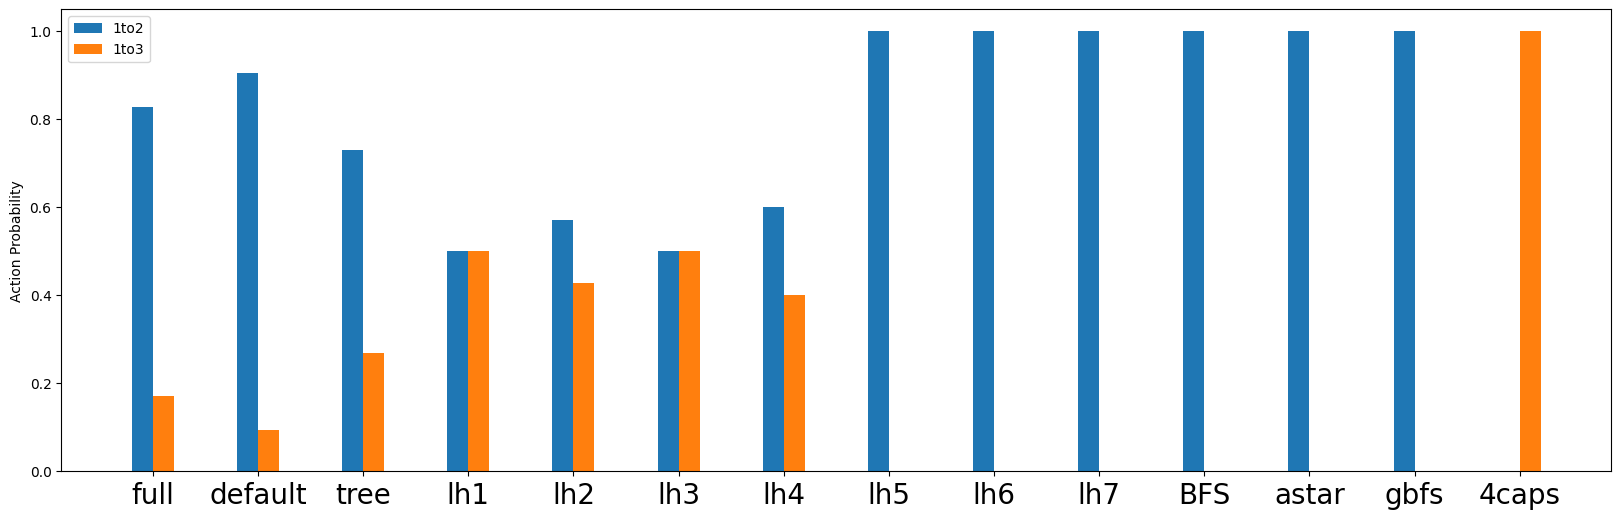

TOL_120
[[2, 3, 0], [0, 0], [1]]
[[3, 0, 0], [1, 2], [0]]


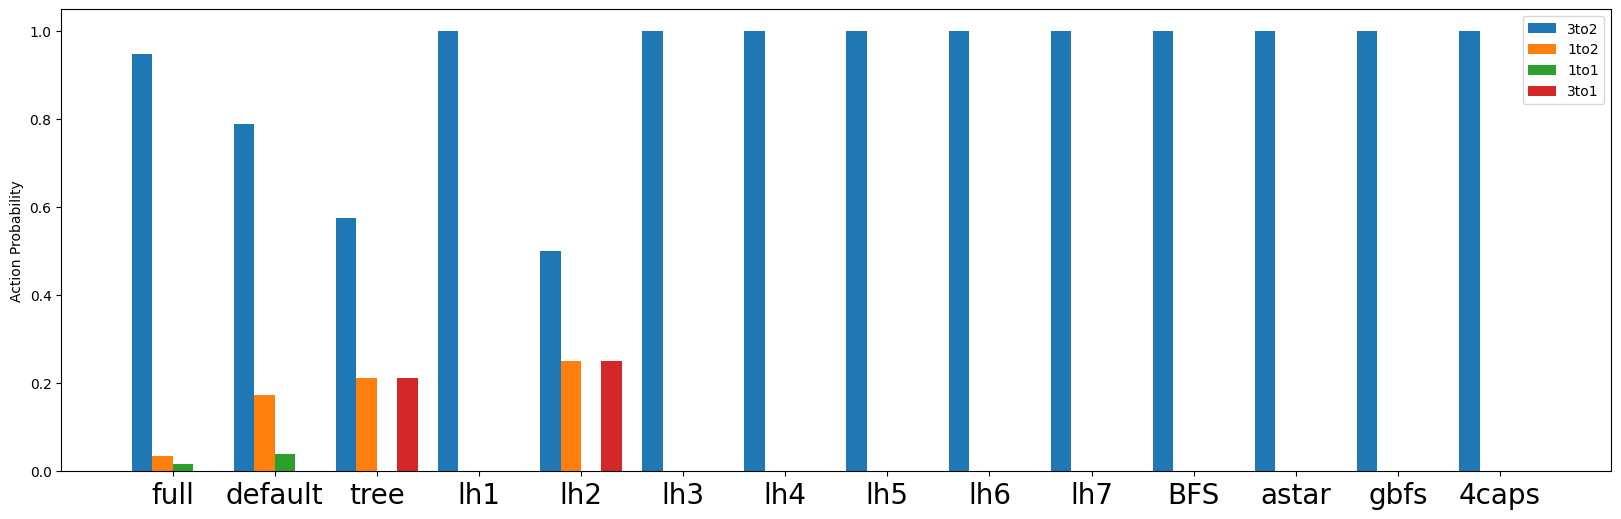

TOL_197
[[0, 0, 0], [2, 3], [1]]
[[1, 0, 0], [3, 2], [0]]


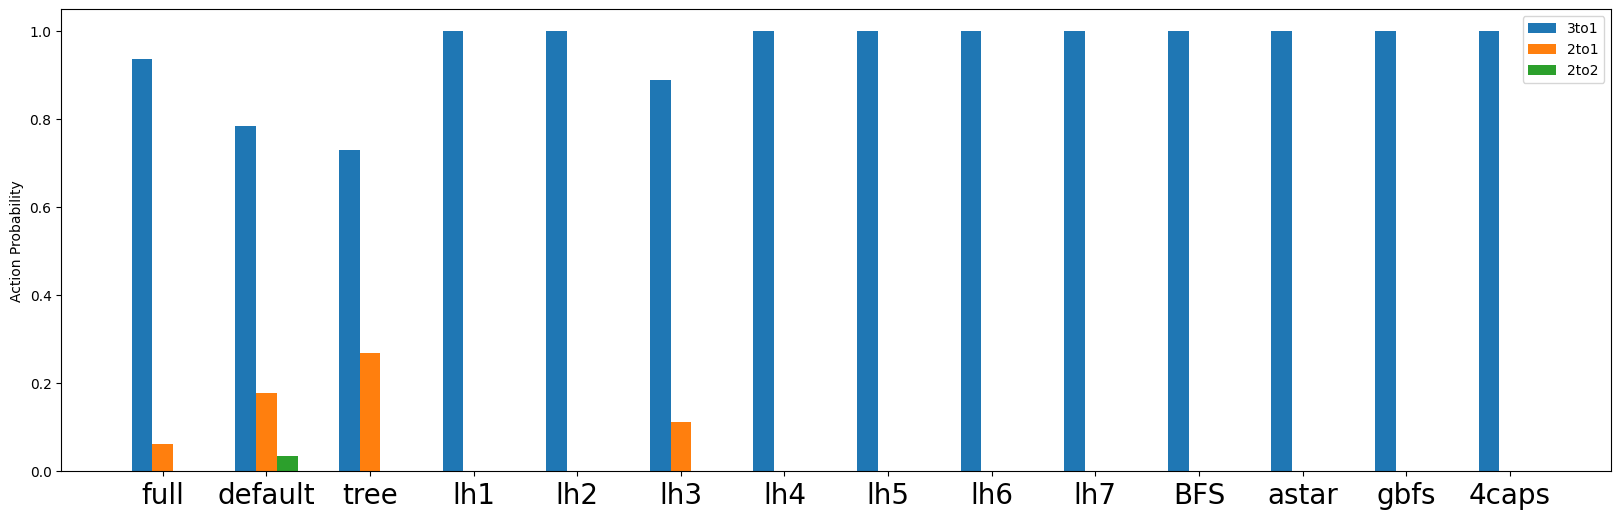

TOL_102
[[3, 0, 0], [1, 2], [0]]
[[0, 0, 0], [2, 3], [1]]


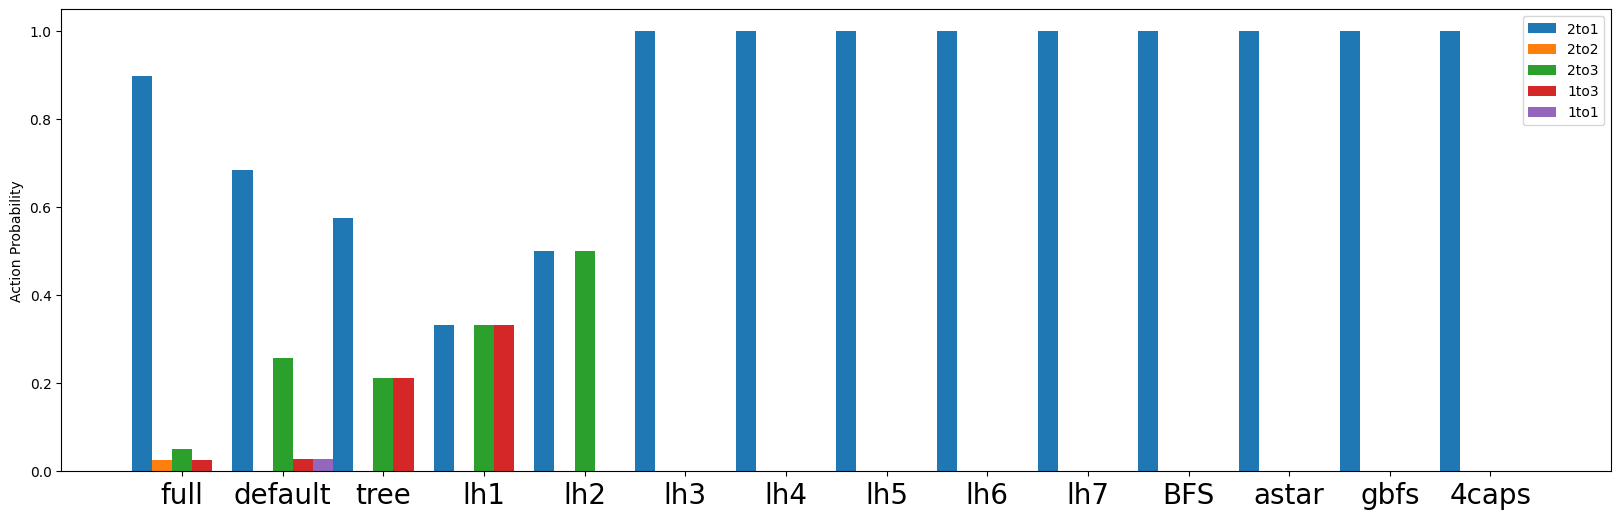

TOL_207
[[0, 0, 0], [2, 3], [1]]
[[1, 0, 0], [3, 0], [2]]


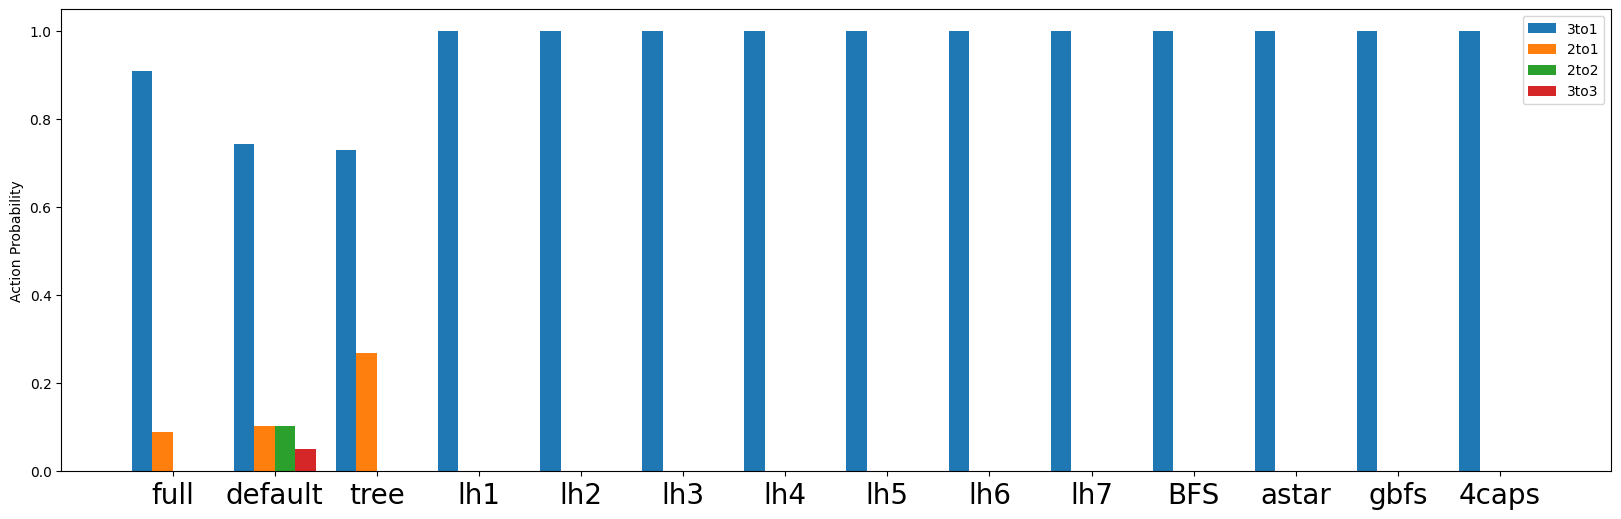

TOL_150
[[3, 0, 0], [2, 0], [1]]
[[2, 3, 0], [1, 0], [0]]


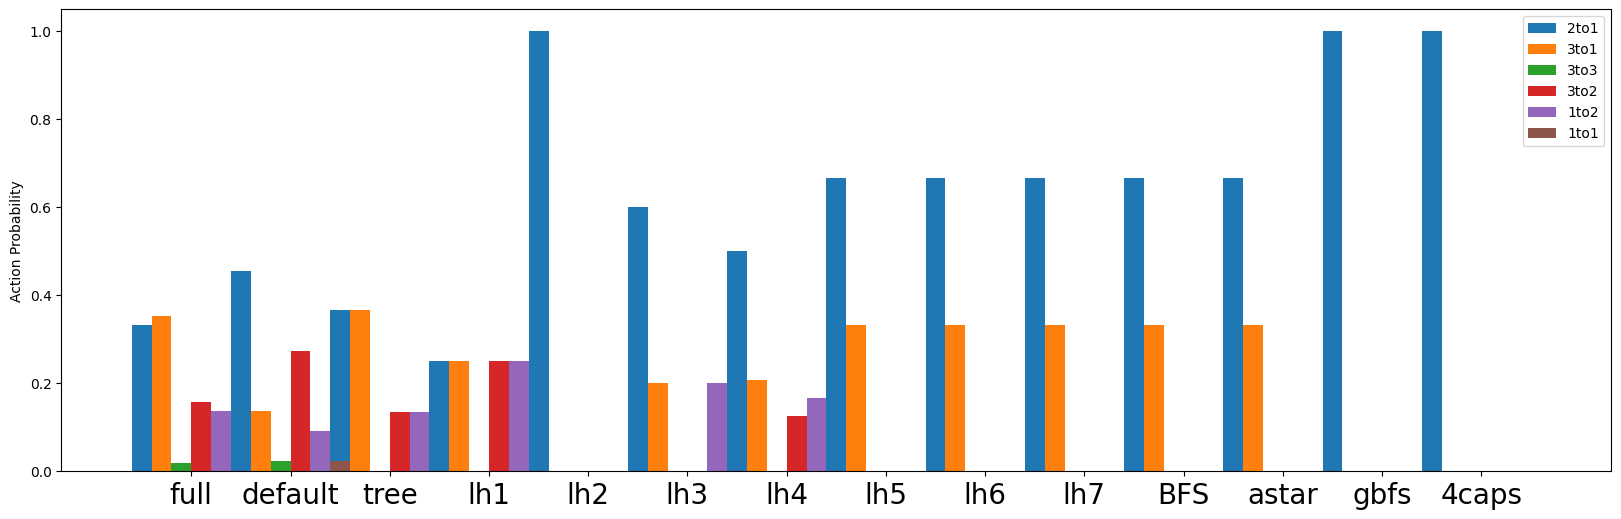

TOL_46
[[2, 3, 0], [1, 0], [0]]
[[1, 2, 0], [3, 0], [0]]


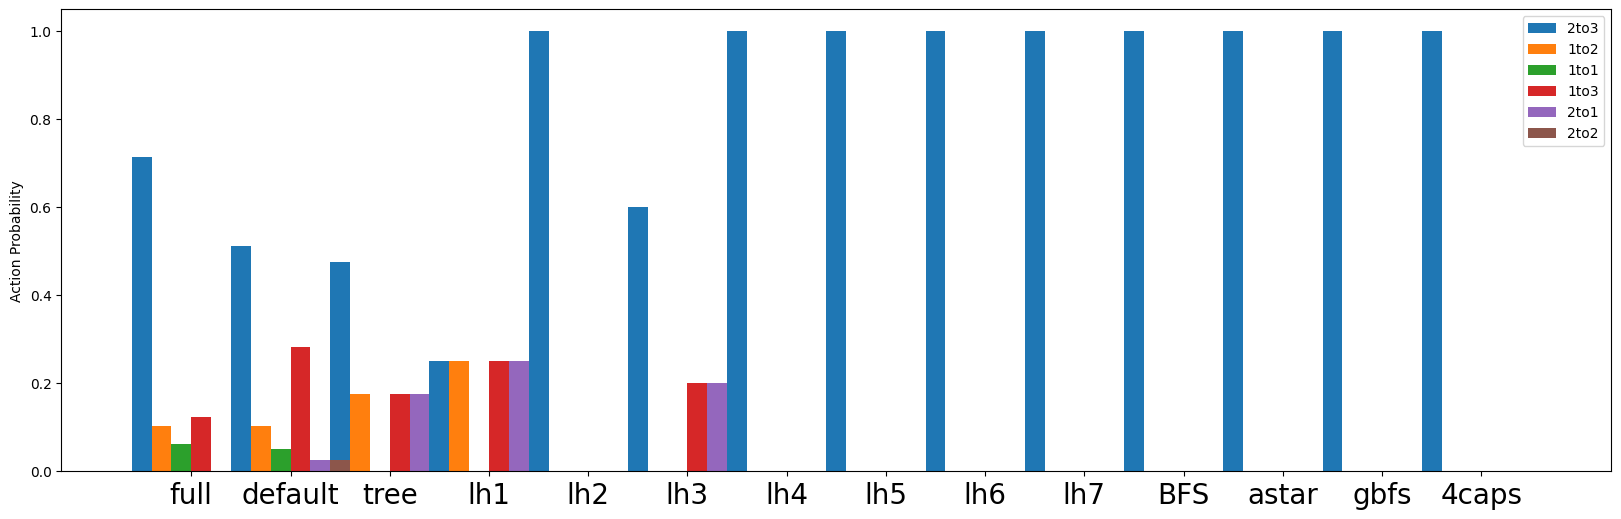

TOL_118
[[2, 3, 0], [0, 0], [1]]
[[1, 2, 0], [3, 0], [0]]


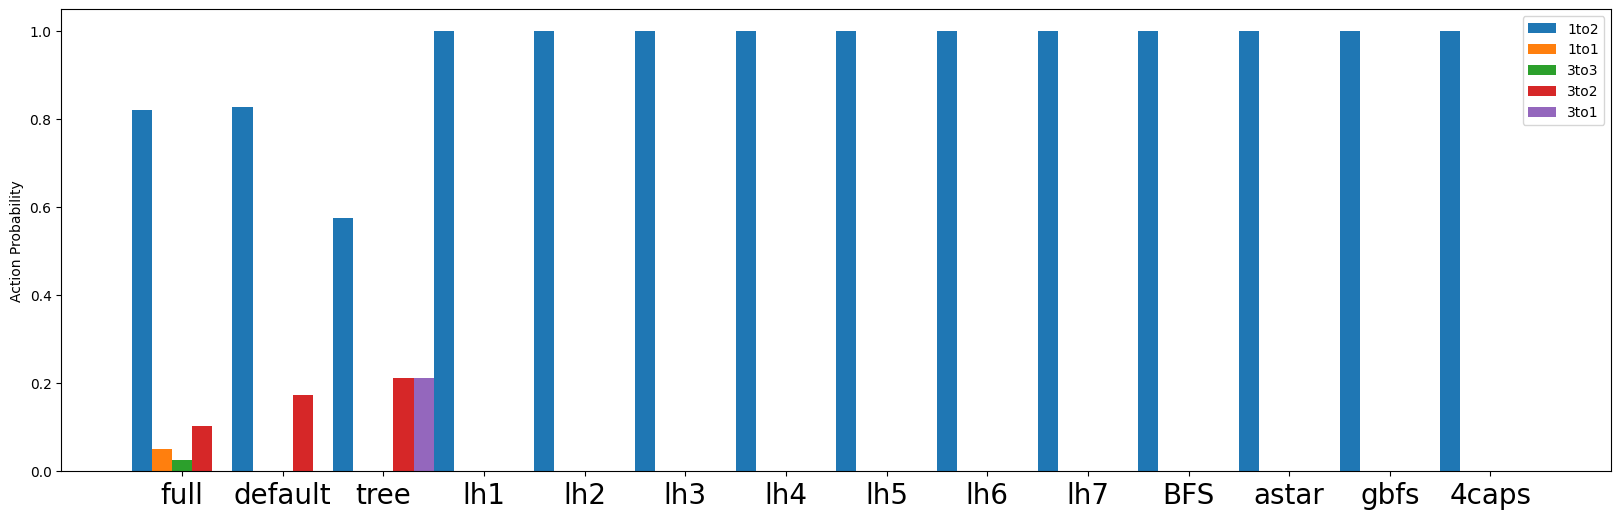

TOL_161
[[3, 0, 0], [2, 0], [1]]
[[1, 0, 0], [3, 2], [0]]


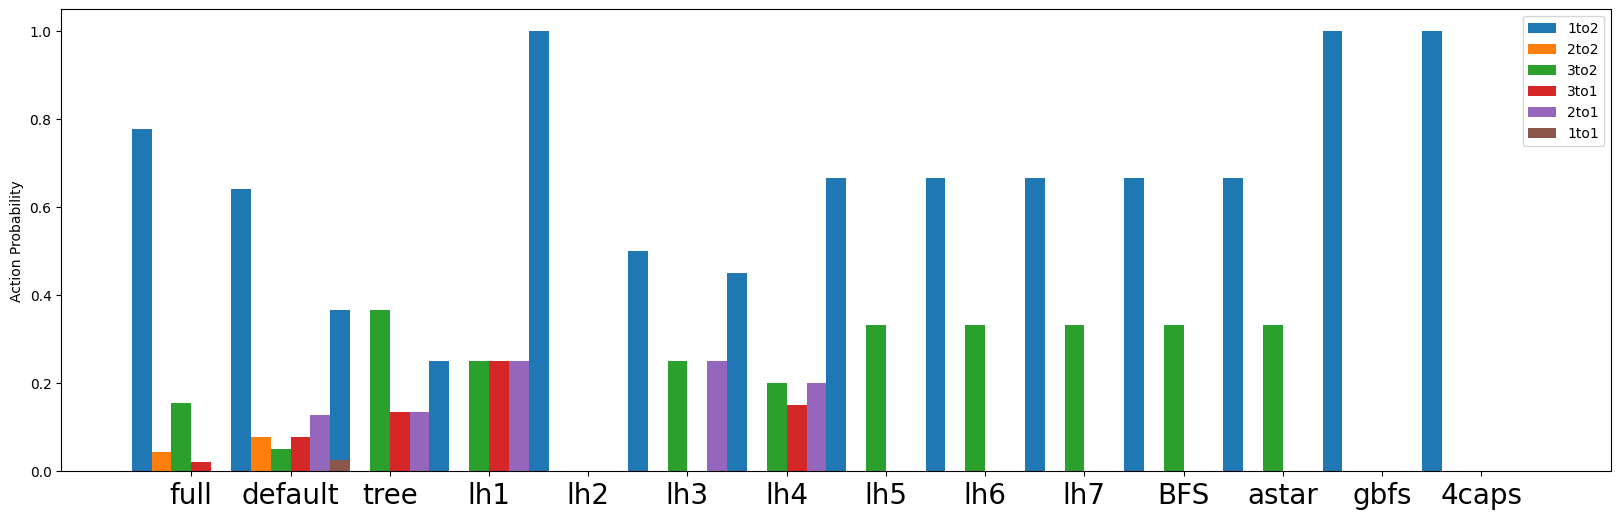

TOL_83
[[3, 0, 0], [1, 2], [0]]
[[2, 1, 0], [3, 0], [0]]


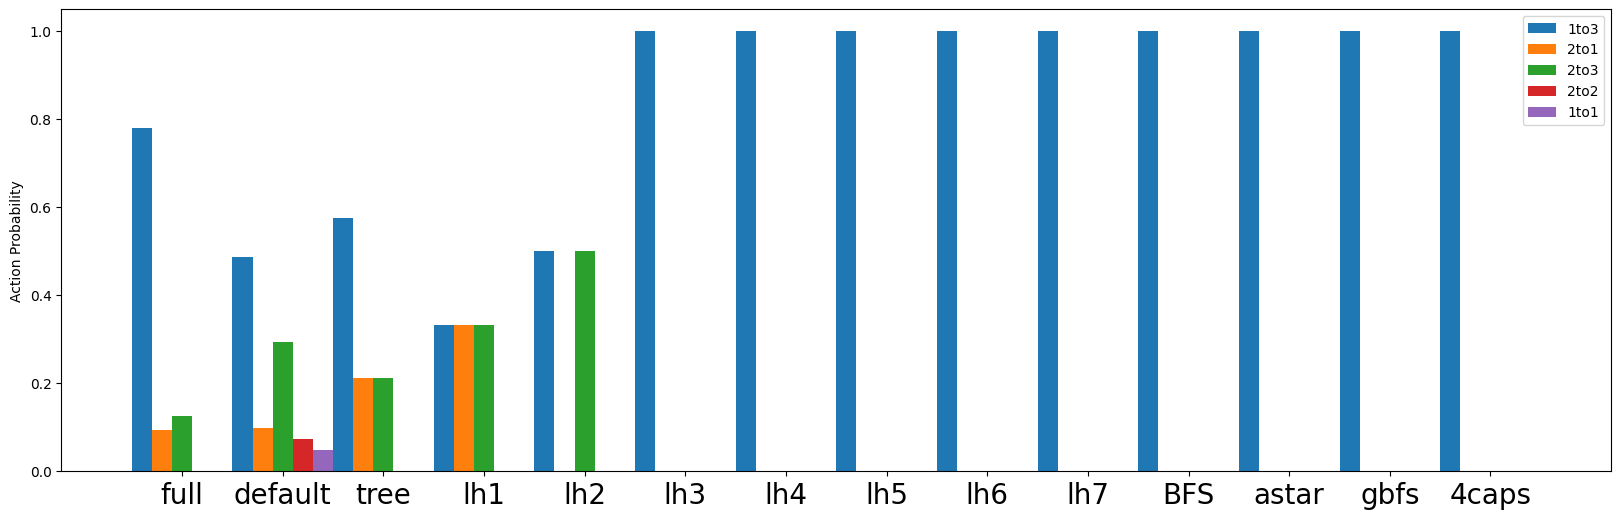

TOL_178
[[3, 0, 0], [2, 0], [1]]
[[0, 0, 0], [1, 2], [3]]


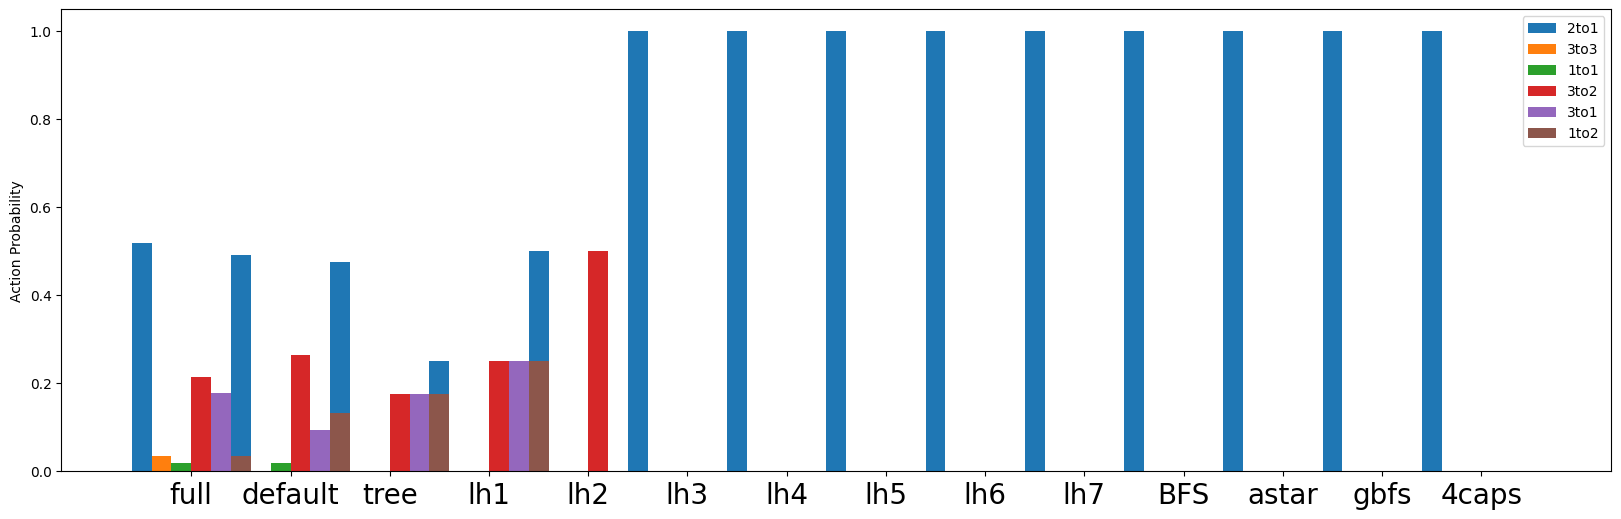

TOL_192
[[0, 0, 0], [2, 3], [1]]
[[3, 0, 0], [1, 2], [0]]


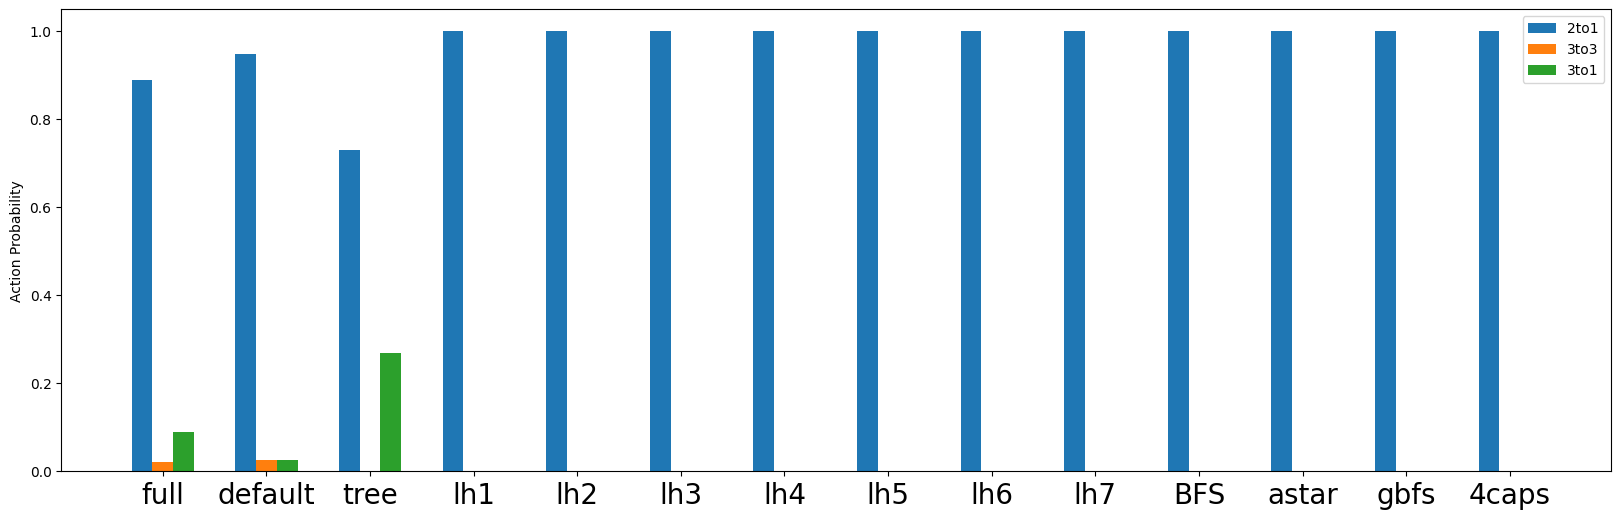

TOL_206
[[0, 0, 0], [2, 3], [1]]
[[3, 0, 0], [1, 0], [2]]


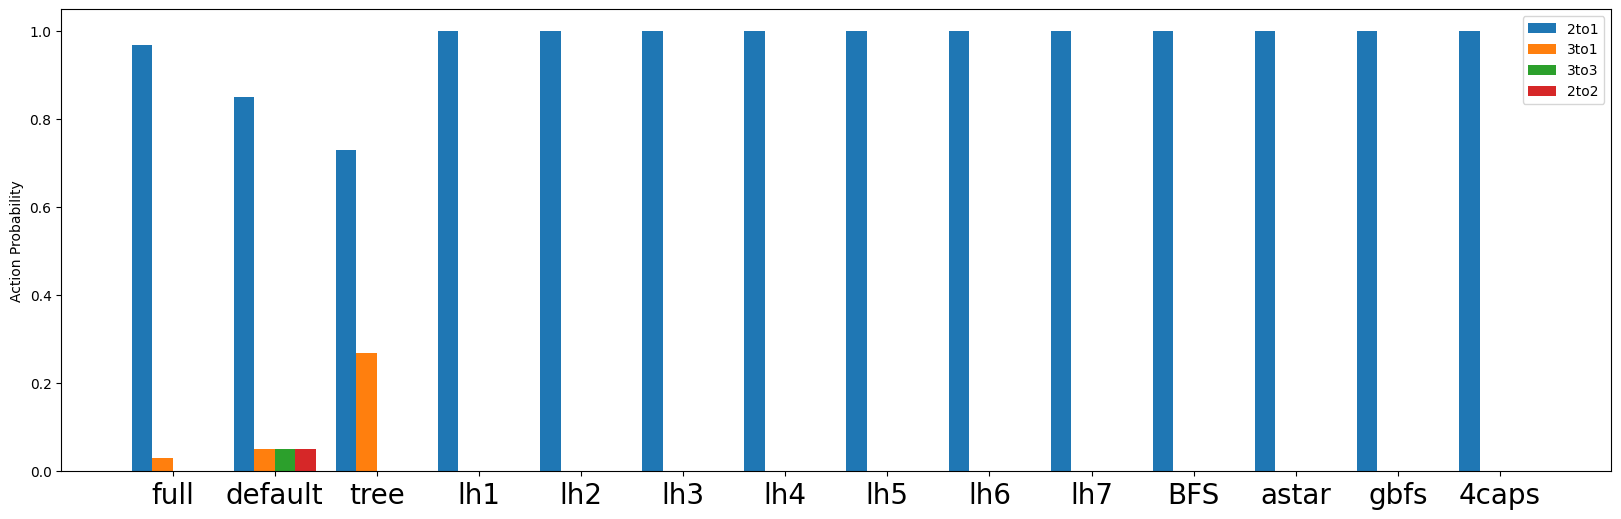

TOL_41
[[2, 3, 0], [1, 0], [0]]
[[3, 2, 1], [0, 0], [0]]


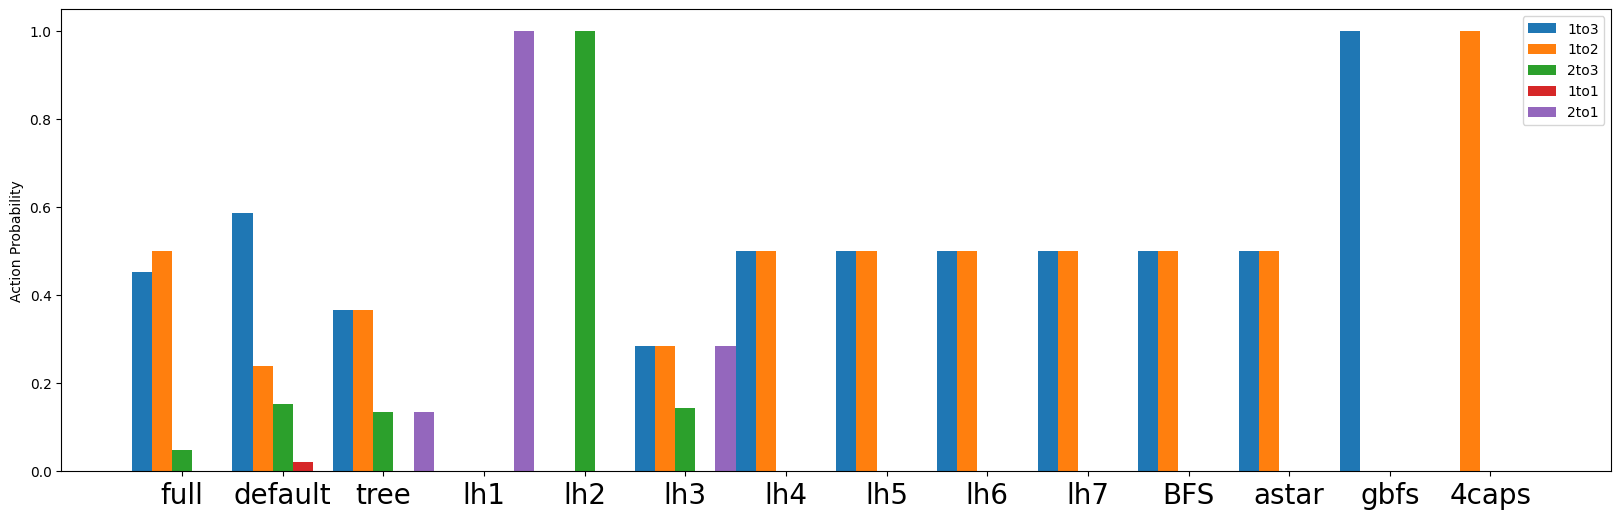

TOL_113
[[2, 3, 0], [0, 0], [1]]
[[3, 2, 1], [0, 0], [0]]


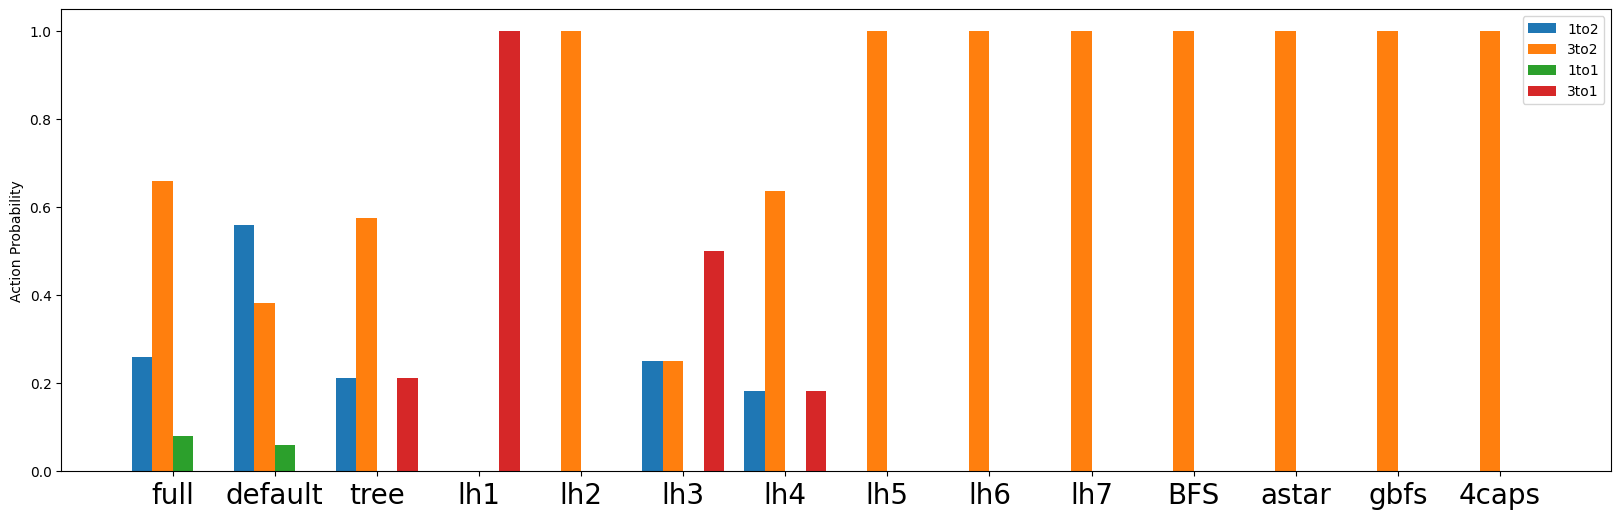

TOL_2
[[1, 2, 3], [0, 0], [0]]
[[2, 1, 3], [0, 0], [0]]


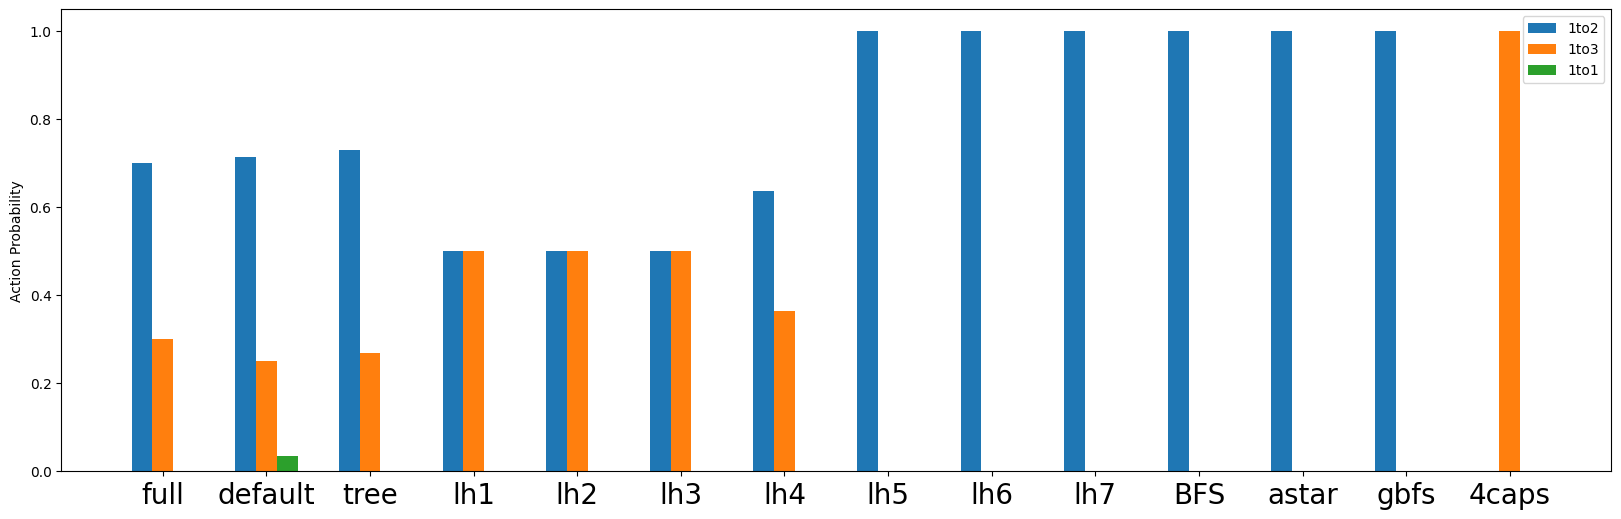

TOL_36
[[2, 3, 0], [1, 0], [0]]
[[1, 2, 3], [0, 0], [0]]


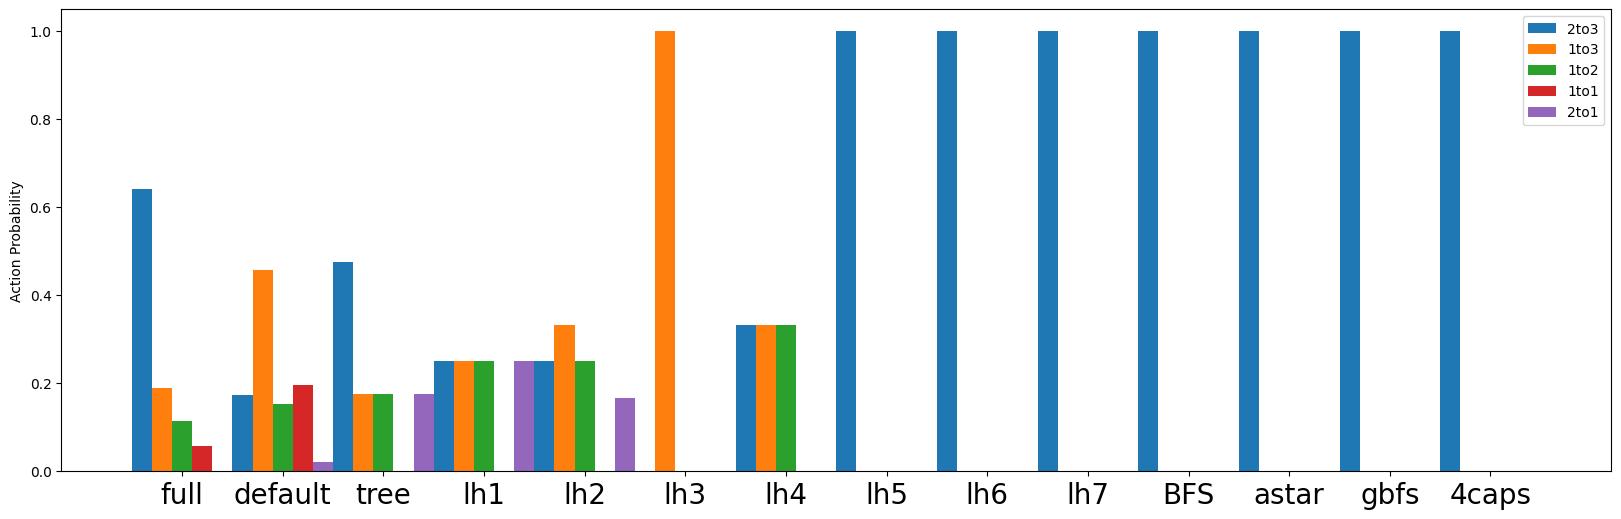

TOL_25
[[1, 2, 3], [0, 0], [0]]
[[2, 0, 0], [3, 0], [1]]


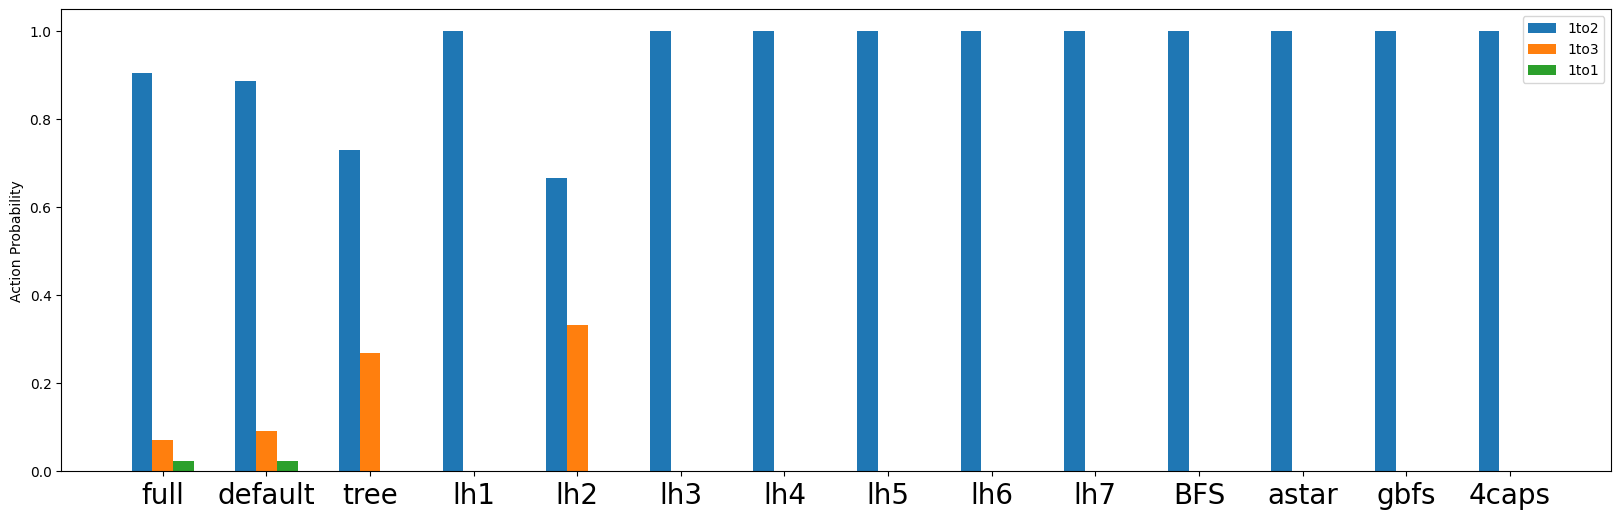

TOL_56
[[2, 3, 0], [1, 0], [0]]
[[1, 3, 0], [0, 0], [2]]


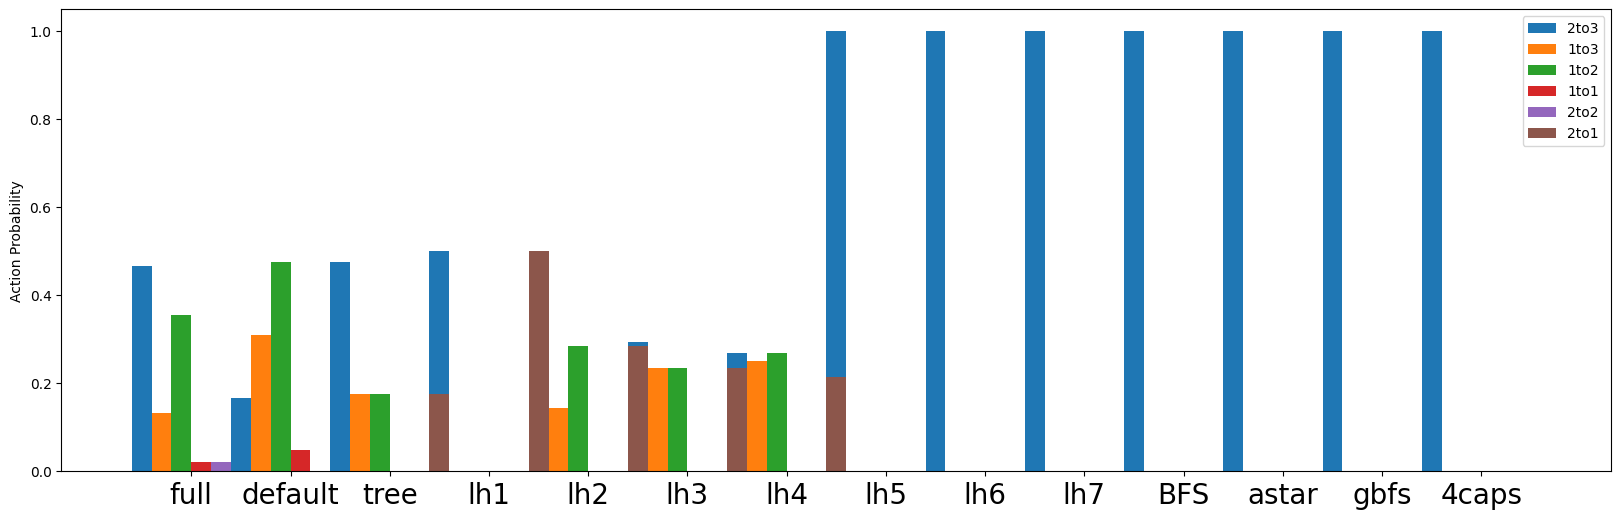

TOL_75
[[3, 0, 0], [1, 2], [0]]
[[2, 3, 1], [0, 0], [0]]


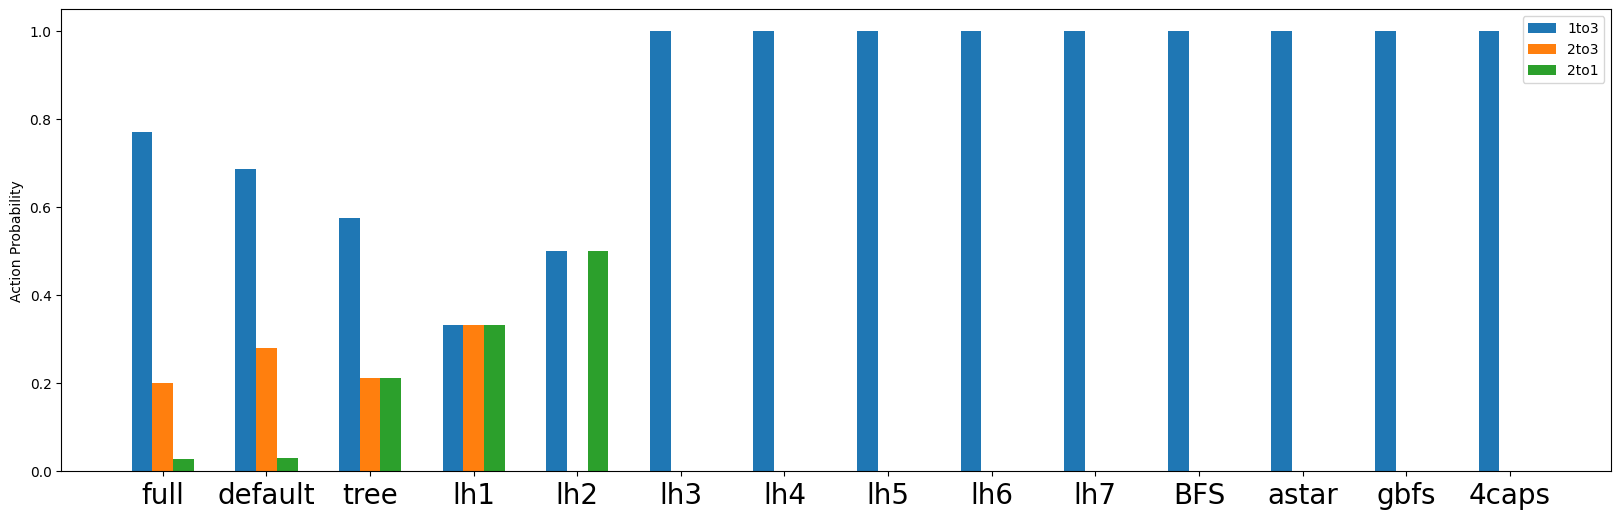

TOL_107
[[3, 0, 0], [1, 2], [0]]
[[0, 0, 0], [2, 1], [3]]


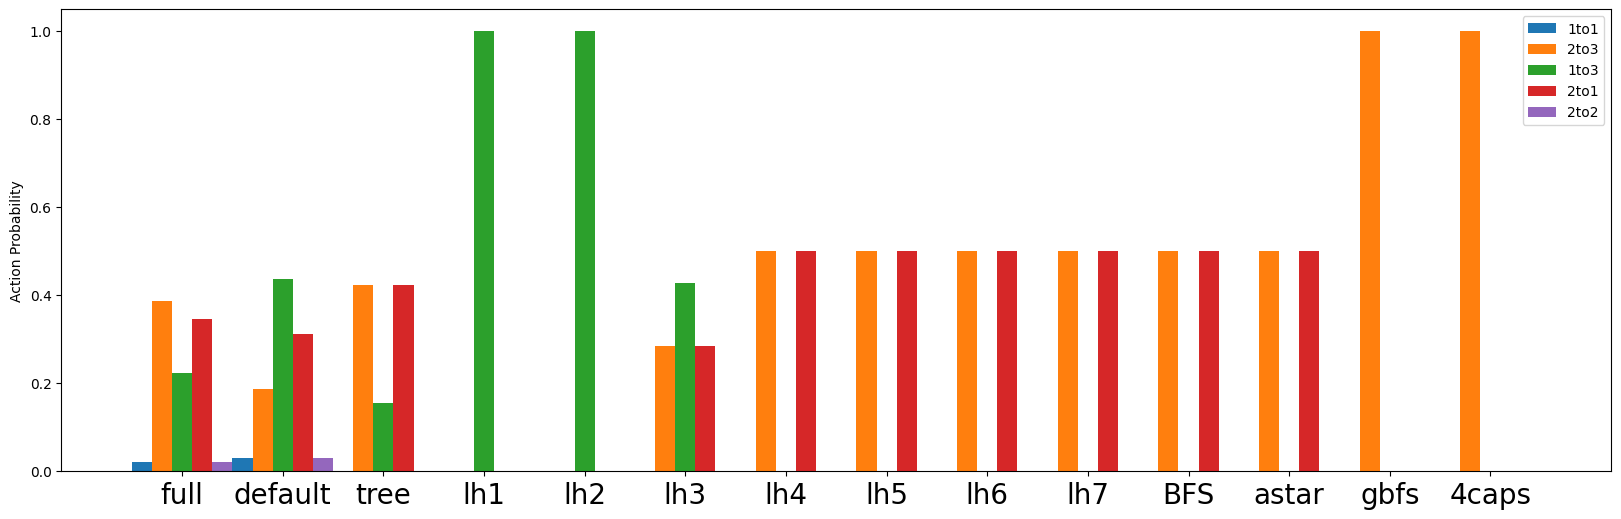

TOL_191
[[0, 0, 0], [2, 3], [1]]
[[2, 1, 0], [3, 0], [0]]


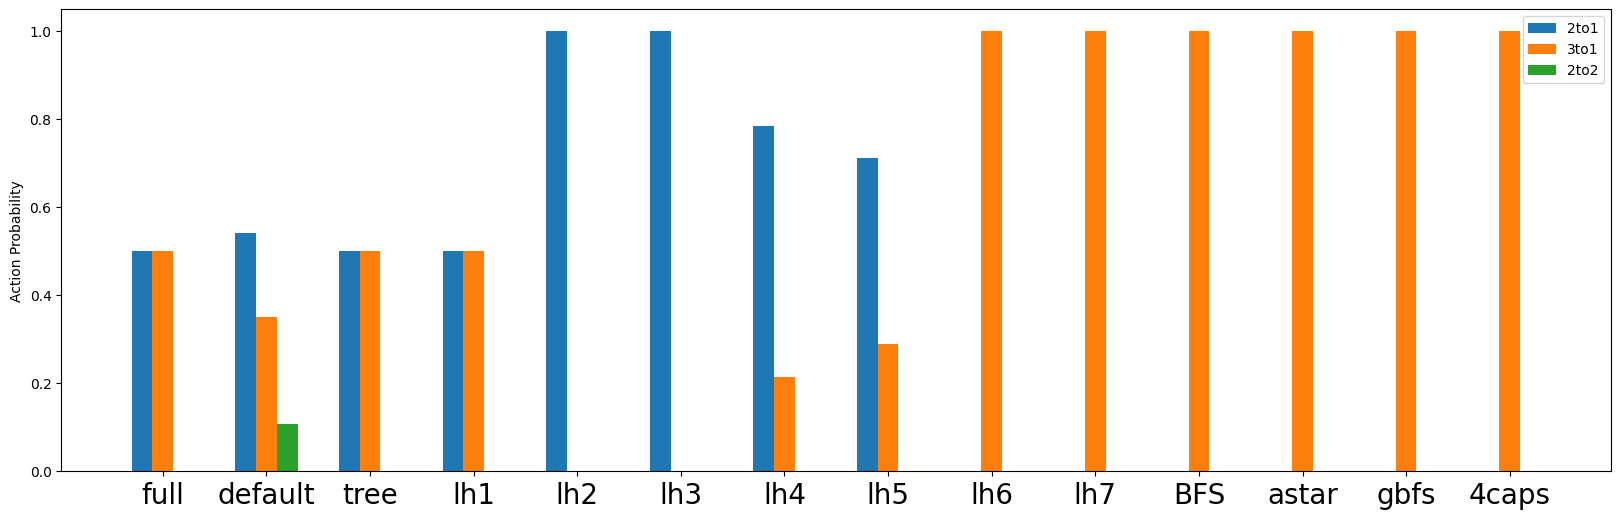

TOL_137
[[2, 3, 0], [0, 0], [1]]
[[1, 0, 0], [2, 0], [3]]


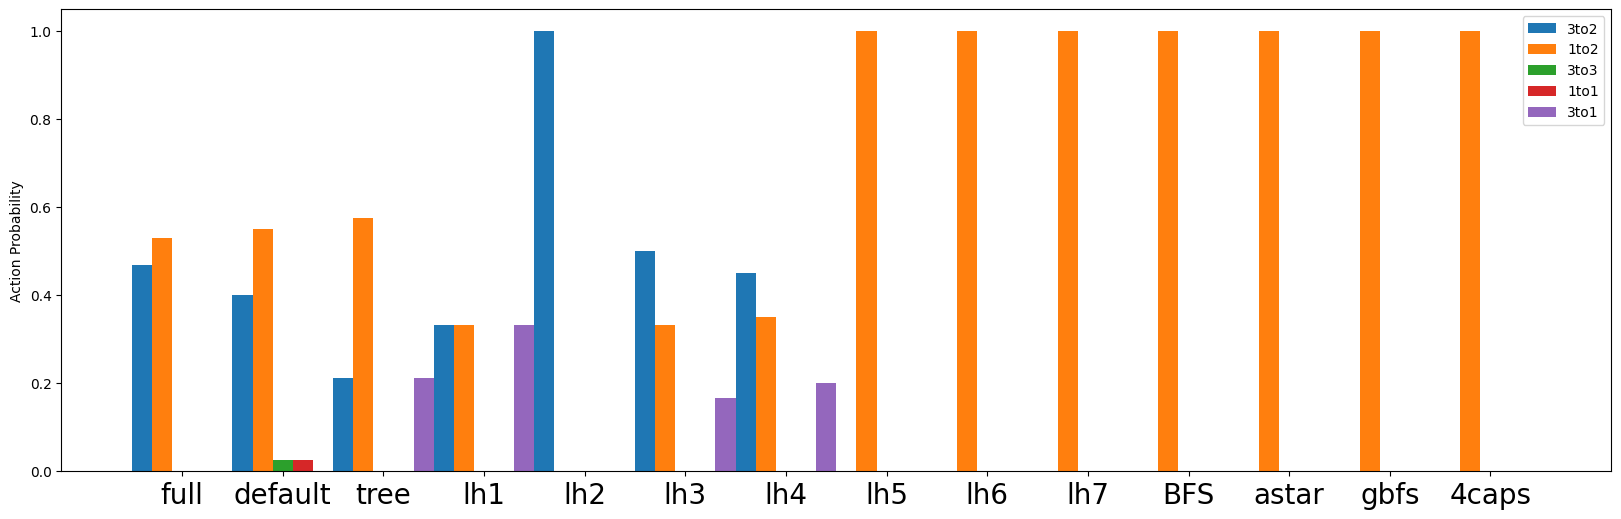

TOL_146
[[3, 0, 0], [2, 0], [1]]
[[2, 1, 3], [0, 0], [0]]


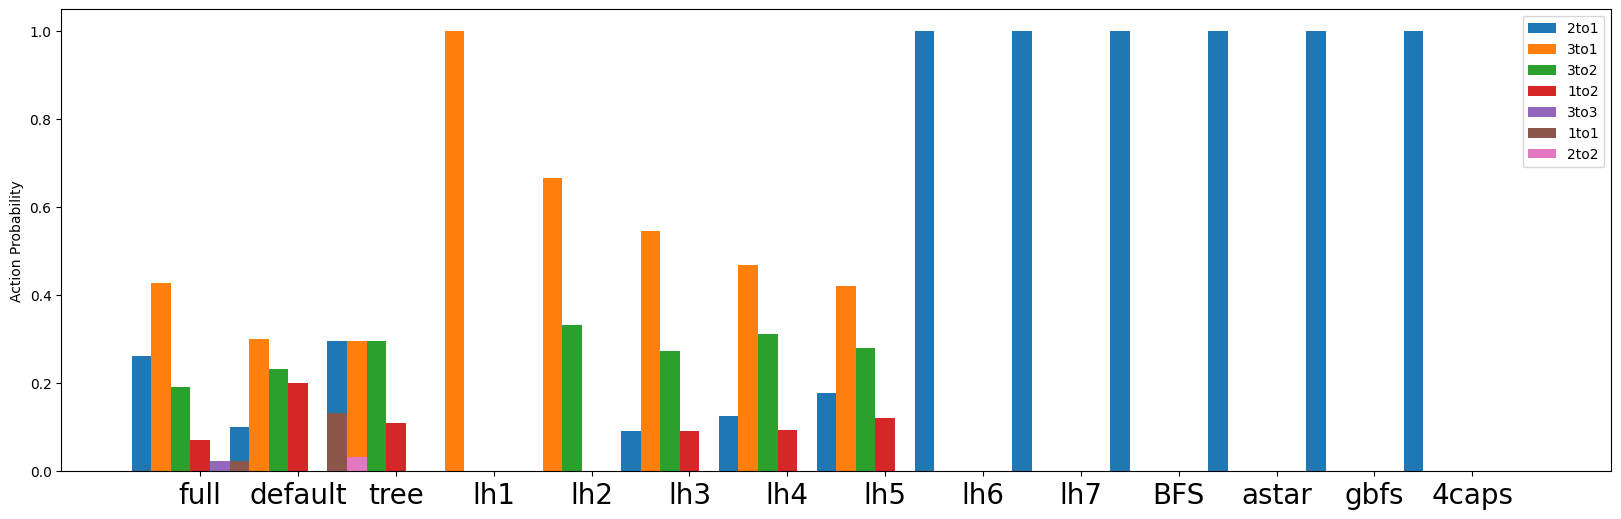

TOL_73
[[3, 0, 0], [1, 2], [0]]
[[1, 3, 2], [0, 0], [0]]


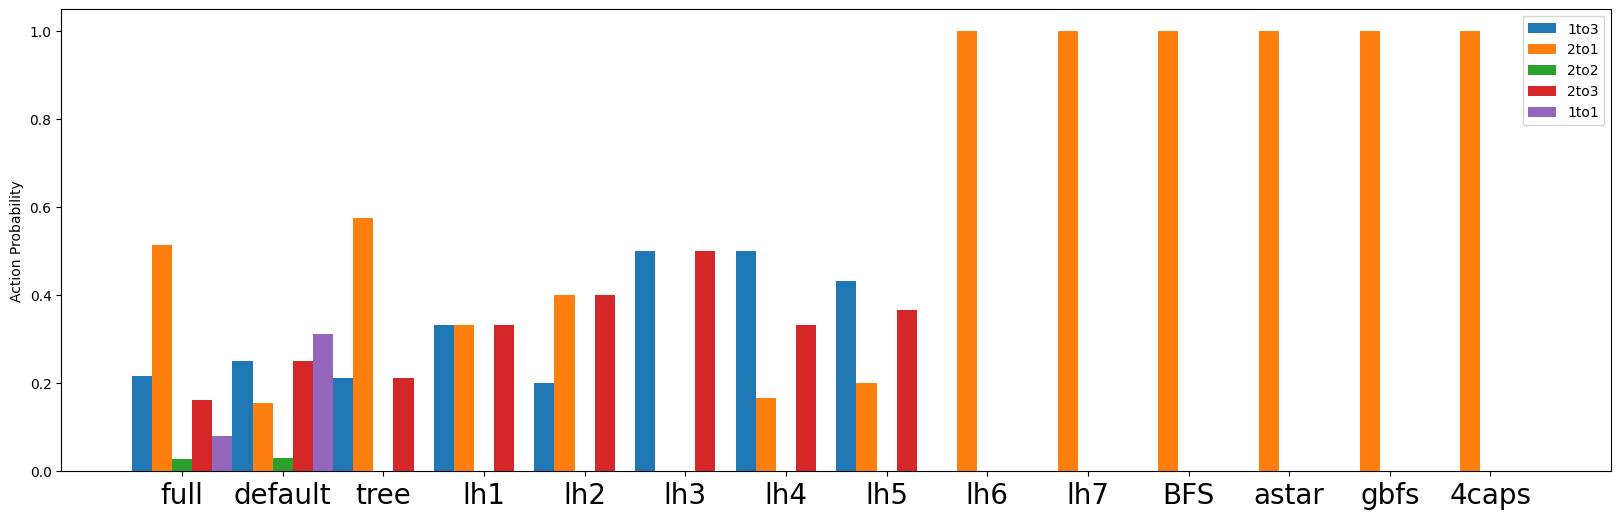

TOL_45
[[2, 3, 0], [1, 0], [0]]
[[3, 1, 0], [2, 0], [0]]


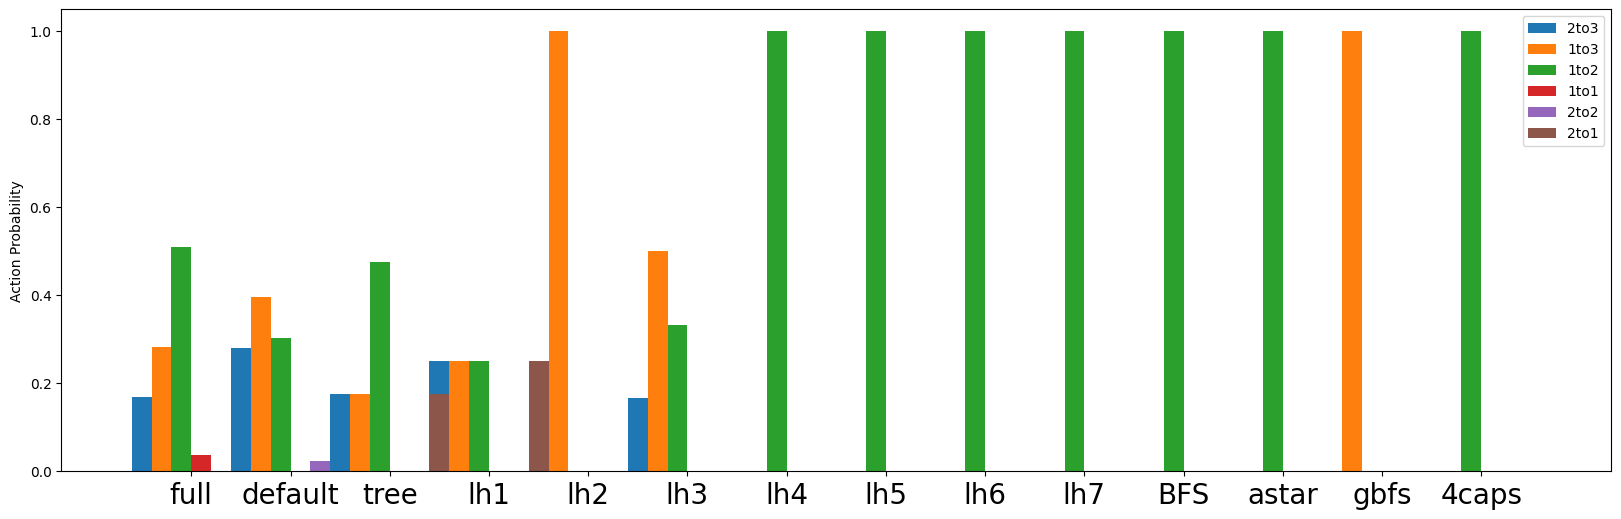

TOL_214
[[0, 0, 0], [2, 3], [1]]
[[0, 0, 0], [1, 2], [3]]


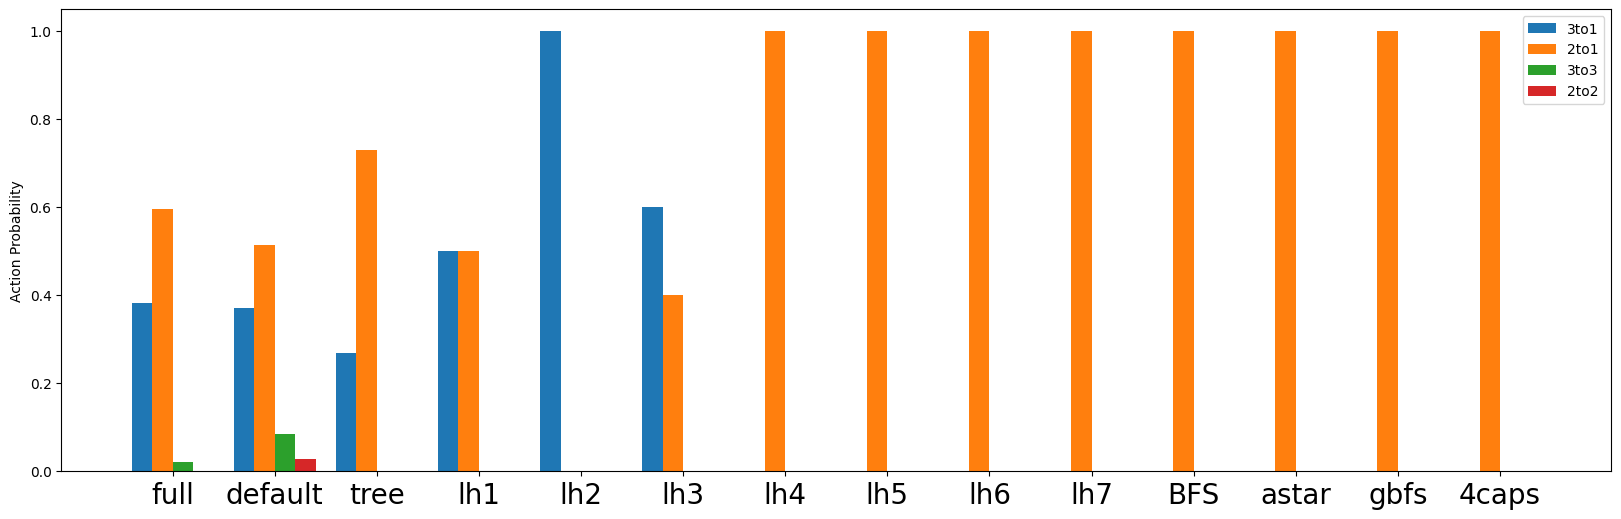

TOL_171
[[3, 0, 0], [2, 0], [1]]
[[1, 0, 0], [3, 0], [2]]


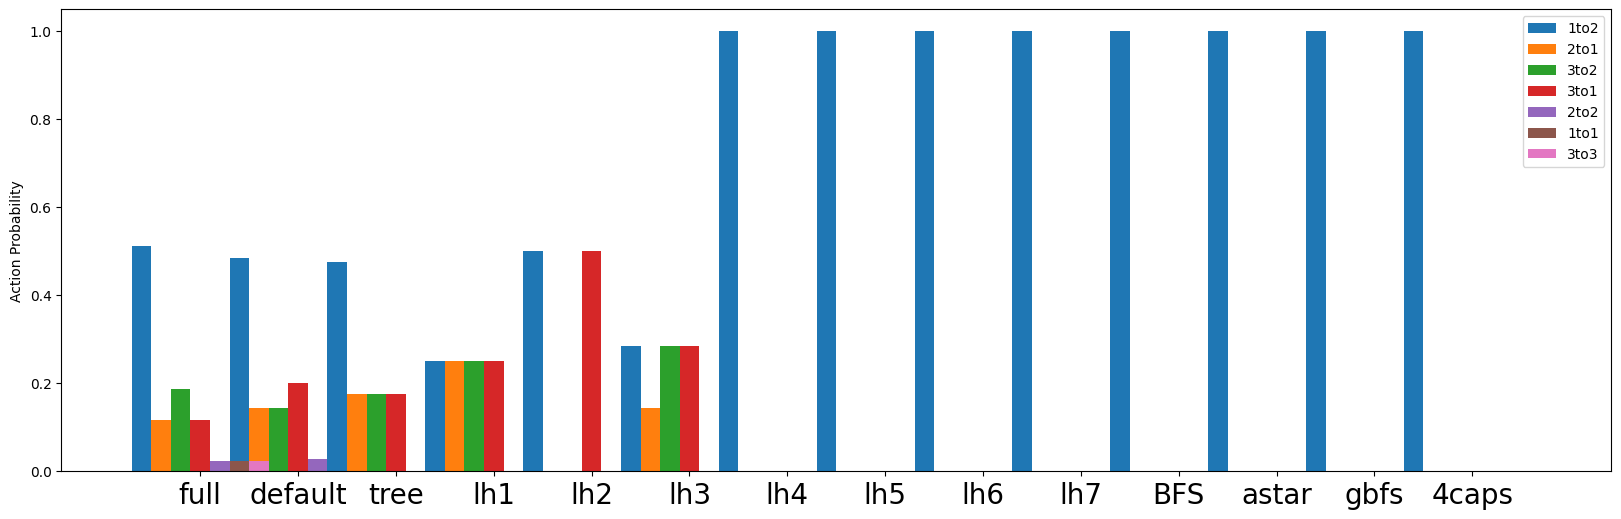

TOL_86
[[3, 0, 0], [1, 2], [0]]
[[3, 0, 0], [2, 1], [0]]


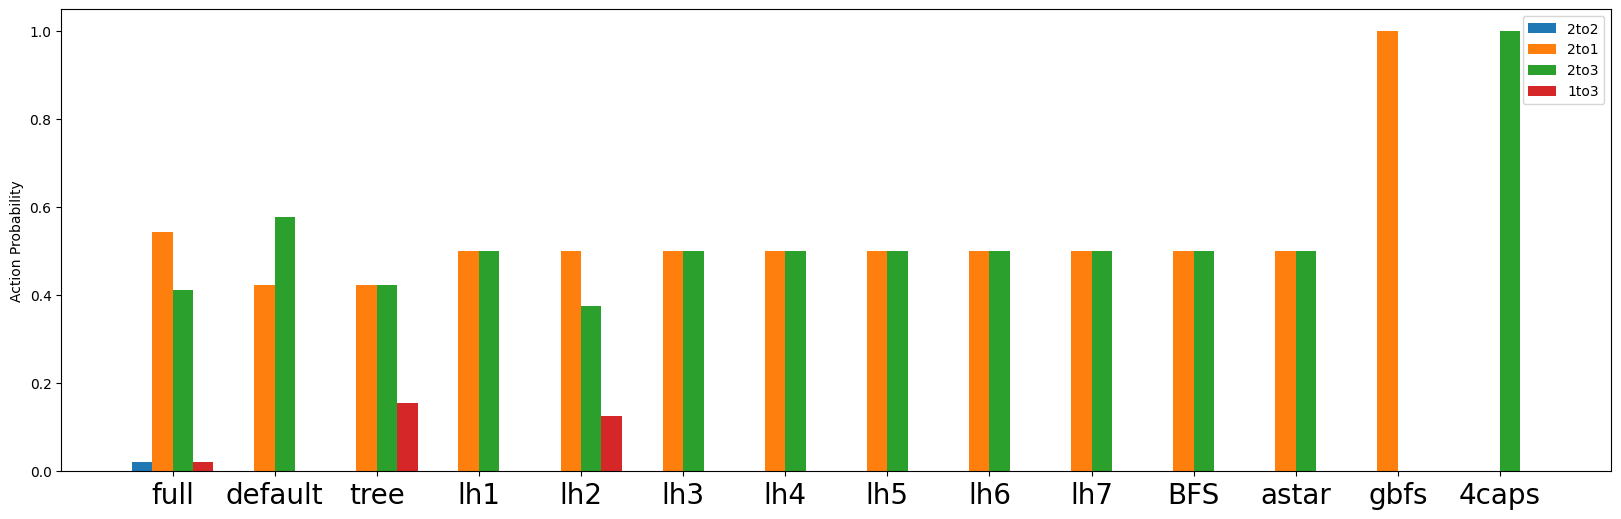

TOL_89
[[3, 0, 0], [1, 2], [0]]
[[1, 0, 0], [3, 2], [0]]


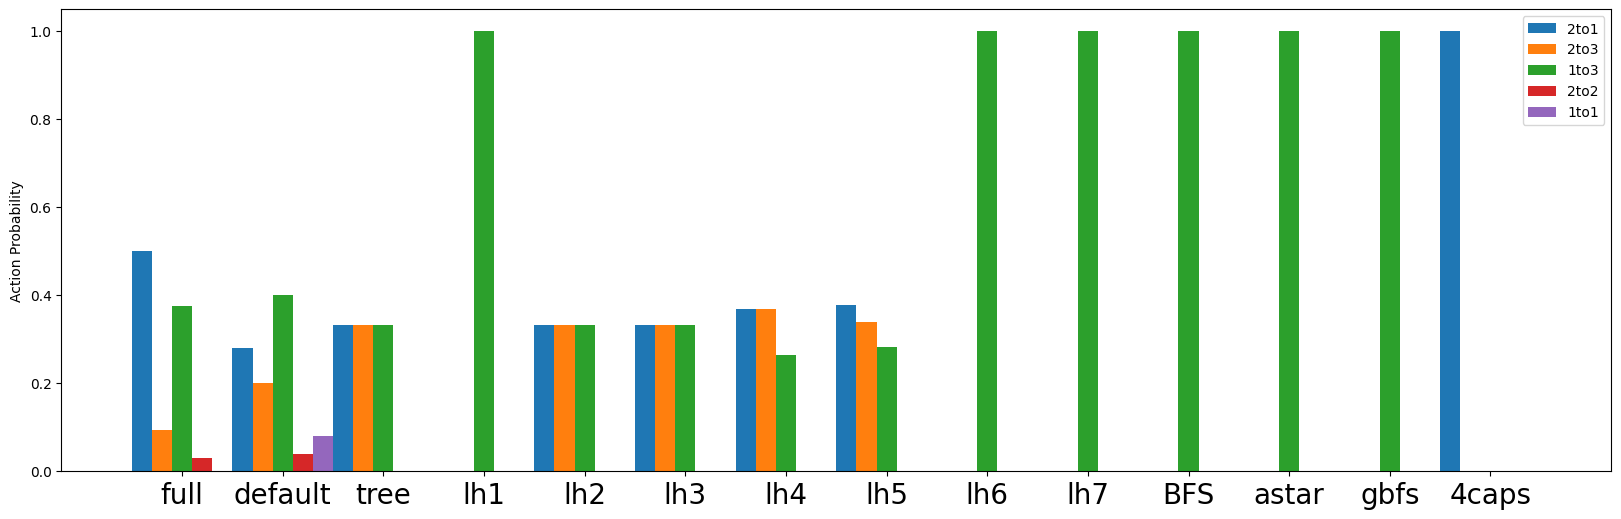

TOL_74
[[3, 0, 0], [1, 2], [0]]
[[2, 1, 3], [0, 0], [0]]


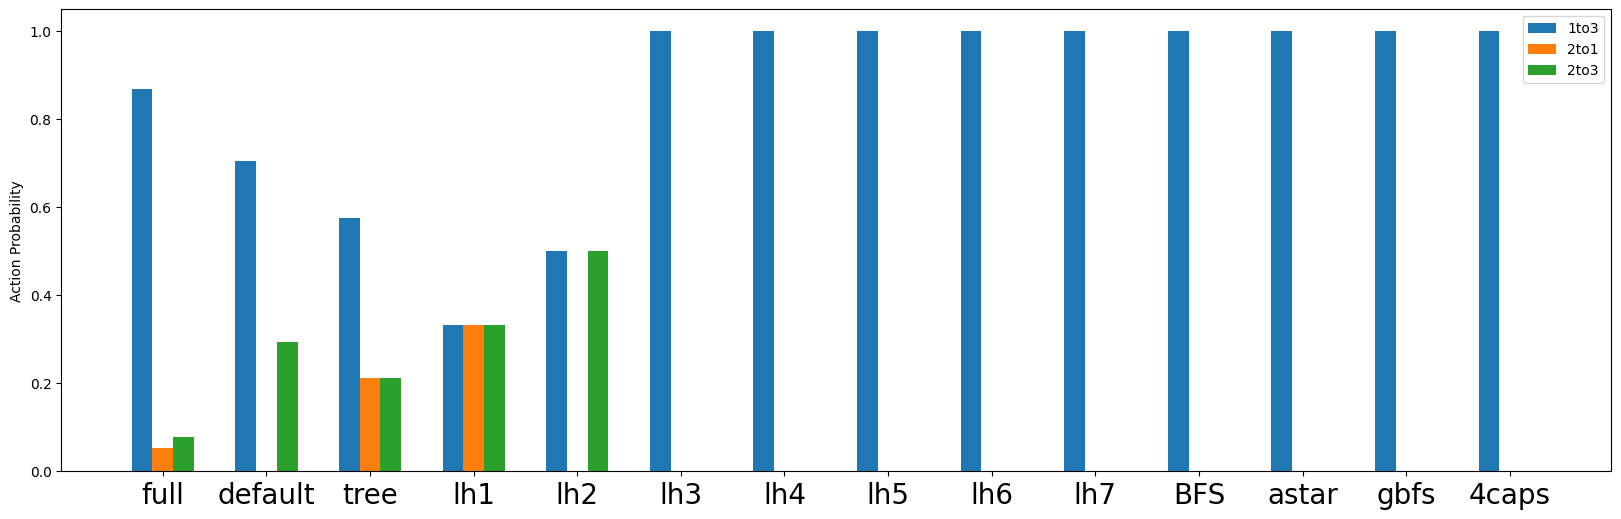

TOL_19
[[1, 2, 3], [0, 0], [0]]
[[3, 2, 0], [0, 0], [1]]


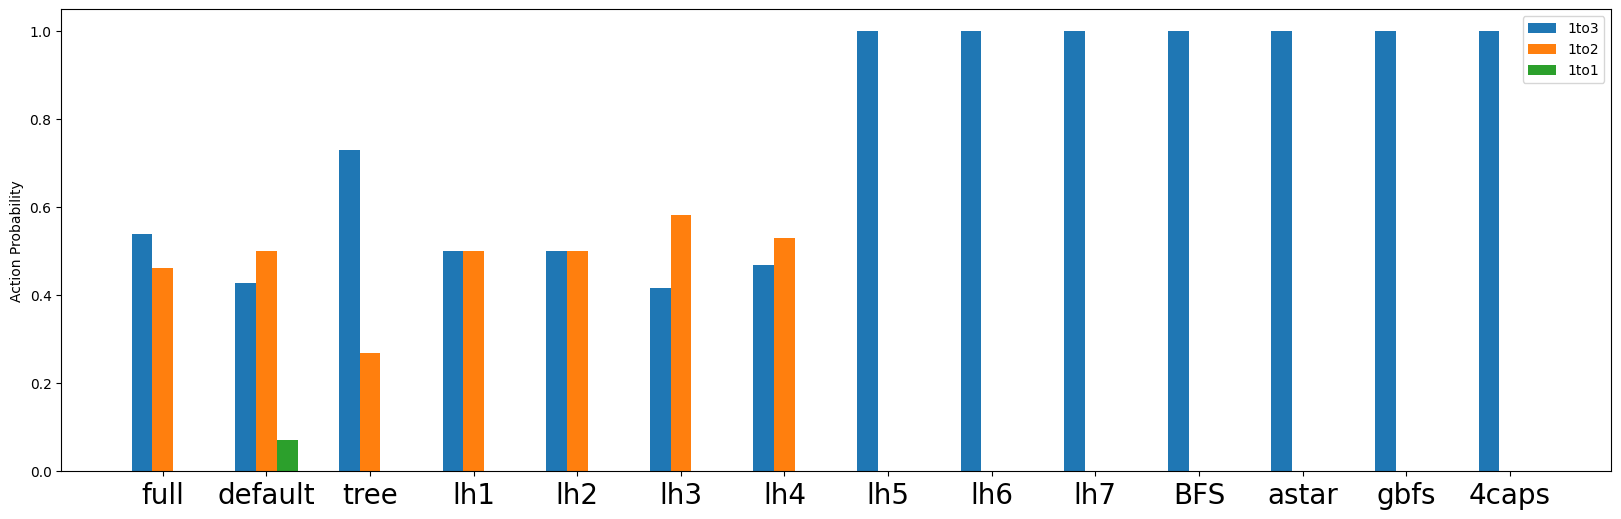

TOL_180
[[0, 0, 0], [2, 3], [1]]
[[1, 2, 3], [0, 0], [0]]


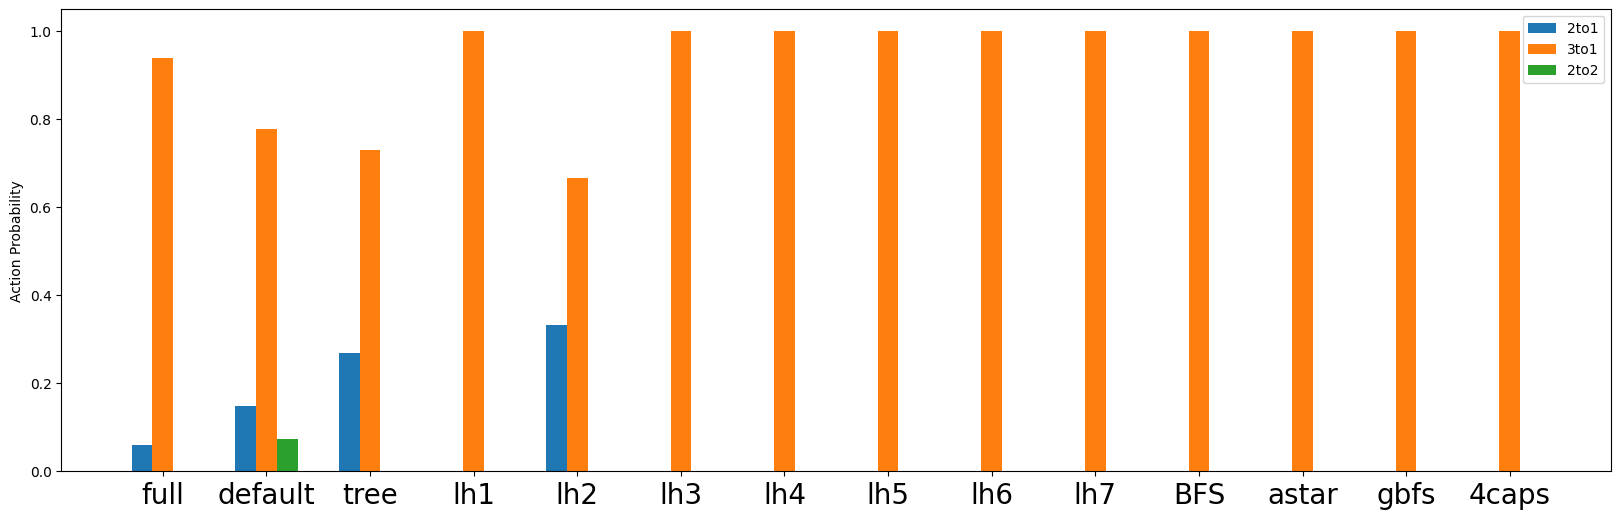

TOL_175
[[3, 0, 0], [2, 0], [1]]
[[0, 0, 0], [3, 2], [1]]


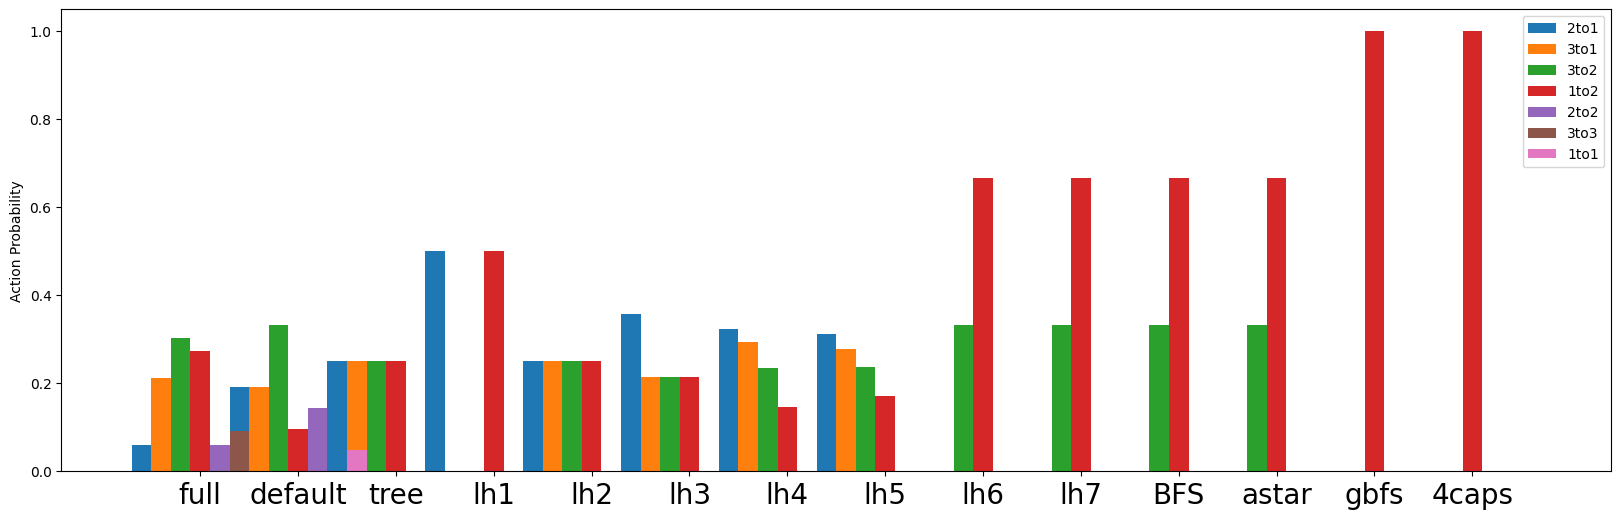

TOL_132
[[2, 3, 0], [0, 0], [1]]
[[3, 0, 0], [2, 0], [1]]


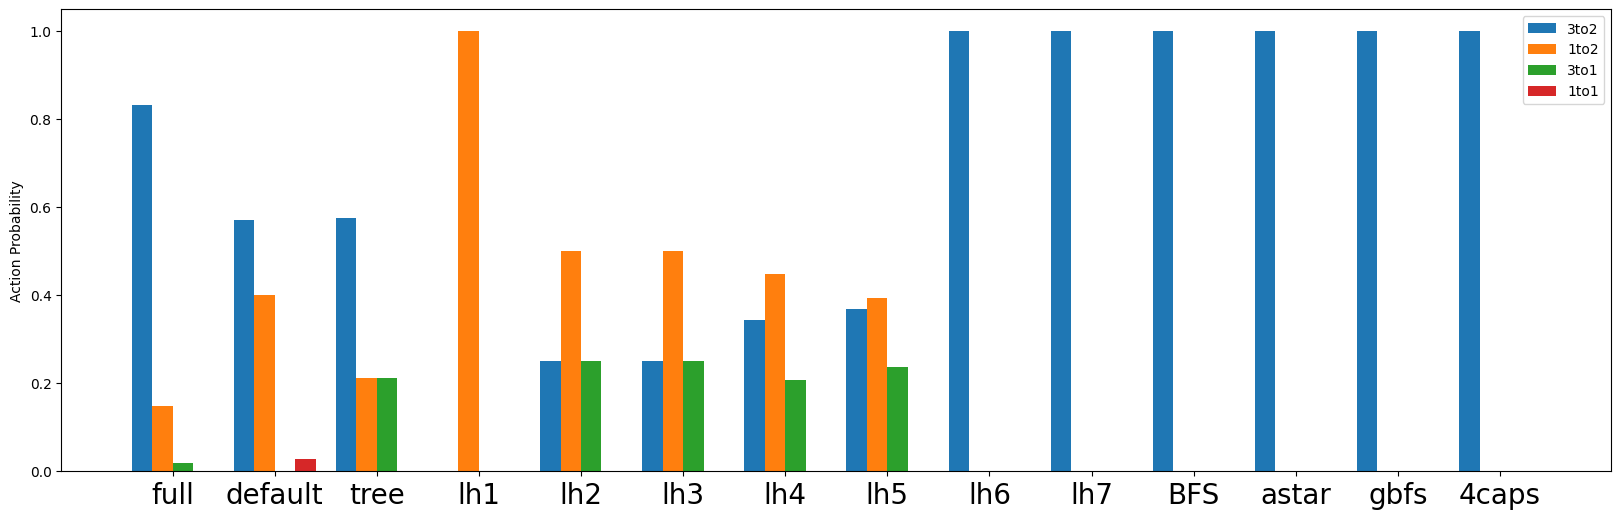

TOL_143
[[2, 3, 0], [0, 0], [1]]
[[0, 0, 0], [2, 1], [3]]


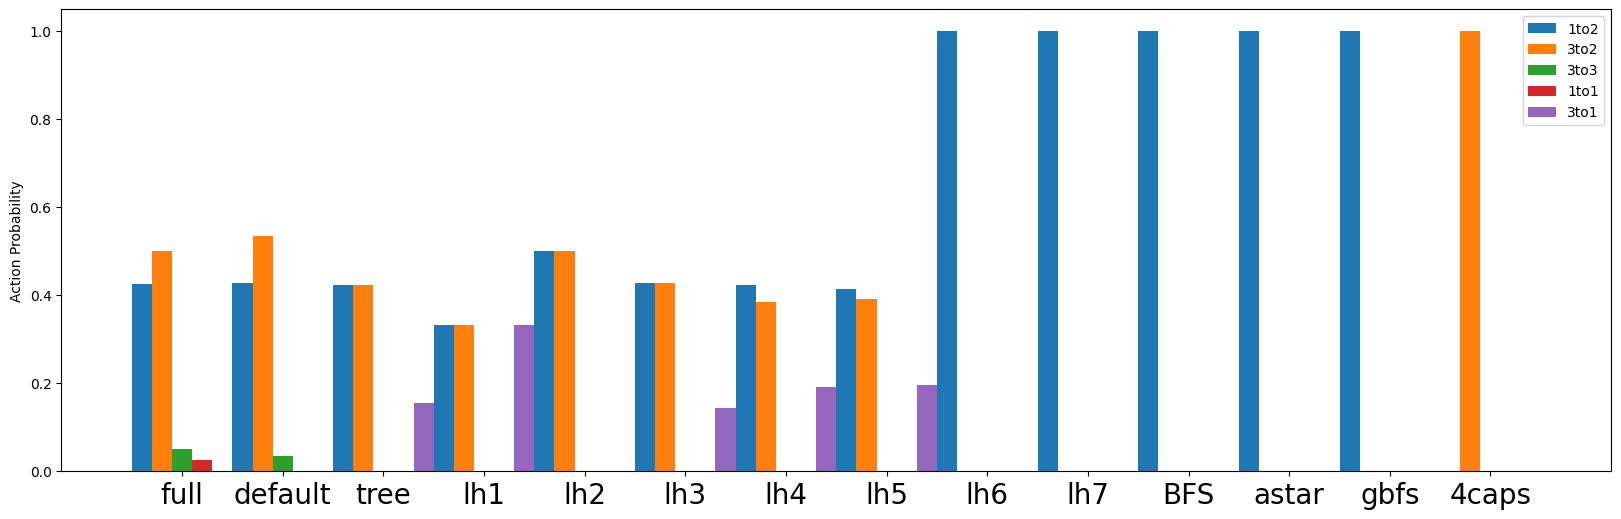

TOL_103
[[3, 0, 0], [1, 2], [0]]
[[0, 0, 0], [3, 2], [1]]


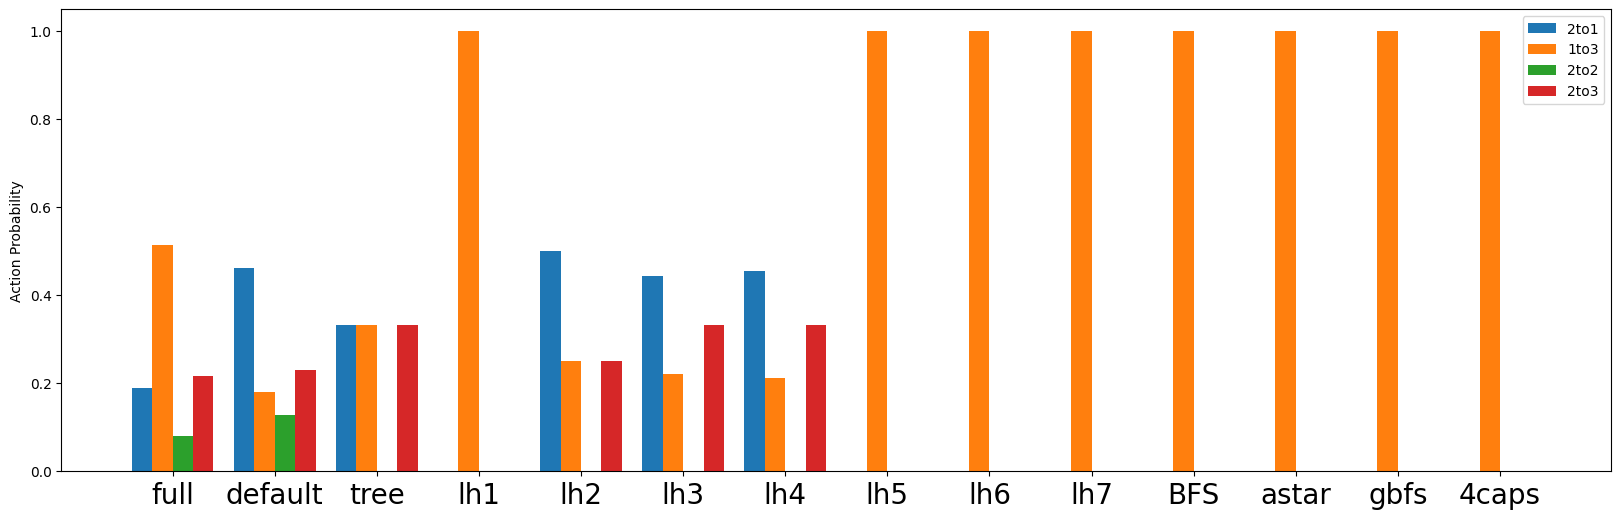

TOL_44
[[2, 3, 0], [1, 0], [0]]
[[1, 3, 0], [2, 0], [0]]


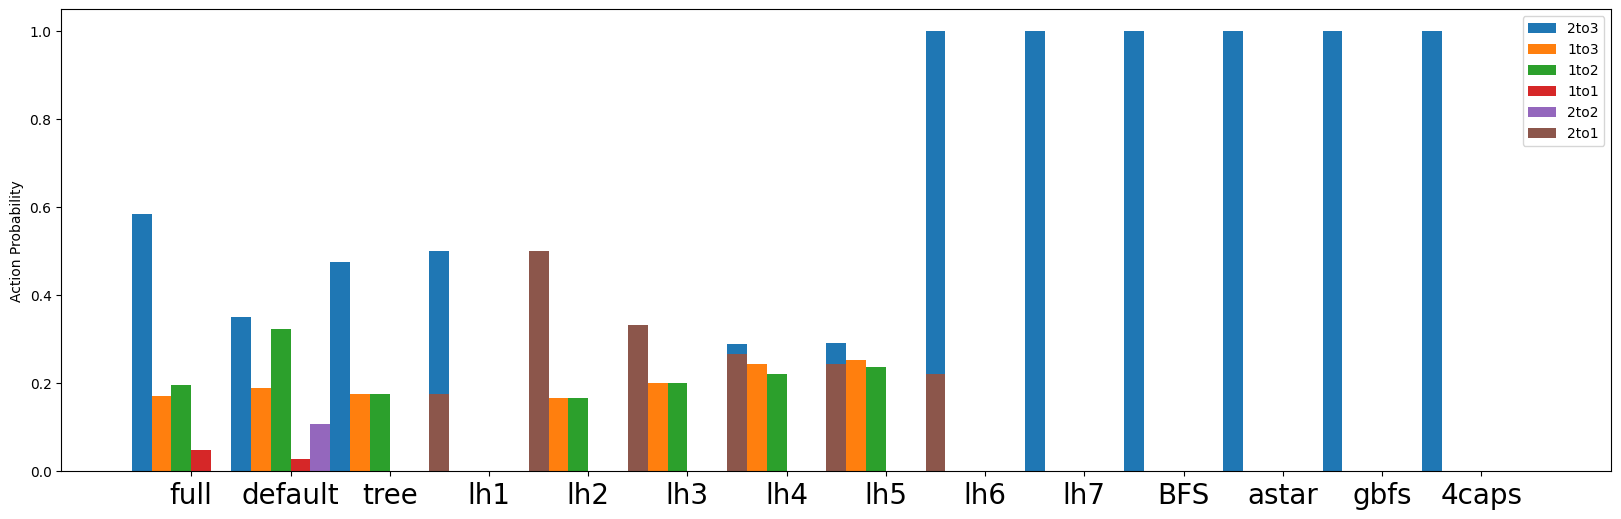

TOL_53
[[2, 3, 0], [1, 0], [0]]
[[1, 0, 0], [3, 2], [0]]


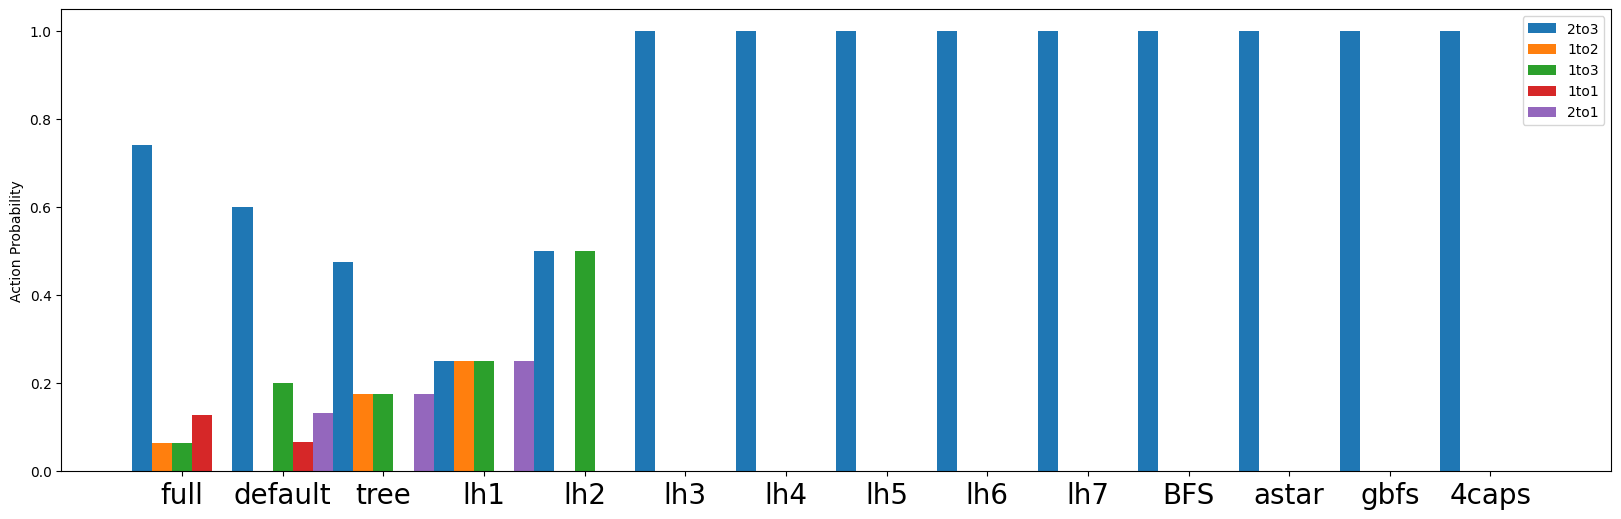

In [8]:
from collections import Counter
filename = "instances_data.json"
with open(filename) as f:
    instances_data = json.load(f)

# performances = {'full':[],'default':[]}

# full_initial_time = []
# full_sol_length = []
# full_total_time = []
# condition = 'full'
opt_action = {}
instance_diff1 = {'full':{},'default':{}} # highest prob
instance_diff2 = {'full':{},'default':{}} # difference between 1st and 2nd probs

instance_diff1_list = {'full':[],'default':[]} # highest prob
instance_diff2_list = {'full':[],'default':[]} # difference between 1st and 2nd probs

human_responses = {'full':{}, 'default':{}}
opt_responses = {}
model_responses = {}
model_fits = {'full':{}, 'default':{}}
dummy_responses = {}
actions_models = {}

for instance in instances_data:
    file_path = "../dataset/TOLdataset/" + instance + "/info.json"
    with open(file_path) as f:
        info_dict = json.load(f)

    print(instance)
    print(info_dict['init_pos'])
    print(info_dict['goal_pos'])
#     print(info_dict)

#     print(instance)
#     i_t = []
#     initial_times = []
#     sol_length = []
#     total_times = []
    actions = {}
    for condition in ['full', 'default']:
        actions[condition] = {}
        for p in instances_data[instance][condition]:
            if not instances_data[instance][condition][p]['outlier']:
                actions[condition][(instances_data[instance][condition][p]['responses'][0][1], instances_data[instance][condition][p]['responses'][1][1])] = actions[condition].get((instances_data[instance][condition][p]['responses'][0][1], instances_data[instance][condition][p]['responses'][1][1]), 0) + 1
    actions_models[instance] = {}
    
    actions['tree'] = list2counter(info_dict['init_pos'], info_dict['action_count(ALH)'])
    actions_models[instance]['tree'] = actions['tree']

    
    
    for i in range(1,8):
        actions['lh' + str(i)] = dic2counter(info_dict['init_pos'], info_dict['action_count(LH' + str(i) + ')'])
        actions_models[instance]['lh' + str(i)] = actions['lh' + str(i)]
    actions['BFS'] = dic2counter(info_dict['init_pos'], info_dict['action_count(BFS)'])
    actions_models[instance]['BFS'] = actions['BFS']
    actions['astar'] = dic2counter(info_dict['init_pos'], info_dict['action_count(ASTAR)'])
    actions_models[instance]['astar'] = actions['astar']
    actions['gbfs'] = dic2counter(info_dict['init_pos'], info_dict['action_count(GBFS)'])
    actions_models[instance]['gbfs'] = actions['gbfs']
    actions['4caps'] = model2counter(info_dict['init_pos'], info_dict['action_count(4caps)'])
    actions_models[instance]['4caps'] = actions['4caps']
    

        
    
    opt_m = 'lh' + str(info_dict['optimal_cost'])
        
    items = []
    for m in actions:
        if actions[m]:
            for key in actions[m]:
                if key not in items:
                    items.append(key)
    
    ind = np.arange(len(actions))
    width = 0.2
    
    fig = plt.subplots(figsize=(20,6))
    count = 0
    items_list = [[] for _ in range(len(items))]
    for m in actions:
        if actions[m]:
            m_list = []
            for item in items:
                if item in actions[m]:
                    m_list.append(actions[m][item])
                    if m == 'BFS':
                        opt_action[instance] = item
                else:
                    m_list.append(0)
            m_list = [n/sum(m_list) for n in m_list]
    
        if m in ['full','default']:
            instance_diff1[m][instance] = 1 - max(m_list)
            instance_diff1_list[m].append(1-max(m_list))
            if len(m_list) > 1:
                instance_diff2[m][instance] = 1 - (max(m_list) - (max([n for n in m_list if n < max(m_list)])))
                instance_diff2_list[m].append(1 - (max(m_list) - (max([n for n in m_list if n < max(m_list)]))))
            else:
                instance_diff2[m][instance] = 0
                instance_diff2_list[m].append(0)
            
            human_responses[m][instance] = m_list
        else:
            if m in model_responses:
                model_responses[m][instance] = m_list
            else:
                model_responses[m] = {instance:m_list}
        
        if m == opt_m:
            opt_responses[instance] = m_list
    
    
        
        for i in range(len(items)):
            items_list[i].append(m_list[i])
#         fig = plt.bar(ind + width*count, m_list, width, label = m)
#         count += 1
    dummy_responses[instance] = [1/len(opt_responses[instance])]*len(opt_responses[instance])
    if 'random' in model_responses:
        model_responses['random'][instance] = dummy_responses[instance]
    else:
        model_responses['random'] = {}
        model_responses['random'][instance] = dummy_responses[instance]
    if actions['4caps'] == None:
        model_responses['4caps'][instance] = dummy_responses[instance]
        actions_models[instance]['4caps'] = actions['gbfs']
    
    for condition in ['full', 'default']:
        for m in model_responses:
            if not m in model_fits[condition]:
                model_fits[condition][m] = []
            model_fits[condition][m].append(cross_entropy_2probs(model_responses[m][instance], human_responses[condition][instance]))
        
    for i, item in enumerate(items):
        fig = plt.bar(ind + width*i, items_list[i], width, label = item[0][-1] + "to" + item[1][-1])

    plt.xticks(ind + (len(items)-1)*width/2, actions.keys(), fontsize=20)
    plt.legend()
    plt.ylabel("Action Probability")
    plt.show()



In [9]:
opt_ratio_all = {}
for condition in ['full', 'default']:
    opt_ratio_all[condition] = {}
#     best_vals = []
    for p in participants_data[condition]:
    #     print(p)
        opt_ratio = {}

        for instance in participants_data[condition][p]:

            tmp = {(instances_data[instance][condition][p]['responses'][0][1], instances_data[instance][condition][p]['responses'][1][1]):1} 
            for m in actions_models[instance]:
                if not m in opt_ratio:
                    opt_ratio[m] = []
                opt_ratio[m].append(dic_dis_2probs(tmp, actions_models[instance][m]))
            
            

        for m in actions_models[instance]:
            if m not in opt_ratio_all[condition]:
                opt_ratio_all[condition][m] = []
            opt_ratio_all[condition][m].append(statistics.mean(opt_ratio[m]))

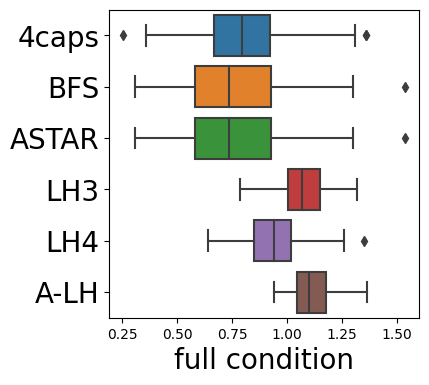

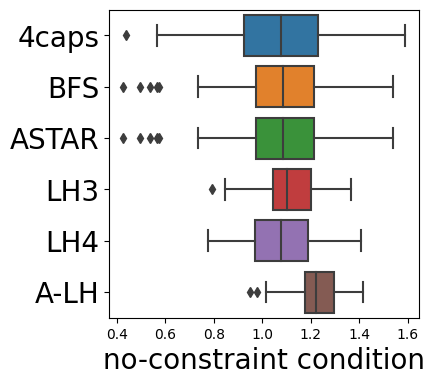

In [10]:
for condition in ['full','default']:
    px = 1/plt.rcParams['figure.dpi']
    figure(figsize=(400*px, 400*px))
    ax = boxplot([opt_ratio_all[condition]['4caps'],opt_ratio_all[condition]['BFS'],opt_ratio_all[condition]['astar'],opt_ratio_all[condition]['lh3'],opt_ratio_all[condition]['lh4'],opt_ratio_all[condition]['tree']],orient ='h')
    ax.set_yticklabels(['4caps','BFS','ASTAR','LH3','LH4','A-LH'], fontsize = 20)
    if condition == 'default':
        condition = 'no-constraint'
    ax.set_xlabel(condition + ' condition', fontsize = 20)

    plt.show()

Ttest_indResult(statistic=10.581965618328992, pvalue=1.0332309205590956e-21)
0.6160370587851504
0.4594017094017094
0.15663534938344098


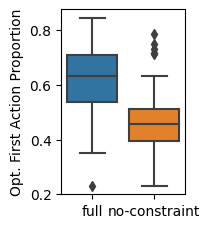

In [11]:
px = 1/plt.rcParams['figure.dpi']
figure(figsize=(160*px, 240*px))

A = [1-i/2 for i in opt_ratio_all['full']['BFS']]
B = [1-i/2 for i in opt_ratio_all['default']['BFS']]
ax = boxplot([A, B])
ax.set_xticklabels(['full','no-constraint'])
ax.set_ylabel('Opt. First Action Proportion')
# print(stats.ttest_ind(average_initial_time['full'], average_initial_time['default']))
# plt.show()

print(stats.ttest_ind(A, B))
print(statistics.mean(A))
print(statistics.mean(B))
print(statistics.mean(A) - statistics.mean(B))

# ax = boxplot([A, B])
# ax.set_xticklabels(['full','no-constraint'])
# ax.set_ylabel('Optimal First Action Ratio')
# # print(stats.ttest_ind(average_initial_time['full'], average_initial_time['default']))
# # plt.show()
# print(statistics.mean(A))
# print(statistics.mean(B))
# print(stats.ttest_rel(A, B))

In [24]:
for instance in instances_data:
    if 1 - max(human_responses['full'][instance]) > 0.63:
        print(instance)
        print(1 - max(human_responses['full'][instance]))

TOL_167
0.6491228070175439
TOL_147
0.6486486486486487
TOL_160
0.6578947368421053
TOL_155
0.6458333333333333
TOL_71
0.6428571428571428
TOL_150
0.6470588235294117
TOL_175
0.696969696969697


/home/student.unimelb.edu.au/chenyuanz/notebook/jupyterenv/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)
/home/student.unimelb.edu.au/chenyuanz/notebook/jupyterenv/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


full
tree
1.0248825350372557

lh1
1.907717077276297

lh2
1.683060199453949

lh3
1.2361034136167721

lh4
1.1774048157570811

lh5
1.3318915934358684

lh6
1.55797813957639

lh7
1.55797813957639

BFS
1.55797813957639

astar
1.55797813957639

gbfs
1.7896427290128176

4caps
1.843726495988001

random
1.4456494474841013



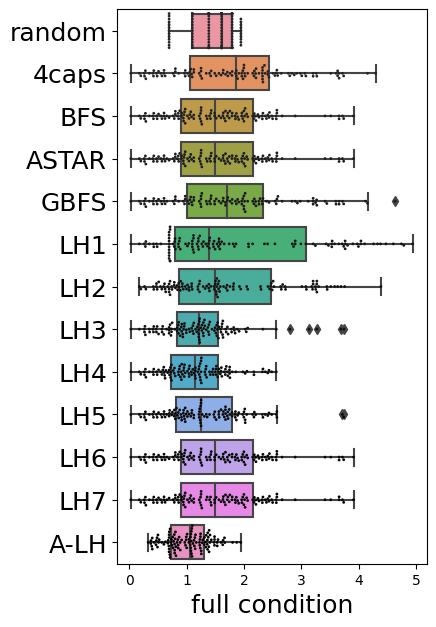

/home/student.unimelb.edu.au/chenyuanz/notebook/jupyterenv/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)
/home/student.unimelb.edu.au/chenyuanz/notebook/jupyterenv/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


default
tree
1.2654572415735712

lh1
1.8948340975222424

lh2
1.6742913209005734

lh3
1.390436203017371

lh4
1.5590360742175702

lh5
1.9174137554978312

lh6
2.275542759957776

lh7
2.275542759957776

BFS
2.275542759957776

astar
2.275542759957776

gbfs
2.4202198878034067

4caps
2.4376253651971482

random
1.4456494474841013



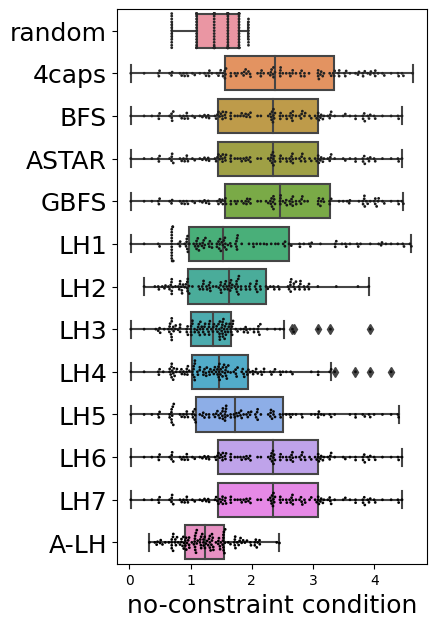

In [12]:
from seaborn import swarmplot
from matplotlib.pyplot import figure



for condition in ['full','default']:
    px = 1/plt.rcParams['figure.dpi']
    figure(figsize=(400*px, 720*px))
    ax = boxplot([model_fits[condition]['random'], model_fits[condition]['4caps'], model_fits[condition]['BFS'], model_fits[condition]['astar'], model_fits[condition]['gbfs'], model_fits[condition]['lh1'], model_fits[condition]['lh2'], model_fits[condition]['lh3'], model_fits[condition]['lh4'], model_fits[condition]['lh5'], model_fits[condition]['lh6'], model_fits[condition]['lh7'], model_fits[condition]['tree']], orient='h')
    swarmplot([model_fits[condition]['random'], model_fits[condition]['4caps'], model_fits[condition]['BFS'], model_fits[condition]['astar'], model_fits[condition]['gbfs'], model_fits[condition]['lh1'], model_fits[condition]['lh2'], model_fits[condition]['lh3'], model_fits[condition]['lh4'], model_fits[condition]['lh5'], model_fits[condition]['lh6'], model_fits[condition]['lh7'], model_fits[condition]['tree']], size=2, color = 'black', orient='h')
    ax.set_yticklabels(['random','4caps', 'BFS', 'ASTAR', 'GBFS', 'LH1','LH2','LH3','LH4','LH5','LH6','LH7', 'A-LH'], fontsize = 18)
    
    print(condition)
    for m in model_fits[condition]:
        print(m)
        print(statistics.mean(model_fits[condition][m]))
        print()
        
    if condition == 'default':
        condition = 'no-constraint'
    ax.set_xlabel(condition + ' condition', fontsize = 18)
    
    
    plt.show()

In [13]:
print(stats.ttest_rel(model_fits['full']['tree'], model_fits['full']['lh4']))
print(stats.ttest_rel(model_fits['default']['tree'], model_fits['default']['lh3']))

Ttest_relResult(statistic=-5.017435417652556, pvalue=1.9066310099135045e-06)
Ttest_relResult(statistic=-3.3205194559763247, pvalue=0.0012015954793698357)


In [15]:
from sklearn.linear_model import LinearRegression

best_model = {'full':{},'default':{}}
model_scores = {'full':{},'default':{}}
# initial planning time
for condition in ['full', 'default']:
    average_initial_time[condition] = []
    best_vals = []
    for p in participants_data[condition]:
    #     print(p)
        initial_time = []
        models = {}
        models['sh'] = []
        models['ms'] = []
        models['bfs'] = []
        models['a*'] = []
        models['tree'] = []
        for i in range(1,8):
            models['lh' + str(i)] = []
        for instance in participants_data[condition][p]:
            
            if not participants_data[condition][p][instance]['outlier']:
                initial_time.append(int(participants_data[condition][p][instance]['responses'][0][0])/1000)
                file_path = "../dataset/TOLdataset/" + instance + "/info.json"
                with open(file_path) as f:
                    info_dict = json.load(f)
                models['sh'].append(3-info_dict['start_hierarchy'])
                models['ms'].append(info_dict['time(4caps)'])
                models['bfs'].append(info_dict['time(BFS)'])
                models['a*'].append(info_dict['time(ASTAR)'])
                models['tree'].append(info_dict['time(ALH)'])
                for i in range(1,8):
                    models['lh' + str(i)].append(info_dict['time(LH' + str(i) + ')'])

        best_m = None
        best_val = 0
        for model in models:
            m = LinearRegression().fit(np.array(models[model]).reshape(-1, 1), np.array(initial_time).reshape(-1, 1))
            val = m.score(np.array(models[model]).reshape(-1, 1), np.array(initial_time).reshape(-1, 1))
            if not model in model_scores[condition]:
                model_scores[condition][model] = []
            model_scores[condition][model].append(val)
            if val > best_val:
                best_val = val
                best_m = model
        best_vals.append(best_val)
        # print(best_val)
        if best_val > 0.1:
            best_model[condition][best_m] = best_model[condition].get(best_m, 0) + 1

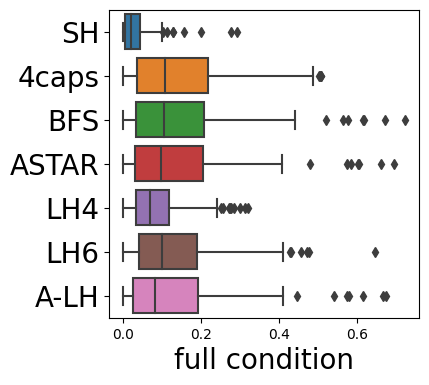

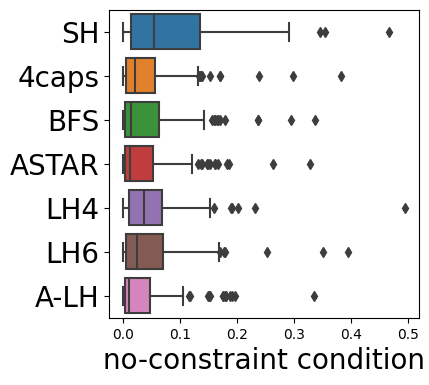

In [21]:
for condition in ['full','default']:
    px = 1/plt.rcParams['figure.dpi']
    figure(figsize=(400*px, 400*px))
    ax = boxplot([model_scores[condition]['sh'], model_scores[condition]['ms'], model_scores[condition]['bfs'], model_scores[condition]['a*'], model_scores[condition]['lh5'], model_scores[condition]['lh6'], model_scores[condition]['tree']],orient ='h')
    ax.set_yticklabels(['SH','4caps','BFS','ASTAR','LH4','LH6','A-LH'], fontsize = 20)
    if condition == 'default':
        condition = 'no-constraint'
    ax.set_xlabel(condition + ' condition', fontsize = 20)

    plt.show()